In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.linalg import svd

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리

## 데이터 불러오기

In [ ]:
baby = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/지역별 출생아 수/출생아수_시도_시_군_구__20240111135829.csv', encoding='cp949')
baby.head(3)

,시군구별,1997,1997.1,1997.2,1998,1998.1,1998.2,1999,1999.1,1999.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,675394,350929,324465,641594,336147,305447,620668,324409,296259,...,147260,272337,139362,132975,260562,133516,127046,249186,127454,121732
2,서울특별시,142724,73520,69204,134604,69822,64782,128120,66452,61668,...,25862,47445,24344,23101,45531,23436,22095,42602,21787,20815


In [ ]:
# 열 이름 변경
baby.columns = ['행정구역', '계(명)_1997', '남자(명)_1997', '여자(명)_1997', '계(명)_1998', '남자(명)_1998', '여자(명)_1998',
                            '계(명)_1999', '남자(명)_1999', '여자(명)_1999', '계(명)_2000', '남자(명)_2000', '여자(명)_2000',
                            '계(명)_2001', '남자(명)_2001', '여자(명)_2001', '계(명)_2002', '남자(명)_2002', '여자(명)_2002',
                            '계(명)_2003', '남자(명)_2003', '여자(명)_2003', '계(명)_2004', '남자(명)_2004', '여자(명)_2004',
                            '계(명)_2005', '남자(명)_2005', '여자(명)_2005', '계(명)_2006', '남자(명)_2006', '여자(명)_2006',
                            '계(명)_2007', '남자(명)_2007', '여자(명)_2007', '계(명)_2008', '남자(명)_2008', '여자(명)_2008',
                            '계(명)_2009', '남자(명)_2009', '여자(명)_2009', '계(명)_2010', '남자(명)_2010', '여자(명)_2010',
                            '계(명)_2011', '남자(명)_2011', '여자(명)_2011', '계(명)_2012', '남자(명)_2012', '여자(명)_2012',
                            '계(명)_2013', '남자(명)_2013', '여자(명)_2013', '계(명)_2014', '남자(명)_2014', '여자(명)_2014',
                            '계(명)_2015', '남자(명)_2015', '여자(명)_2015', '계(명)_2016', '남자(명)_2016', '여자(명)_2016',
                            '계(명)_2017', '남자(명)_2017', '여자(명)_2017', '계(명)_2018', '남자(명)_2018', '여자(명)_2018',
                            '계(명)_2019', '남자(명)_2019', '여자(명)_2019', '계(명)_2020', '남자(명)_2020', '여자(명)_2020',
                            '계(명)_2021', '남자(명)_2021', '여자(명)_2021', '계(명)_2022', '남자(명)_2022', '여자(명)_2022']

re_baby = baby.drop([0], axis = 0)
re_baby.head(3)

,행정구역,계(명)_1997,남자(명)_1997,여자(명)_1997,계(명)_1998,남자(명)_1998,여자(명)_1998,계(명)_1999,남자(명)_1999,여자(명)_1999,...,여자(명)_2019,계(명)_2020,남자(명)_2020,여자(명)_2020,계(명)_2021,남자(명)_2021,여자(명)_2021,계(명)_2022,남자(명)_2022,여자(명)_2022
1,전국,675394,350929,324465,641594,336147,305447,620668,324409,296259,...,147260,272337,139362,132975,260562,133516,127046,249186,127454,121732
2,서울특별시,142724,73520,69204,134604,69822,64782,128120,66452,61668,...,25862,47445,24344,23101,45531,23436,22095,42602,21787,20815
3,부산광역시,46284,24320,21964,43200,22872,20328,41237,21677,19560,...,8314,15058,7770,7288,14446,7436,7010,14134,7258,6876


## 데이터 전처리

### 행(시점)추가 및 열이름 재설정

In [ ]:
# 1997년 데이터만 추출
baby_97 = re_baby[['행정구역'] + [col for col in re_baby.columns if '1997' in col]]
baby_97['시점'] = '1997'
new_columns = {'행정구역': '행정구역', '계(명)_1997': '계(명)', '남자(명)_1997': '남자(명)', '여자(명)_1997': '여자(명)'}

baby_97 = baby_97.rename(columns=new_columns)
baby_97_drop = baby_97.dropna(axis=0)
baby_97_drop.head(3)

<ipython-input-7-033fea295dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_97['시점'] = '1997'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,675394,350929,324465,1997
2,서울특별시,142724,73520,69204,1997
3,부산광역시,46284,24320,21964,1997


In [ ]:
# 1998년 데이터만 추출
baby_98 = re_baby[['행정구역'] + [col for col in re_baby.columns if '1998' in col]]
baby_98['시점'] = '1998'
new_columns = {'행정구역': '행정구역', '계(명)_1998': '계(명)', '남자(명)_1998': '남자(명)', '여자(명)_1998': '여자(명)'}

baby_98 = baby_98.rename(columns=new_columns)
baby_98_drop = baby_98.dropna(axis=0)
baby_98_drop.head(3)

<ipython-input-8-ce9a0ee508bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_98['시점'] = '1998'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,641594,336147,305447,1998
2,서울특별시,134604,69822,64782,1998
3,부산광역시,43200,22872,20328,1998


In [ ]:
# 1999년 데이터만 추출
baby_99 = re_baby[['행정구역'] + [col for col in re_baby.columns if '1999' in col]]
baby_99['시점'] = '1999'
new_columns = {'행정구역': '행정구역', '계(명)_1999': '계(명)', '남자(명)_1999': '남자(명)', '여자(명)_1999': '여자(명)'}

baby_99 = baby_99.rename(columns=new_columns)
baby_99_drop = baby_99.dropna(axis=0)
baby_99_drop.head(3)

<ipython-input-9-ecb5655d2e62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_99['시점'] = '1999'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,620668,324409,296259,1999
2,서울특별시,128120,66452,61668,1999
3,부산광역시,41237,21677,19560,1999


In [ ]:
# 2000년 데이터만 추출
baby_00 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2000' in col]]
baby_00['시점'] = '2000'
new_columns = {'행정구역': '행정구역', '계(명)_2000': '계(명)', '남자(명)_2000': '남자(명)', '여자(명)_2000': '여자(명)'}

baby_00 = baby_00.rename(columns=new_columns)
baby_00_drop = baby_00.dropna(axis=0)
baby_00_drop.head(3)

<ipython-input-10-0198ea657e5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_00['시점'] = '2000'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,640089,335433,304656,2000
2,서울특별시,133154,69406,63748,2000
3,부산광역시,41222,21833,19389,2000


In [ ]:
# 2001년 데이터만 추출
baby_01 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2001' in col]]
baby_01['시점'] = '2001'
new_columns = {'행정구역': '행정구역', '계(명)_2001': '계(명)', '남자(명)_2001': '남자(명)', '여자(명)_2001': '여자(명)'}

baby_01 = baby_01.rename(columns=new_columns)
baby_01_drop = baby_01.dropna(axis=0)
baby_01_drop.head(3)

<ipython-input-11-8bd2e126c45a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_01['시점'] = '2001'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,559934,291989,267945,2001
2,서울특별시,114764,59476,55288,2001
3,부산광역시,35848,18808,17040,2001


In [ ]:
# 2002년 데이터만 추출
baby_02 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2002' in col]]
baby_02['시점'] = '2002'
new_columns = {'행정구역': '행정구역', '계(명)_2002': '계(명)', '남자(명)_2002': '남자(명)', '여자(명)_2002': '여자(명)'}

baby_02 = baby_02.rename(columns=new_columns)
baby_02_drop = baby_02.dropna(axis=0)
baby_02_drop.head(3)

<ipython-input-12-671cd5017d6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_02['시점'] = '2002'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,496911,260228,236683,2002
2,서울특별시,102008,53105,48903,2002
3,부산광역시,30767,15975,14792,2002


In [ ]:
# 2003년 데이터만 추출
baby_03 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2003' in col]]
baby_03['시점'] = '2003'
new_columns = {'행정구역': '행정구역', '계(명)_2003': '계(명)', '남자(명)_2003': '남자(명)', '여자(명)_2003': '여자(명)'}

baby_03 = baby_03.rename(columns=new_columns)
baby_03_drop = baby_03.dropna(axis=0)
baby_03_drop.head(3)

<ipython-input-13-be805786201a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_03['시점'] = '2003'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,495036,257727,237309,2003
2,서울특별시,101227,52191,49036,2003
3,부산광역시,30117,15750,14367,2003


In [ ]:
# 2004년 데이터만 추출
baby_04 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2004' in col]]
baby_04['시점'] = '2004'
new_columns = {'행정구역': '행정구역', '계(명)_2004': '계(명)', '남자(명)_2004': '남자(명)', '여자(명)_2004': '여자(명)'}

baby_04 = baby_04.rename(columns=new_columns)
baby_04_drop = baby_04.dropna(axis=0)
baby_04_drop.head(3)

<ipython-input-14-9eb2ebfd7ca8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_04['시점'] = '2004'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,476958,247835,229123,2004
2,서울특별시,99828,51453,48375,2004
3,부산광역시,28231,14535,13696,2004


In [ ]:
# 2005년 데이터만 추출
baby_05 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2005' in col]]
baby_05['시점'] = '2005'
new_columns = {'행정구역': '행정구역', '계(명)_2005': '계(명)', '남자(명)_2005': '남자(명)', '여자(명)_2005': '여자(명)'}

baby_05 = baby_05.rename(columns=new_columns)
baby_05_drop = baby_05.dropna(axis=0)
baby_05_drop.head(3)

<ipython-input-15-8cf13c9ec0e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_05['시점'] = '2005'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,438707,227592,211115,2005
2,서울특별시,90468,46679,43789,2005
3,부산광역시,25681,13289,12392,2005


In [ ]:
# 2006년 데이터만 추출
baby_06 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2006' in col]]
baby_06['시점'] = '2006'
new_columns = {'행정구역': '행정구역', '계(명)_2006': '계(명)', '남자(명)_2006': '남자(명)', '여자(명)_2006': '여자(명)'}

baby_06 = baby_06.rename(columns=new_columns)
baby_06_drop = baby_06.dropna(axis=0)
baby_06_drop.head(3)

<ipython-input-16-fdf85f0aff4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_06['시점'] = '2006'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,451759,234110,217649,2006
2,서울특별시,93922,48520,45402,2006
3,부산광역시,25881,13323,12558,2006


In [ ]:
# 2007년 데이터만 추출
baby_07 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2007' in col]]
baby_07['시점'] = '2007'
new_columns = {'행정구역': '행정구역', '계(명)_2007': '계(명)', '남자(명)_2007': '남자(명)', '여자(명)_2007': '여자(명)'}

baby_07 = baby_07.rename(columns=new_columns)
baby_07_drop = baby_07.dropna(axis=0)
baby_07_drop.head(3)

<ipython-input-17-edf35b383e14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_07['시점'] = '2007'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,496822,255872,240950,2007
2,서울특별시,101249,52139,49110,2007
3,부산광역시,28426,14643,13783,2007


In [ ]:
# 2008년 데이터만 추출
baby_08 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2008' in col]]
baby_08['시점'] = '2008'
new_columns = {'행정구역': '행정구역', '계(명)_2008': '계(명)', '남자(명)_2008': '남자(명)', '여자(명)_2008': '여자(명)'}

baby_08 = baby_08.rename(columns=new_columns)
baby_08_drop = baby_08.dropna(axis=0)
baby_08_drop.head(3)

<ipython-input-18-f26ea31687ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_08['시점'] = '2008'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,465892,240119,225773,2008
2,서울특별시,94736,48826,45910,2008
3,부산광역시,26670,13606,13064,2008


In [ ]:
# 2009년 데이터만 추출
baby_09 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2009' in col]]
baby_09['시점'] = '2009'
new_columns = {'행정구역': '행정구역', '계(명)_2009': '계(명)', '남자(명)_2009': '남자(명)', '여자(명)_2009': '여자(명)'}

baby_09 = baby_09.rename(columns=new_columns)
baby_09_drop = baby_09.dropna(axis=0)
baby_09_drop.head(3)

<ipython-input-19-c648ba6878e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_09['시점'] = '2009'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,444849,229351,215498,2009
2,서울특별시,89594,45963,43631,2009
3,부산광역시,25110,12952,12158,2009


In [ ]:
# 2010년 데이터만 추출
baby_10 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2010' in col]]
baby_10['시점'] = '2010'
new_columns = {'행정구역': '행정구역', '계(명)_2010': '계(명)', '남자(명)_2010': '남자(명)', '여자(명)_2010': '여자(명)'}

baby_10 = baby_10.rename(columns=new_columns)
baby_10_drop = baby_10.dropna(axis=0)
baby_10_drop.head(3)

<ipython-input-20-11288f6d16ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_10['시점'] = '2010'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,470171,242901,227270,2010
2,서울특별시,93266,48121,45145,2010
3,부산광역시,27415,14156,13259,2010


In [ ]:
# 2011년 데이터만 추출
baby_11 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2011' in col]]
baby_11['시점'] = '2011'
new_columns = {'행정구역': '행정구역', '계(명)_2011': '계(명)', '남자(명)_2011': '남자(명)', '여자(명)_2011': '여자(명)'}

baby_11 = baby_11.rename(columns=new_columns)
baby_11_drop = baby_11.dropna(axis=0)
baby_11_drop.head(3)

<ipython-input-21-f575bd21f0aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_11['시점'] = '2011'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,471265,242121,229144,2011
2,서울특별시,91526,46853,44673,2011
3,부산광역시,27759,14092,13667,2011


In [ ]:
# 2012년 데이터만 추출
baby_12 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2012' in col]]
baby_12['시점'] = '2012'
new_columns = {'행정구역': '행정구역', '계(명)_2012': '계(명)', '남자(명)_2012': '남자(명)', '여자(명)_2012': '여자(명)'}

baby_12 = baby_12.rename(columns=new_columns)
baby_12_drop = baby_12.dropna(axis=0)
baby_12_drop.head(3)

<ipython-input-22-16b098299417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_12['시점'] = '2012'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,484550,248958,235592,2012
2,서울특별시,93914,48353,45561,2012
3,부산광역시,28673,14759,13914,2012


In [ ]:
# 2013년 데이터만 추출
baby_13 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2013' in col]]
baby_13['시점'] = '2013'
new_columns = {'행정구역': '행정구역', '계(명)_2013': '계(명)', '남자(명)_2013': '남자(명)', '여자(명)_2013': '여자(명)'}

baby_13 = baby_13.rename(columns=new_columns)
baby_13_drop = baby_13.dropna(axis=0)
baby_13_drop.head(3)

<ipython-input-23-dfee51ba2cd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_13['시점'] = '2013'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,436455,223883,212572,2013
2,서울특별시,84066,43181,40885,2013
3,부산광역시,25831,13337,12494,2013


In [ ]:
# 2014년 데이터만 추출
baby_14 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2014' in col]]
baby_14['시점'] = '2014'
new_columns = {'행정구역': '행정구역', '계(명)_2014': '계(명)', '남자(명)_2014': '남자(명)', '여자(명)_2014': '여자(명)'}

baby_14 = baby_14.rename(columns=new_columns)
baby_14_drop = baby_14.dropna(axis=0)
baby_14_drop.head(3)

<ipython-input-24-32da3c87a618>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_14['시점'] = '2014'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,435435,223356,212079,2014
2,서울특별시,83711,42899,40812,2014
3,부산광역시,26190,13549,12641,2014


In [ ]:
# 2015년 데이터만 추출
baby_15 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2015' in col]]
baby_15['시점'] = '2015'
new_columns = {'행정구역': '행정구역', '계(명)_2015': '계(명)', '남자(명)_2015': '남자(명)', '여자(명)_2015': '여자(명)'}

baby_15 = baby_15.rename(columns=new_columns)
baby_15_drop = baby_15.dropna(axis=0)
baby_15_drop.head(3)

<ipython-input-25-2ad77fc97eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_15['시점'] = '2015'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,438420,224906,213514,2015
2,서울특별시,83005,42370,40635,2015
3,부산광역시,26645,13752,12893,2015


In [ ]:
# 2016년 데이터만 추출
baby_16 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2016' in col]]
baby_16['시점'] = '2016'
new_columns = {'행정구역': '행정구역', '계(명)_2016': '계(명)', '남자(명)_2016': '남자(명)', '여자(명)_2016': '여자(명)'}

baby_16 = baby_16.rename(columns=new_columns)
baby_16_drop = baby_16.dropna(axis=0)
baby_16_drop.head(3)

<ipython-input-26-ac9e8ee1e9b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_16['시점'] = '2016'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,406243,208064,198179,2016
2,서울특별시,75536,38744,36792,2016
3,부산광역시,24906,12740,12166,2016


In [ ]:
# 2017년 데이터만 추출
baby_17 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2017' in col]]
baby_17['시점'] = '2017'
new_columns = {'행정구역': '행정구역', '계(명)_2017': '계(명)', '남자(명)_2017': '남자(명)', '여자(명)_2017': '여자(명)'}

baby_17 = baby_17.rename(columns=new_columns)
baby_17_drop = baby_17.dropna(axis=0)
baby_17_drop.head(3)

<ipython-input-27-98e22930dbb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_17['시점'] = '2017'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,357771,184308,173463,2017
2,서울특별시,65389,33485,31904,2017
3,부산광역시,21480,11069,10411,2017


In [ ]:
# 2018년 데이터만 추출
baby_18 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2018' in col]]
baby_18['시점'] = '2018'
new_columns = {'행정구역': '행정구역', '계(명)_2018': '계(명)', '남자(명)_2018': '남자(명)', '여자(명)_2018': '여자(명)'}

baby_18 = baby_18.rename(columns=new_columns)
baby_18_drop = baby_18.dropna(axis=0)
baby_18_drop.head(3)

<ipython-input-28-9e050e447f63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_18['시점'] = '2018'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,326822,167686,159136,2018
2,서울특별시,58074,30137,27937,2018
3,부산광역시,19152,9840,9312,2018


In [ ]:
# 2019년 데이터만 추출
baby_19 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2019' in col]]
baby_19['시점'] = '2019'
new_columns = {'행정구역': '행정구역', '계(명)_2019': '계(명)', '남자(명)_2019': '남자(명)', '여자(명)_2019': '여자(명)'}

baby_19 = baby_19.rename(columns=new_columns)
baby_19_drop = baby_19.dropna(axis=0)
baby_19_drop.head(3)

<ipython-input-29-ef061496c2ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_19['시점'] = '2019'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,302676,155416,147260,2019
2,서울특별시,53673,27811,25862,2019
3,부산광역시,17049,8735,8314,2019


In [ ]:
# 2020년 데이터만 추출
baby_20 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2020' in col]]
baby_20['시점'] = '2020'
new_columns = {'행정구역': '행정구역', '계(명)_2020': '계(명)', '남자(명)_2020': '남자(명)', '여자(명)_2020': '여자(명)'}

baby_20 = baby_20.rename(columns=new_columns)
baby_20_drop = baby_20.dropna(axis=0)
baby_20_drop.head(3)

<ipython-input-30-9714bb0497c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_20['시점'] = '2020'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,272337,139362,132975,2020
2,서울특별시,47445,24344,23101,2020
3,부산광역시,15058,7770,7288,2020


In [ ]:
# 2021년 데이터만 추출
baby_21 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2021' in col]]
baby_21['시점'] = '2021'
new_columns = {'행정구역': '행정구역', '계(명)_2021': '계(명)', '남자(명)_2021': '남자(명)', '여자(명)_2021': '여자(명)'}

baby_21 = baby_21.rename(columns=new_columns)
baby_21_drop = baby_21.dropna(axis=0)
baby_21_drop.head(3)

<ipython-input-31-cabe591860db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_21['시점'] = '2021'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,260562,133516,127046,2021
2,서울특별시,45531,23436,22095,2021
3,부산광역시,14446,7436,7010,2021


In [ ]:
# 2022년 데이터만 추출
baby_22 = re_baby[['행정구역'] + [col for col in re_baby.columns if '2022' in col]]
baby_22['시점'] = '2022'
new_columns = {'행정구역': '행정구역', '계(명)_2022': '계(명)', '남자(명)_2022': '남자(명)', '여자(명)_2022': '여자(명)'}

baby_22 = baby_22.rename(columns=new_columns)
baby_22_drop = baby_22.dropna(axis=0)
baby_22_drop.head(3)

<ipython-input-32-1d2cd926f9ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_22['시점'] = '2022'


,행정구역,계(명),남자(명),여자(명),시점
1,전국,249186,127454,121732,2022
2,서울특별시,42602,21787,20815,2022
3,부산광역시,14134,7258,6876,2022


### 데이터 통합 및 결측값 확인

In [ ]:
new_baby = pd.concat([baby_97_drop, baby_98_drop, baby_99_drop, baby_00_drop, baby_01_drop, baby_02_drop, baby_03_drop, baby_04_drop, baby_05_drop, baby_06_drop, baby_07_drop, baby_08_drop, baby_09_drop, baby_10_drop, baby_11_drop, baby_12_drop, baby_13_drop, baby_14_drop, baby_15_drop, baby_16_drop, baby_17_drop, baby_18_drop, baby_19_drop, baby_20_drop, baby_21_drop, baby_22_drop])
new_baby.head(3)

,행정구역,계(명),남자(명),여자(명),시점
1,전국,675394,350929,324465,1997
2,서울특별시,142724,73520,69204,1997
3,부산광역시,46284,24320,21964,1997


In [ ]:
missing = new_baby.isnull()
print(missing.any().any())

False


## 데이터 타입 변경 및 확인

In [ ]:
new_baby_info = new_baby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 1 to 18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    468 non-null    object
 1   계(명)    468 non-null    object
 2   남자(명)   468 non-null    object
 3   여자(명)   468 non-null    object
 4   시점      468 non-null    object
dtypes: object(5)
memory usage: 21.9+ KB


In [ ]:
# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in new_baby.columns if col != '행정구역']

# 쉼표 제거
new_baby[columns_to_process] = new_baby[columns_to_process].replace({',': ''}, regex=True)

# 문자열을 숫자로 변환
new_baby[columns_to_process] = new_baby[columns_to_process].apply(pd.to_numeric, errors = 'coerce')
new_baby.head(3)

,행정구역,계(명),남자(명),여자(명),시점
1,전국,675394.0,350929.0,324465.0,1997
2,서울특별시,142724.0,73520.0,69204.0,1997
3,부산광역시,46284.0,24320.0,21964.0,1997


## 전국/지역 데이터 나누기

In [ ]:
nationwide_baby = new_baby[new_baby['행정구역'] == '전국']
nationwide_baby.head(3)

,행정구역,계(명),남자(명),여자(명),시점
1,전국,675394.0,350929.0,324465.0,1997
1,전국,641594.0,336147.0,305447.0,1998
1,전국,620668.0,324409.0,296259.0,1999


In [ ]:
area_baby = new_baby[new_baby['행정구역'] != '전국']
area_baby.head(3)

,행정구역,계(명),남자(명),여자(명),시점
2,서울특별시,142724.0,73520.0,69204.0,1997
3,부산광역시,46284.0,24320.0,21964.0,1997
4,대구광역시,35219.0,18557.0,16662.0,1997


# 분석

### 1. 현황분석

#### 1) 행정구역별 시점에 따른 출생아 수

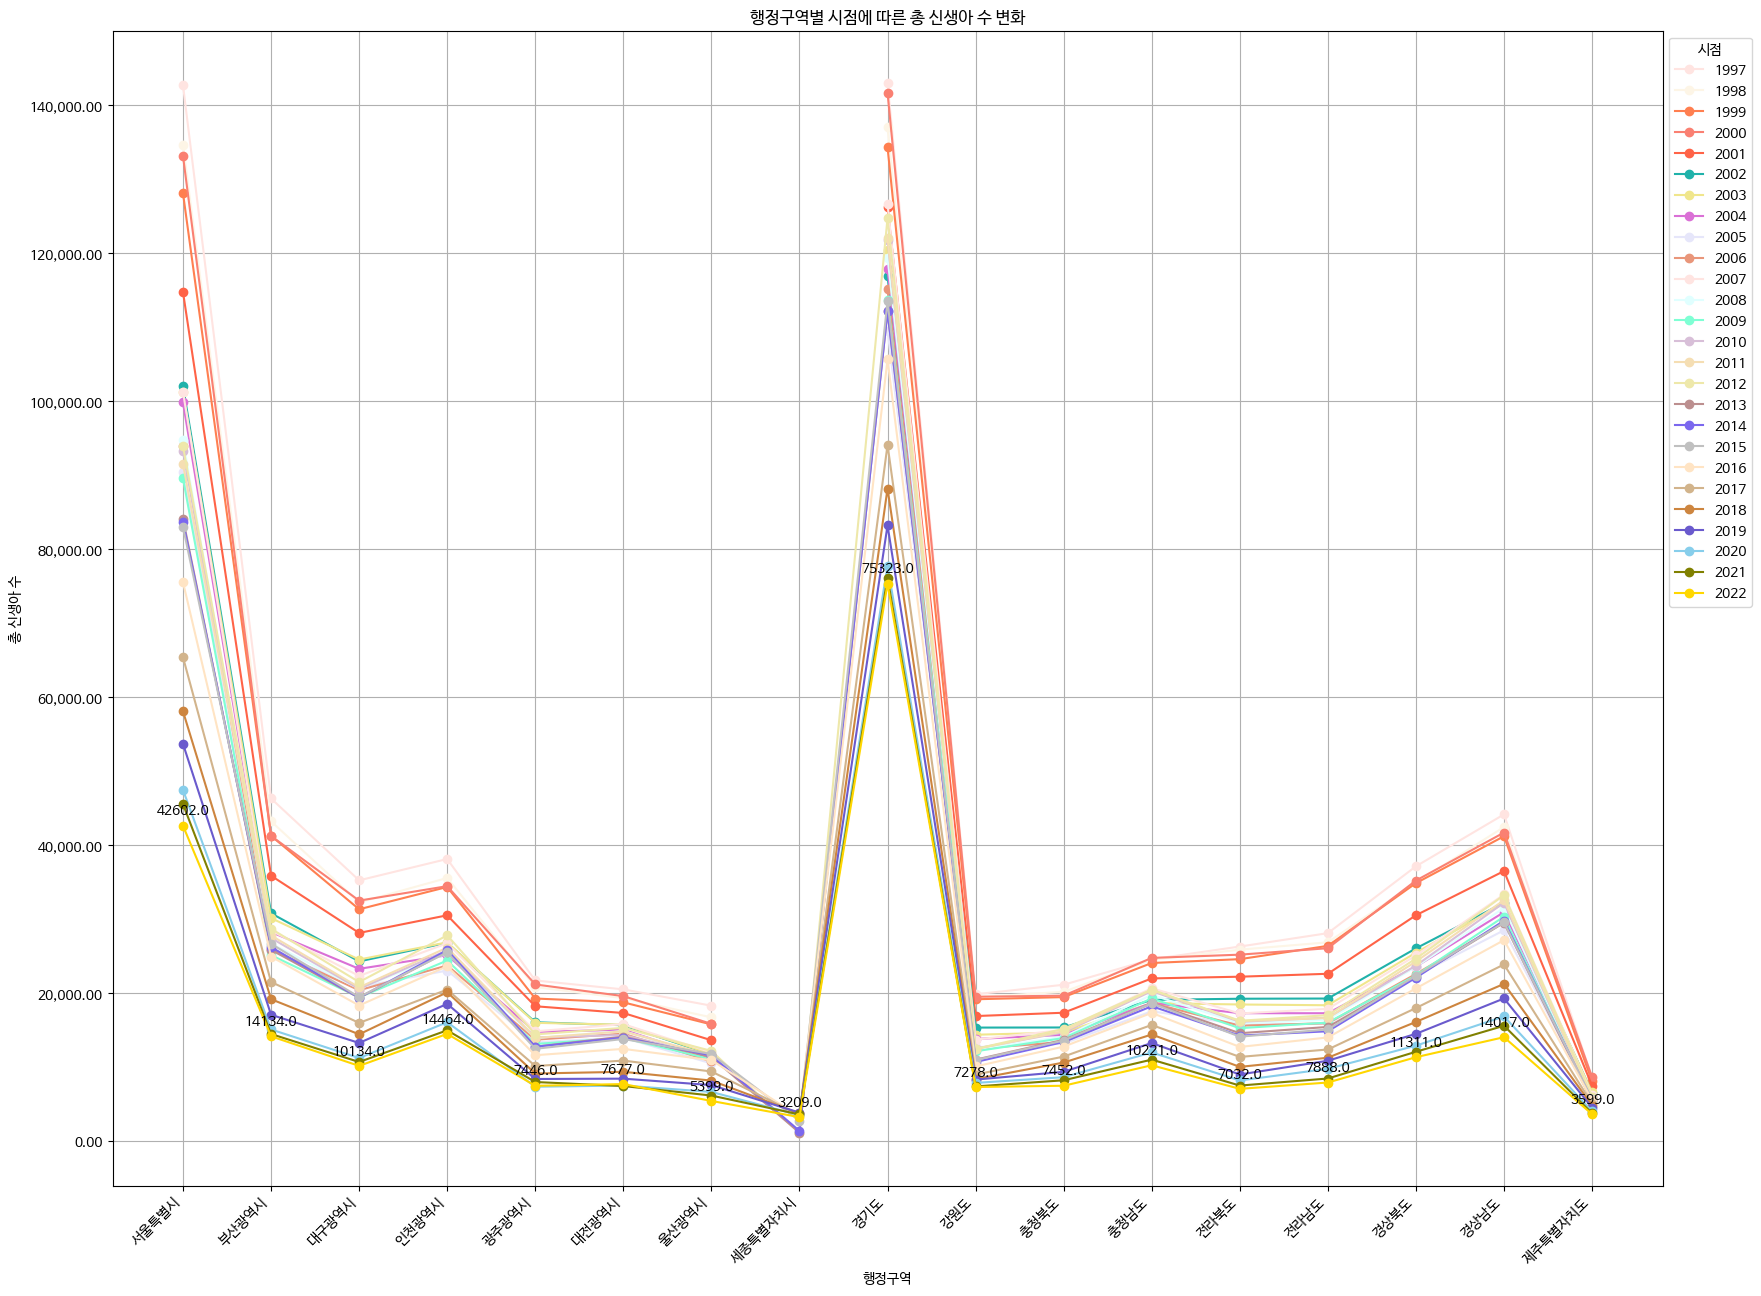

In [ ]:
# 행정구역 및 색상 설정
regions = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
colors = ['mistyrose', 'oldlace', 'coral', 'salmon', 'tomato', 'lightseagreen', 'khaki', 'orchid', 'lavender', 'darksalmon', 'mistyrose', 'lightcyan', 'aquamarine', 'thistle', 'wheat', 'palegoldenrod', 'rosybrown', 'mediumslateblue', 'silver', 'bisque', 'tan', 'peru', 'slateblue', 'skyblue', 'olive', 'gold']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

# 그래프 그리기
plt.figure(figsize=(20, 15))
for i, year in enumerate(area_baby['시점'].unique()):
    year_data = area_baby[area_baby['시점'] == year]
    plt.plot(year_data['행정구역'], year_data['계(명)'].round(2), label=str(year), color=colors[i], marker=markers[i])

    # 2022년도에만 숫자 표기
    if year == 2022:
        for j, txt in enumerate(year_data['계(명)'].round(1)):
            plt.annotate(txt, (year_data['행정구역'].iloc[j], year_data['계(명)'].iloc[j].round(2)),
                         textcoords="offset points", xytext=(0, 8), ha='center')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))

# 그래프 스타일 및 레이블 설정
plt.title('행정구역별 시점에 따른 총 신생아 수 변화')
plt.xlabel('행정구역')
plt.xticks(rotation=45, ha='right')
plt.ylabel('총 신생아 수')
plt.legend(title='시점', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

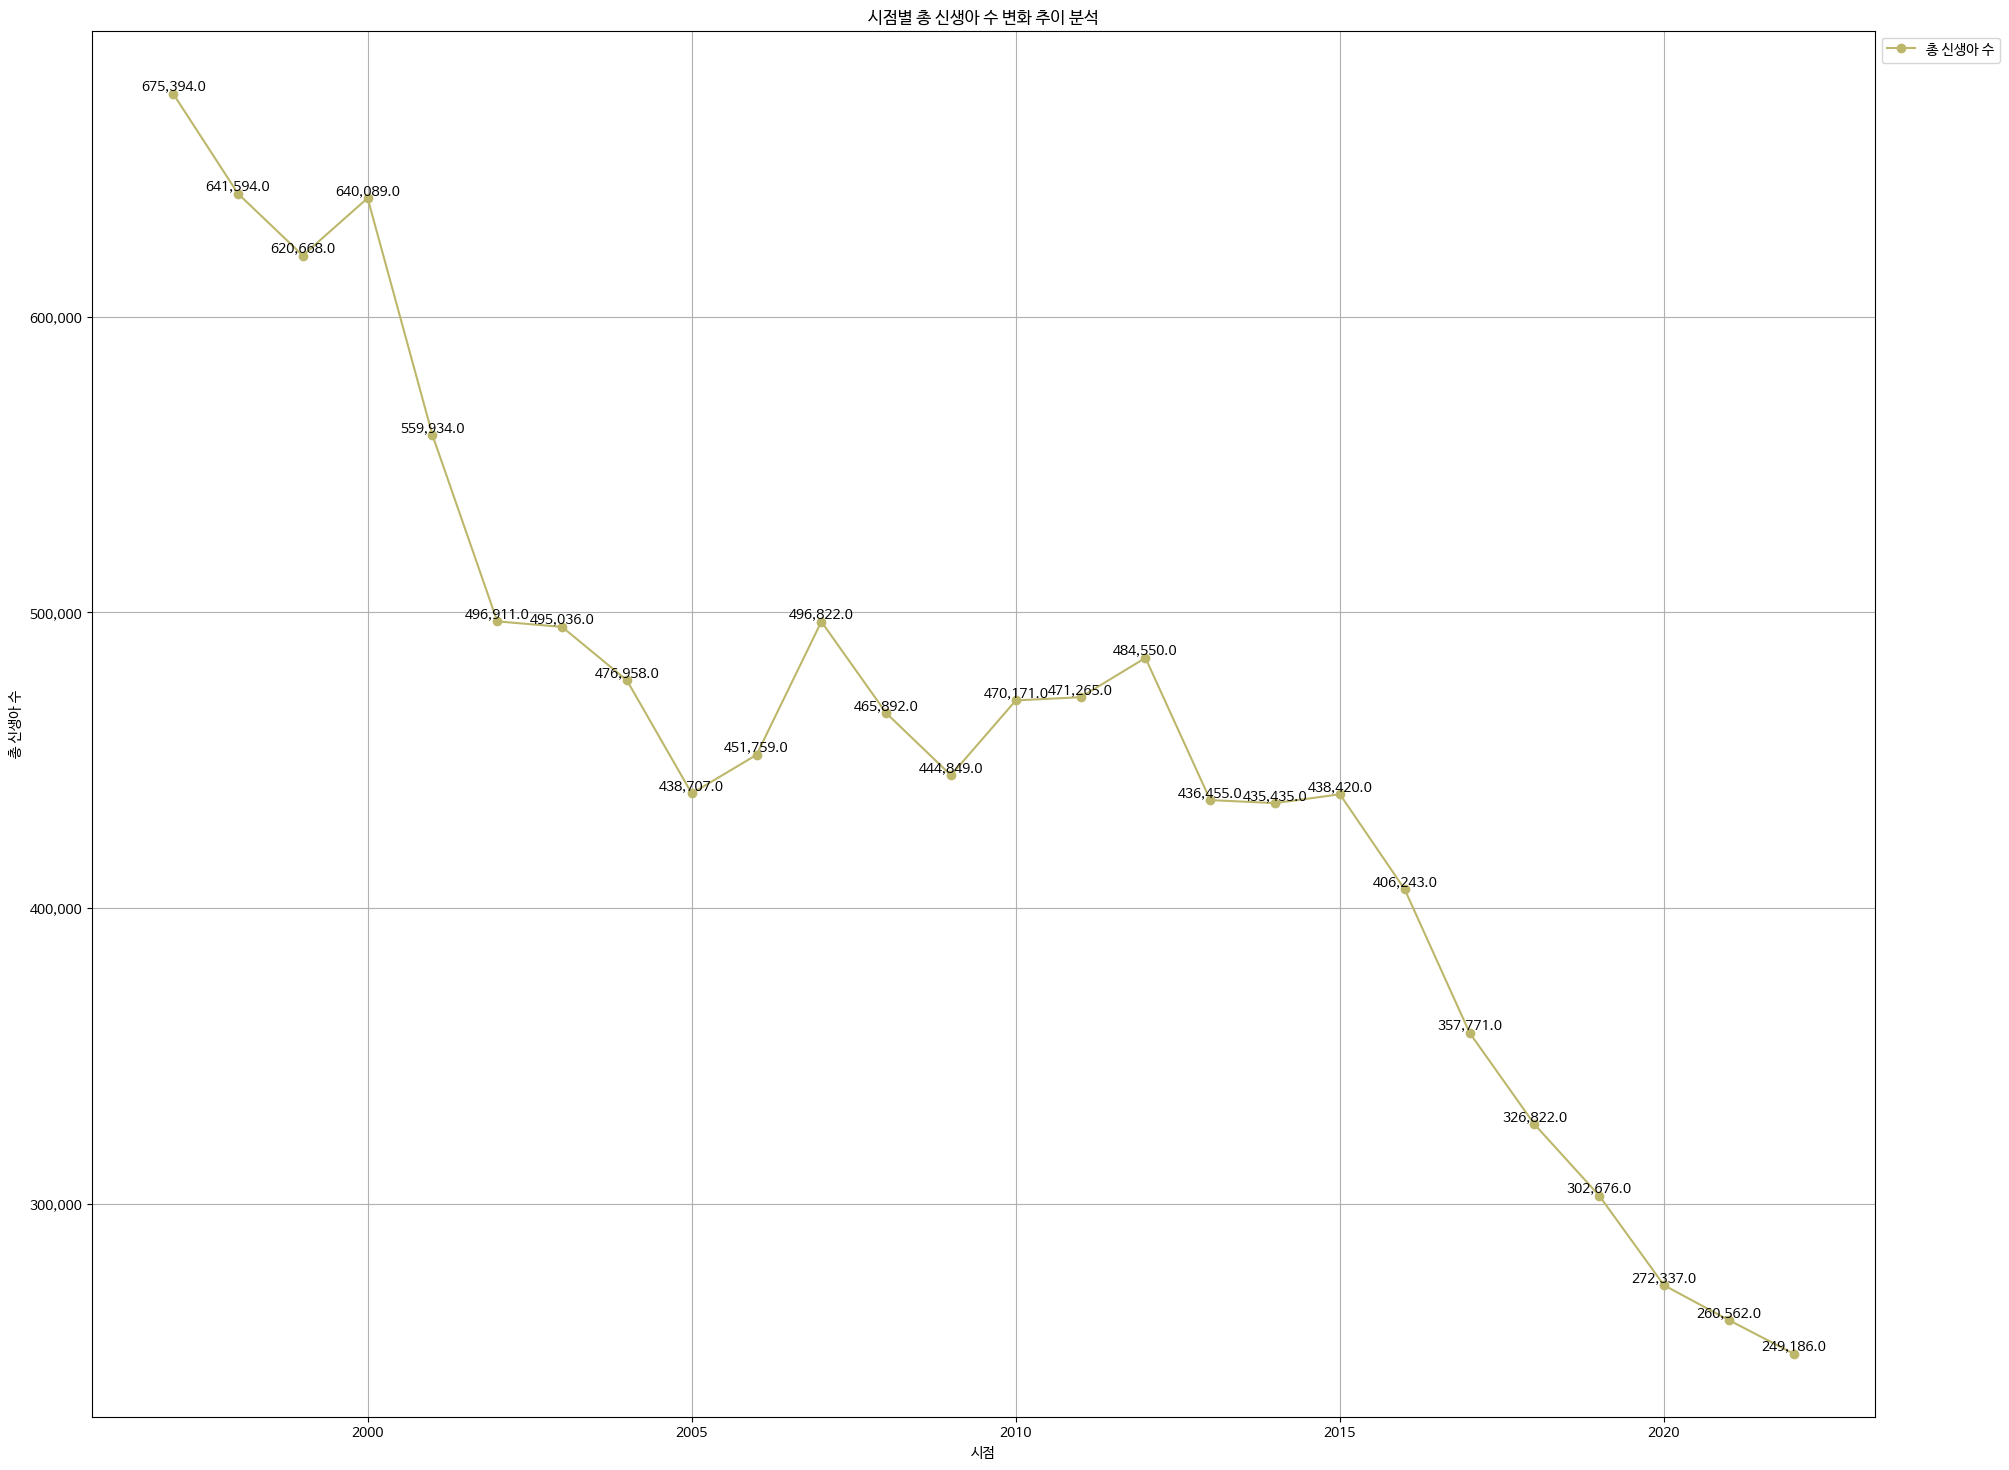

In [ ]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(23, 18))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# 꺾은선 그래프
ax1.plot(nationwide_baby['시점'], nationwide_baby['계(명)'], marker='o', label='총 신생아 수', color='darkkhaki')
ax1.set_xlabel('시점')
ax1.set_ylabel('총 신생아 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, txt in enumerate(nationwide_baby['계(명)']):
    ax1.text(nationwide_baby['시점'].iloc[i], txt, f'{txt:,}', ha='center', va='bottom')

plt.title('시점별 총 신생아 수 변화 추이 분석')
plt.grid(True)
plt.show()

## 2. 정준상관분석

In [ ]:
# 시점이 2015.0부터 2022.0까지인 데이터 추출 -> 평균 출생아수 2015-2022년 추출
nationwide_baby_new = nationwide_baby[(nationwide_baby['시점'] >= 2015.0) & (nationwide_baby['시점'] <= 2022.0)]
nationwide_baby_new = nationwide_baby_new.drop('행정구역', axis=1)
nationwide_baby_new.head(8)

,계(명),남자(명),여자(명),시점
1,438420.0,224906.0,213514.0,2015
1,406243.0,208064.0,198179.0,2016
1,357771.0,184308.0,173463.0,2017
1,326822.0,167686.0,159136.0,2018
1,302676.0,155416.0,147260.0,2019
1,272337.0,139362.0,132975.0,2020
1,260562.0,133516.0,127046.0,2021
1,249186.0,127454.0,121732.0,2022


### 1) 주민등록인구

#### 0) 데이터 전처리 및 추가 데이터

###### 1. 파일 통합(2015-2023)

In [ ]:
# 2015-2023년도 파일 통합
population1501_1712 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/201501_201712_주민등록인구및세대현황_월간.csv', encoding='cp949')
population1801_2012 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/201801_202012_주민등록인구및세대현황_월간.csv', encoding='cp949')
population2101_2311 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/202101_202311_주민등록인구및세대현황_월간.csv', encoding='cp949')
population = pd.concat([population1501_1712, population1801_2012, population2101_2311])
population.head(3)

,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국 (1000000000),"51,342,881","20,740,958",2.48,"25,675,816","25,667,065",1.00,"51,360,454","20,772,167",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 (1100000000),"10,104,515","4,196,435",2.41,"4,979,523","5,124,992",0.97,"10,105,206","4,201,451",2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시 (2600000000),"3,517,898","1,422,500",2.47,"1,739,447","1,778,451",0.98,"3,517,939","1,424,605",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### * 데이터 타입 변경

In [ ]:
# 행정구역 열에서 숫자와 괄호 제거하여 문자데이터만 남기기
population['행정구역'] = population['행정구역'].str.replace(r'[\d\(\)]', '')

# 결과 확인
population.head(3)

<ipython-input-43-314e7ae6d8d4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  population['행정구역'] = population['행정구역'].str.replace(r'[\d\(\)]', '')


,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국,"51,342,881","20,740,958",2.48,"25,675,816","25,667,065",1.00,"51,360,454","20,772,167",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,"10,104,515","4,196,435",2.41,"4,979,523","5,124,992",0.97,"10,105,206","4,201,451",2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시,"3,517,898","1,422,500",2.47,"1,739,447","1,778,451",0.98,"3,517,939","1,424,605",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# "," 데이터 존재
# 이는 object로 인식, 이를 숫자형 데이터로 변경

# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in population.columns if col != '행정구역']

# 쉼표 제거
population[columns_to_process] = population[columns_to_process].replace({',': ''}, regex=True)

# 문자열을 숫자로 변환
population[columns_to_process] = population[columns_to_process].apply(pd.to_numeric)
population.head(3)

,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,51360454.0,20772167.0,2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,10105206.0,4201451.0,2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,3517939.0,1424605.0,2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. 년/월 데이터 생성 및 열 이름 재설정

###### 1) 2015년

In [ ]:
# 2015년 01월 데이터만 추출(201501-122311 동일 처리)
data_1501 = population[['행정구역'] + [col for col in population.columns if '2015년01월' in col]]
data_1501['시점'] = '2015년 01월'
new_columns = {'행정구역': '행정구역', '2015년01월_총인구수': '총 인구수', '2015년01월_세대수': '세대수', '2015년01월_세대당 인구': '세대당 인구', '2015년01월_남자 인구수': '남자 인구수', '2015년01월_여자 인구수': '여자 인구수', '2015년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1501 = data_1501.rename(columns=new_columns)
data_1501_drop = data_1501.dropna(axis=0)
data_1501_drop.head(3)

<ipython-input-45-f0b25cf97e0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1501['시점'] = '2015년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,2015년 01월
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,2015년 01월
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,2015년 01월


In [ ]:
# 2015년 02월 데이터만 추출
data_1502 = population[['행정구역'] + [col for col in population.columns if '2015년02월' in col]]
data_1502['시점'] = '2015년 02월'
new_columns = {'행정구역': '행정구역', '2015년02월_총인구수': '총 인구수', '2015년02월_세대수': '세대수', '2015년02월_세대당 인구': '세대당 인구', '2015년02월_남자 인구수': '남자 인구수', '2015년02월_여자 인구수': '여자 인구수', '2015년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1502 = data_1502.rename(columns=new_columns)
data_1502_drop = data_1502.dropna(axis=0)
data_1502_drop.head(3)

<ipython-input-46-93f9b3f83db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1502['시점'] = '2015년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51360454.0,20772167.0,2.47,25683724.0,25676730.0,1.00,2015년 02월
1,서울특별시,10105206.0,4201451.0,2.41,4979040.0,5126166.0,0.97,2015년 02월
2,부산광역시,3517939.0,1424605.0,2.47,1739181.0,1778758.0,0.98,2015년 02월


In [ ]:
# 2015년 03월 데이터만 추출
data_1503 = population[['행정구역'] + [col for col in population.columns if '2015년03월' in col]]
data_1503['시점'] = '2015년 03월'
new_columns = {'행정구역': '행정구역', '2015년03월_총인구수': '총 인구수', '2015년03월_세대수': '세대수', '2015년03월_세대당 인구': '세대당 인구', '2015년03월_남자 인구수': '남자 인구수', '2015년03월_여자 인구수': '여자 인구수', '2015년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1503 = data_1503.rename(columns=new_columns)
data_1503_drop = data_1503.dropna(axis=0)
data_1503_drop.head(3)

<ipython-input-47-d32290bfdbd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1503['시점'] = '2015년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51378174.0,20801104.0,2.47,25691721.0,25686453.0,1.00,2015년 03월
1,서울특별시,10100987.0,4202812.0,2.40,4976047.0,5124940.0,0.97,2015년 03월
2,부산광역시,3515839.0,1425630.0,2.47,1737884.0,1777955.0,0.98,2015년 03월


In [ ]:
# 2015년 04월 데이터만 추출
data_1504 = population[['행정구역'] + [col for col in population.columns if '2015년04월' in col]]
data_1504['시점'] = '2015년 04월'
new_columns = {'행정구역': '행정구역', '2015년04월_총인구수': '총 인구수', '2015년04월_세대수': '세대수', '2015년04월_세대당 인구': '세대당 인구', '2015년04월_남자 인구수': '남자 인구수', '2015년04월_여자 인구수': '여자 인구수', '2015년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1504 = data_1504.rename(columns=new_columns)
data_1504_drop = data_1504.dropna(axis=0)
data_1504_drop.head(3)

<ipython-input-48-26983decf1a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1504['시점'] = '2015년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51395238.0,20821017.0,2.47,25699428.0,25695810.0,1.00,2015년 04월
1,서울특별시,10094889.0,4200803.0,2.40,4972616.0,5122273.0,0.97,2015년 04월
2,부산광역시,3515439.0,1426601.0,2.46,1737312.0,1778127.0,0.98,2015년 04월


In [ ]:
# 2015년 05월 데이터만 추출
data_1505 = population[['행정구역'] + [col for col in population.columns if '2015년05월' in col]]
data_1505['시점'] = '2015년 05월'
new_columns = {'행정구역': '행정구역', '2015년05월_총인구수': '총 인구수', '2015년05월_세대수': '세대수', '2015년05월_세대당 인구': '세대당 인구', '2015년05월_남자 인구수': '남자 인구수', '2015년05월_여자 인구수': '여자 인구수', '2015년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1505 = data_1505.rename(columns=new_columns)
data_1505_drop = data_1505.dropna(axis=0)
data_1505_drop.head(3)

<ipython-input-49-c39a5f6a350f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1505['시점'] = '2015년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51413925.0,20844274.0,2.47,25707941.0,25705984.0,1.00,2015년 05월
1,서울특별시,10088393.0,4199356.0,2.40,4968609.0,5119784.0,0.97,2015년 05월
2,부산광역시,3515806.0,1428115.0,2.46,1737367.0,1778439.0,0.98,2015년 05월


In [ ]:
# 2015년 06월 데이터만 추출
data_1506 = population[['행정구역'] + [col for col in population.columns if '2015년06월' in col]]
data_1506['시점'] = '2015년 06월'
new_columns = {'행정구역': '행정구역', '2015년06월_총인구수': '총 인구수', '2015년06월_세대수': '세대수', '2015년06월_세대당 인구': '세대당 인구', '2015년06월_남자 인구수': '남자 인구수', '2015년06월_여자 인구수': '여자 인구수', '2015년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1506 = data_1506.rename(columns=new_columns)
data_1506_drop = data_1506.dropna(axis=0)
data_1506_drop.head(3)

<ipython-input-50-bec2d8d72bd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1506['시점'] = '2015년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51431100.0,20870280.0,2.46,25715304.0,25715796.0,1.00,2015년 06월
1,서울특별시,10078850.0,4197478.0,2.40,4962774.0,5116076.0,0.97,2015년 06월
2,부산광역시,3517491.0,1430441.0,2.46,1737975.0,1779516.0,0.98,2015년 06월


In [ ]:
# 2015년 07월 데이터만 추출
data_1507 = population[['행정구역'] + [col for col in population.columns if '2015년07월' in col]]
data_1507['시점'] = '2015년 07월'
new_columns = {'행정구역': '행정구역', '2015년07월_총인구수': '총 인구수', '2015년07월_세대수': '세대수', '2015년07월_세대당 인구': '세대당 인구', '2015년07월_남자 인구수': '남자 인구수', '2015년07월_여자 인구수': '여자 인구수', '2015년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1507 = data_1507.rename(columns=new_columns)
data_1507_drop = data_1507.dropna(axis=0)
data_1507_drop.head(3)

<ipython-input-51-f759d6c48ce8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1507['시점'] = '2015년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51448183.0,20892349.0,2.46,25722769.0,25725414.0,1.00,2015년 07월
1,서울특별시,10071654.0,4196515.0,2.40,4958550.0,5113104.0,0.97,2015년 07월
2,부산광역시,3518955.0,1432723.0,2.46,1738689.0,1780266.0,0.98,2015년 07월


In [ ]:
# 2015년 08월 데이터만 추출
data_1508 = population[['행정구역'] + [col for col in population.columns if '2015년08월' in col]]
data_1508['시점'] = '2015년 08월'
new_columns = {'행정구역': '행정구역', '2015년08월_총인구수': '총 인구수', '2015년08월_세대수': '세대수', '2015년08월_세대당 인구': '세대당 인구', '2015년08월_남자 인구수': '남자 인구수', '2015년08월_여자 인구수': '여자 인구수', '2015년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1508 = data_1508.rename(columns=new_columns)
data_1508_drop = data_1508.dropna(axis=0)
data_1508_drop.head(3)

<ipython-input-52-a65f7938dd11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1508['시점'] = '2015년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51465228.0,20916461.0,2.46,25730212.0,25735016.0,1.00,2015년 08월
1,서울특별시,10063197.0,4196071.0,2.40,4953797.0,5109400.0,0.97,2015년 08월
2,부산광역시,3517907.0,1434025.0,2.45,1738010.0,1779897.0,0.98,2015년 08월


In [ ]:
# 2015년 09월 데이터만 추출
data_1509 = population[['행정구역'] + [col for col in population.columns if '2015년09월' in col]]
data_1509['시점'] = '2015년 09월'
new_columns = {'행정구역': '행정구역', '2015년09월_총인구수': '총 인구수', '2015년09월_세대수': '세대수', '2015년09월_세대당 인구': '세대당 인구', '2015년09월_남자 인구수': '남자 인구수', '2015년09월_여자 인구수': '여자 인구수', '2015년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1509 = data_1509.rename(columns=new_columns)
data_1509_drop = data_1509.dropna(axis=0)
data_1509_drop.head(3)

<ipython-input-53-056ddf7cbe72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1509['시점'] = '2015년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51482816.0,20940559.0,2.46,25738014.0,25744802.0,1.00,2015년 09월
1,서울특별시,10055027.0,4195438.0,2.40,4949180.0,5105847.0,0.97,2015년 09월
2,부산광역시,3516704.0,1434668.0,2.45,1737350.0,1779354.0,0.98,2015년 09월


In [ ]:
# 2015년 10월 데이터만 추출
data_1510 = population[['행정구역'] + [col for col in population.columns if '2015년10월' in col]]
data_1510['시점'] = '2015년 10월'
new_columns = {'행정구역': '행정구역', '2015년10월_총인구수': '총 인구수', '2015년10월_세대수': '세대수', '2015년10월_세대당 인구': '세대당 인구', '2015년10월_남자 인구수': '남자 인구수', '2015년10월_여자 인구수': '여자 인구수', '2015년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1510 = data_1510.rename(columns=new_columns)
data_1510_drop = data_1510.dropna(axis=0)
data_1510_drop.head(3)

<ipython-input-54-dbd53bc7944d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1510['시점'] = '2015년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51500986.0,20967469.0,2.46,25746132.0,25754854.0,1.00,2015년 10월
1,서울특별시,10045027.0,4194103.0,2.40,4943565.0,5101462.0,0.97,2015년 10월
2,부산광역시,3515689.0,1435812.0,2.45,1736778.0,1778911.0,0.98,2015년 10월


In [ ]:
# 2015년 11월 데이터만 추출
data_1511 = population[['행정구역'] + [col for col in population.columns if '2015년11월' in col]]
data_1511['시점'] = '2015년 11월'
new_columns = {'행정구역': '행정구역', '2015년11월_총인구수': '총 인구수', '2015년11월_세대수': '세대수', '2015년11월_세대당 인구': '세대당 인구', '2015년11월_남자 인구수': '남자 인구수', '2015년11월_여자 인구수': '여자 인구수', '2015년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1511 = data_1511.rename(columns=new_columns)
data_1511_drop = data_1511.dropna(axis=0)
data_1511_drop.head(3)

<ipython-input-55-e7c5c7693382>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1511['시점'] = '2015년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51515399.0,20988782.0,2.45,25752345.0,25763054.0,1.00,2015년 11월
1,서울특별시,10035597.0,4192412.0,2.39,4938482.0,5097115.0,0.97,2015년 11월
2,부산광역시,3514842.0,1436851.0,2.45,1736279.0,1778563.0,0.98,2015년 11월


In [ ]:
# 2015년 12월 데이터만 추출
data_1512 = population[['행정구역'] + [col for col in population.columns if '2015년12월' in col]]
data_1512['시점'] = '2015년 12월'
new_columns = {'행정구역': '행정구역', '2015년12월_총인구수': '총 인구수', '2015년12월_세대수': '세대수', '2015년12월_세대당 인구': '세대당 인구', '2015년12월_남자 인구수': '남자 인구수', '2015년12월_여자 인구수': '여자 인구수', '2015년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1512 = data_1512.rename(columns=new_columns)
data_1512_drop = data_1512.dropna(axis=0)
data_1512_drop.head(3)

<ipython-input-56-03a84f366915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1512['시점'] = '2015년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51529338.0,21011152.0,2.45,25758186.0,25771152.0,1.00,2015년 12월
1,서울특별시,10022181.0,4189948.0,2.39,4930943.0,5091238.0,0.97,2015년 12월
2,부산광역시,3513777.0,1437818.0,2.44,1735570.0,1778207.0,0.98,2015년 12월


###### 2) 2016년

In [ ]:
# 2016년 01월 데이터만 추출
data_1601 = population[['행정구역'] + [col for col in population.columns if '2016년01월' in col]]
data_1601['시점'] = '2016년 01월'
new_columns = {'행정구역': '행정구역', '2016년01월_총인구수': '총 인구수', '2016년01월_세대수': '세대수', '2016년01월_세대당 인구': '세대당 인구', '2016년01월_남자 인구수': '남자 인구수', '2016년01월_여자 인구수': '여자 인구수', '2016년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1601 = data_1601.rename(columns=new_columns)
data_1601_drop = data_1601.dropna(axis=0)
data_1601_drop.head(3)

<ipython-input-57-d4f40ec12537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1601['시점'] = '2016년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51541582.0,21026847.0,2.45,25763237.0,25778345.0,1.00,2016년 01월
1,서울특별시,10018537.0,4190415.0,2.39,4927897.0,5090640.0,0.97,2016년 01월
2,부산광역시,3513361.0,1438704.0,2.44,1735280.0,1778081.0,0.98,2016년 01월


In [ ]:
# 2016년 02월 데이터만 추출
data_1602 = population[['행정구역'] + [col for col in population.columns if '2016년02월' in col]]
data_1602['시점'] = '2016년 02월'
new_columns = {'행정구역': '행정구역', '2016년02월_총인구수': '총 인구수', '2016년02월_세대수': '세대수', '2016년02월_세대당 인구': '세대당 인구', '2016년02월_남자 인구수': '남자 인구수', '2016년02월_여자 인구수': '여자 인구수', '2016년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1602 = data_1602.rename(columns=new_columns)
data_1602_drop = data_1602.dropna(axis=0)
data_1602_drop.head(3)

<ipython-input-58-752ce14226a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1602['시점'] = '2016년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51555409.0,21057262.0,2.45,25769138.0,25786271.0,1.00,2016년 02월
1,서울특별시,10014261.0,4193517.0,2.39,4924977.0,5089284.0,0.97,2016년 02월
2,부산광역시,3513192.0,1440354.0,2.44,1734825.0,1778367.0,0.98,2016년 02월


In [ ]:
# 2016년 03월 데이터만 추출
data_1603 = population[['행정구역'] + [col for col in population.columns if '2016년03월' in col]]
data_1603['시점'] = '2016년 03월'
new_columns = {'행정구역': '행정구역', '2016년03월_총인구수': '총 인구수', '2016년03월_세대수': '세대수', '2016년03월_세대당 인구': '세대당 인구', '2016년03월_남자 인구수': '남자 인구수', '2016년03월_여자 인구수': '여자 인구수', '2016년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1603 = data_1603.rename(columns=new_columns)
data_1603_drop = data_1603.dropna(axis=0)
data_1603_drop.head(3)

<ipython-input-59-324f93421a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1603['시점'] = '2016년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51569536.0,21084550.0,2.45,25775322.0,25794214.0,1.00,2016년 03월
1,서울특별시,10009588.0,4194485.0,2.39,4922103.0,5087485.0,0.97,2016년 03월
2,부산광역시,3512444.0,1442013.0,2.44,1734251.0,1778193.0,0.98,2016년 03월


In [ ]:
# 2016년 04월 데이터만 추출
data_1604 = population[['행정구역'] + [col for col in population.columns if '2016년04월' in col]]
data_1604['시점'] = '2016년 04월'
new_columns = {'행정구역': '행정구역', '2016년04월_총인구수': '총 인구수', '2016년04월_세대수': '세대수', '2016년04월_세대당 인구': '세대당 인구', '2016년04월_남자 인구수': '남자 인구수', '2016년04월_여자 인구수': '여자 인구수', '2016년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1604 = data_1604.rename(columns=new_columns)
data_1604_drop = data_1604.dropna(axis=0)
data_1604_drop.head(3)

<ipython-input-60-2ab5fe0fbcb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1604['시점'] = '2016년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51584349.0,21104857.0,2.44,25781628.0,25802721.0,1.00,2016년 04월
1,서울특별시,10002979.0,4193887.0,2.39,4918312.0,5084667.0,0.97,2016년 04월
2,부산광역시,3511974.0,1443215.0,2.43,1733680.0,1778294.0,0.97,2016년 04월


In [ ]:
# 2016년 05월 데이터만 추출
data_1605 = population[['행정구역'] + [col for col in population.columns if '2016년05월' in col]]
data_1605['시점'] = '2016년 05월'
new_columns = {'행정구역': '행정구역', '2016년05월_총인구수': '총 인구수', '2016년05월_세대수': '세대수', '2016년05월_세대당 인구': '세대당 인구', '2016년05월_남자 인구수': '남자 인구수', '2016년05월_여자 인구수': '여자 인구수', '2016년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1605 = data_1605.rename(columns=new_columns)
data_1605_drop = data_1605.dropna(axis=0)
data_1605_drop.head(3)

<ipython-input-61-f2975e00f97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1605['시점'] = '2016년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51601265.0,21130317.0,2.44,25788953.0,25812312.0,1.00,2016년 05월
1,서울특별시,9995784.0,4193473.0,2.38,4914078.0,5081706.0,0.97,2016년 05월
2,부산광역시,3510833.0,1444666.0,2.43,1733069.0,1777764.0,0.97,2016년 05월


In [ ]:
# 2016년 06월 데이터만 추출
data_1606 = population[['행정구역'] + [col for col in population.columns if '2016년06월' in col]]
data_1606['시점'] = '2016년 06월'
new_columns = {'행정구역': '행정구역', '2016년06월_총인구수': '총 인구수', '2016년06월_세대수': '세대수', '2016년06월_세대당 인구': '세대당 인구', '2016년06월_남자 인구수': '남자 인구수', '2016년06월_여자 인구수': '여자 인구수', '2016년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1606 = data_1606.rename(columns=new_columns)
data_1606_drop = data_1606.dropna(axis=0)
data_1606_drop.head(3)

<ipython-input-62-da8410ad7a23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1606['시점'] = '2016년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51619330.0,21153853.0,2.44,25796204.0,25823126.0,1.00,2016년 06월
1,서울특별시,9989795.0,4193712.0,2.38,4910202.0,5079593.0,0.97,2016년 06월
2,부산광역시,3509462.0,1445614.0,2.43,1732157.0,1777305.0,0.97,2016년 06월


In [ ]:
# 2016년 07월 데이터만 추출
data_1607 = population[['행정구역'] + [col for col in population.columns if '2016년07월' in col]]
data_1607['시점'] = '2016년 07월'
new_columns = {'행정구역': '행정구역', '2016년07월_총인구수': '총 인구수', '2016년07월_세대수': '세대수', '2016년07월_세대당 인구': '세대당 인구', '2016년07월_남자 인구수': '남자 인구수', '2016년07월_여자 인구수': '여자 인구수', '2016년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1607 = data_1607.rename(columns=new_columns)
data_1607_drop = data_1607.dropna(axis=0)
data_1607_drop.head(3)

<ipython-input-63-5a9ff643f38e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1607['시점'] = '2016년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51634618.0,21173397.0,2.44,25802692.0,25831926.0,1.00,2016년 07월
1,서울특별시,9981673.0,4192776.0,2.38,4905463.0,5076210.0,0.97,2016년 07월
2,부산광역시,3508095.0,1446165.0,2.43,1731316.0,1776779.0,0.97,2016년 07월


In [ ]:
# 2016년 08월 데이터만 추출
data_1608 = population[['행정구역'] + [col for col in population.columns if '2016년08월' in col]]
data_1608['시점'] = '2016년 08월'
new_columns = {'행정구역': '행정구역', '2016년08월_총인구수': '총 인구수', '2016년08월_세대수': '세대수', '2016년08월_세대당 인구': '세대당 인구', '2016년08월_남자 인구수': '남자 인구수', '2016년08월_여자 인구수': '여자 인구수', '2016년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1608 = data_1608.rename(columns=new_columns)
data_1608_drop = data_1608.dropna(axis=0)
data_1608_drop.head(3)

<ipython-input-64-56b766a1e179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1608['시점'] = '2016년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51649552.0,21192974.0,2.44,25809031.0,25840521.0,1.00,2016년 08월
1,서울특별시,9971111.0,4191784.0,2.38,4899436.0,5071675.0,0.97,2016년 08월
2,부산광역시,3507205.0,1446943.0,2.42,1730551.0,1776654.0,0.97,2016년 08월


In [ ]:
# 2016년 09월 데이터만 추출
data_1609 = population[['행정구역'] + [col for col in population.columns if '2016년09월' in col]]
data_1609['시점'] = '2016년 09월'
new_columns = {'행정구역': '행정구역', '2016년09월_총인구수': '총 인구수', '2016년09월_세대수': '세대수', '2016년09월_세대당 인구': '세대당 인구', '2016년09월_남자 인구수': '남자 인구수', '2016년09월_여자 인구수': '여자 인구수', '2016년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1609 = data_1609.rename(columns=new_columns)
data_1609_drop = data_1609.dropna(axis=0)
data_1609_drop.head(3)

<ipython-input-65-66daa79e31c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1609['시점'] = '2016년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51664244.0,21214428.0,2.44,25815202.0,25849042.0,1.00,2016년 09월
1,서울특별시,9964291.0,4191411.0,2.38,4895508.0,5068783.0,0.97,2016년 09월
2,부산광역시,3505821.0,1447601.0,2.42,1729643.0,1776178.0,0.97,2016년 09월


In [ ]:
# 2016년 10월 데이터만 추출
data_1610 = population[['행정구역'] + [col for col in population.columns if '2016년10월' in col]]
data_1610['시점'] = '2016년 10월'
new_columns = {'행정구역': '행정구역', '2016년10월_총인구수': '총 인구수', '2016년10월_세대수': '세대수', '2016년10월_세대당 인구': '세대당 인구', '2016년10월_남자 인구수': '남자 인구수', '2016년10월_여자 인구수': '여자 인구수', '2016년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1610 = data_1610.rename(columns=new_columns)
data_1610_drop = data_1610.dropna(axis=0)
data_1610_drop.head(3)

<ipython-input-66-519dd7d65505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1610['시점'] = '2016년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51677054.0,21241538.0,2.43,25820488.0,25856566.0,1.00,2016년 10월
1,서울특별시,9954791.0,4191313.0,2.38,4890007.0,5064784.0,0.97,2016년 10월
2,부산광역시,3503789.0,1448657.0,2.42,1728422.0,1775367.0,0.97,2016년 10월


In [ ]:
# 2016년 11월 데이터만 추출
data_1611 = population[['행정구역'] + [col for col in population.columns if '2016년11월' in col]]
data_1611['시점'] = '2016년 11월'
new_columns = {'행정구역': '행정구역', '2016년11월_총인구수': '총 인구수', '2016년11월_세대수': '세대수', '2016년11월_세대당 인구': '세대당 인구', '2016년11월_남자 인구수': '남자 인구수', '2016년11월_여자 인구수': '여자 인구수', '2016년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1611 = data_1611.rename(columns=new_columns)
data_1611_drop = data_1611.dropna(axis=0)
data_1611_drop.head(3)

<ipython-input-67-75d4c149750f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1611['시점'] = '2016년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51687682.0,21267187.0,2.43,25824429.0,25863253.0,1.00,2016년 11월
1,서울특별시,9943333.0,4190260.0,2.37,4883805.0,5059528.0,0.97,2016년 11월
2,부산광역시,3501671.0,1449892.0,2.42,1727358.0,1774313.0,0.97,2016년 11월


In [ ]:
# 2016년 12월 데이터만 추출
data_1612 = population[['행정구역'] + [col for col in population.columns if '2016년12월' in col]]
data_1612['시점'] = '2016년 12월'
new_columns = {'행정구역': '행정구역', '2016년12월_총인구수': '총 인구수', '2016년12월_세대수': '세대수', '2016년12월_세대당 인구': '세대당 인구', '2016년12월_남자 인구수': '남자 인구수', '2016년12월_여자 인구수': '여자 인구수', '2016년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1612 = data_1612.rename(columns=new_columns)
data_1612_drop = data_1612.dropna(axis=0)
data_1612_drop.head(3)

<ipython-input-68-d7aff4d3c12e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1612['시점'] = '2016년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51696216.0,21294009.0,2.43,25827594.0,25868622.0,1.00,2016년 12월
1,서울특별시,9930616.0,4189839.0,2.37,4876789.0,5053827.0,0.96,2016년 12월
2,부산광역시,3498529.0,1451270.0,2.41,1725607.0,1772922.0,0.97,2016년 12월


###### 3) 2017년

In [ ]:
# 2017년 01월 데이터만 추출
data_1701 = population[['행정구역'] + [col for col in population.columns if '2017년01월' in col]]
data_1701['시점'] = '2017년 01월'
new_columns = {'행정구역': '행정구역', '2017년01월_총인구수': '총 인구수', '2017년01월_세대수': '세대수', '2017년01월_세대당 인구': '세대당 인구', '2017년01월_남자 인구수': '남자 인구수', '2017년01월_여자 인구수': '여자 인구수', '2017년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1701 = data_1701.rename(columns=new_columns)
data_1701_drop = data_1701.dropna(axis=0)
data_1701_drop.head(3)

<ipython-input-69-ac6bfc0c6a24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1701['시점'] = '2017년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51704332.0,21312864.0,2.43,25830890.0,25873442.0,1.00,2017년 01월
1,서울특별시,9930478.0,4192985.0,2.37,4875745.0,5054733.0,0.96,2017년 01월
2,부산광역시,3496779.0,1452162.0,2.41,1724481.0,1772298.0,0.97,2017년 01월


In [ ]:
# 2017년 02월 데이터만 추출
data_1702 = population[['행정구역'] + [col for col in population.columns if '2017년02월' in col]]
data_1702['시점'] = '2017년 02월'
new_columns = {'행정구역': '행정구역', '2017년02월_총인구수': '총 인구수', '2017년02월_세대수': '세대수', '2017년02월_세대당 인구': '세대당 인구', '2017년02월_남자 인구수': '남자 인구수', '2017년02월_여자 인구수': '여자 인구수', '2017년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1702 = data_1702.rename(columns=new_columns)
data_1702_drop = data_1702.dropna(axis=0)
data_1702_drop.head(3)

<ipython-input-70-0429e57915ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1702['시점'] = '2017년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51712221.0,21352287.0,2.42,25833963.0,25878258.0,1.00,2017년 02월
1,서울특별시,9931412.0,4200761.0,2.36,4874839.0,5056573.0,0.96,2017년 02월
2,부산광역시,3495478.0,1454891.0,2.40,1723568.0,1771910.0,0.97,2017년 02월


In [ ]:
# 2017년 03월 데이터만 추출
data_1703 = population[['행정구역'] + [col for col in population.columns if '2017년03월' in col]]
data_1703['시점'] = '2017년 03월'
new_columns = {'행정구역': '행정구역', '2017년03월_총인구수': '총 인구수', '2017년03월_세대수': '세대수', '2017년03월_세대당 인구': '세대당 인구', '2017년03월_남자 인구수': '남자 인구수', '2017년03월_여자 인구수': '여자 인구수', '2017년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1703 = data_1703.rename(columns=new_columns)
data_1703_drop = data_1703.dropna(axis=0)
data_1703_drop.head(3)

<ipython-input-71-2028081d7078>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1703['시점'] = '2017년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51714935.0,21381346.0,2.42,25833566.0,25881369.0,1.00,2017년 03월
1,서울특별시,9926968.0,4202888.0,2.36,4871560.0,5055408.0,0.96,2017년 03월
2,부산광역시,3493041.0,1456356.0,2.40,1721829.0,1771212.0,0.97,2017년 03월


In [ ]:
# 2017년 04월 데이터만 추출
data_1704 = population[['행정구역'] + [col for col in population.columns if '2017년04월' in col]]
data_1704['시점'] = '2017년 04월'
new_columns = {'행정구역': '행정구역', '2017년04월_총인구수': '총 인구수', '2017년04월_세대수': '세대수', '2017년04월_세대당 인구': '세대당 인구', '2017년04월_남자 인구수': '남자 인구수', '2017년04월_여자 인구수': '여자 인구수', '2017년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1704 = data_1704.rename(columns=new_columns)
data_1704_drop = data_1704.dropna(axis=0)
data_1704_drop.head(3)

<ipython-input-72-1321c7dc8571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1704['시점'] = '2017년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51722903.0,21402062.0,2.42,25836516.0,25886387.0,1.00,2017년 04월
1,서울특별시,9922745.0,4203957.0,2.36,4868367.0,5054378.0,0.96,2017년 04월
2,부산광역시,3491282.0,1457360.0,2.40,1720874.0,1770408.0,0.97,2017년 04월


In [ ]:
# 2017년 05월 데이터만 추출
data_1705 = population[['행정구역'] + [col for col in population.columns if '2017년05월' in col]]
data_1705['시점'] = '2017년 05월'
new_columns = {'행정구역': '행정구역', '2017년05월_총인구수': '총 인구수', '2017년05월_세대수': '세대수', '2017년05월_세대당 인구': '세대당 인구', '2017년05월_남자 인구수': '남자 인구수', '2017년05월_여자 인구수': '여자 인구수', '2017년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1705 = data_1705.rename(columns=new_columns)
data_1705_drop = data_1705.dropna(axis=0)
data_1705_drop.head(3)

<ipython-input-73-35fb96719641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1705['시점'] = '2017년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51732586.0,21429935.0,2.41,25840361.0,25892225.0,1.00,2017년 05월
1,서울특별시,9919016.0,4207393.0,2.36,4865778.0,5053238.0,0.96,2017년 05월
2,부산광역시,3489212.0,1459062.0,2.39,1719792.0,1769420.0,0.97,2017년 05월


In [ ]:
# 2017년 06월 데이터만 추출
data_1706 = population[['행정구역'] + [col for col in population.columns if '2017년06월' in col]]
data_1706['시점'] = '2017년 06월'
new_columns = {'행정구역': '행정구역', '2017년06월_총인구수': '총 인구수', '2017년06월_세대수': '세대수', '2017년06월_세대당 인구': '세대당 인구', '2017년06월_남자 인구수': '남자 인구수', '2017년06월_여자 인구수': '여자 인구수', '2017년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1706 = data_1706.rename(columns=new_columns)
data_1706_drop = data_1706.dropna(axis=0)
data_1706_drop.head(3)

<ipython-input-74-0b2d6fe02f26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1706['시점'] = '2017년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51736224.0,21455795.0,2.41,25840911.0,25895313.0,1.00,2017년 06월
1,서울특별시,9914381.0,4210933.0,2.35,4862573.0,5051808.0,0.96,2017년 06월
2,부산광역시,3486570.0,1460244.0,2.39,1718263.0,1768307.0,0.97,2017년 06월


In [ ]:
# 2017년 07월 데이터만 추출
data_1707 = population[['행정구역'] + [col for col in population.columns if '2017년07월' in col]]
data_1707['시점'] = '2017년 07월'
new_columns = {'행정구역': '행정구역', '2017년07월_총인구수': '총 인구수', '2017년07월_세대수': '세대수', '2017년07월_세대당 인구': '세대당 인구', '2017년07월_남자 인구수': '남자 인구수', '2017년07월_여자 인구수': '여자 인구수', '2017년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1707 = data_1707.rename(columns=new_columns)
data_1707_drop = data_1707.dropna(axis=0)
data_1707_drop.head(3)

<ipython-input-75-870baf4654d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1707['시점'] = '2017년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51744948.0,21482219.0,2.41,25844117.0,25900831.0,1.00,2017년 07월
1,서울특별시,9908612.0,4213667.0,2.35,4859039.0,5049573.0,0.96,2017년 07월
2,부산광역시,3484836.0,1462269.0,2.38,1717283.0,1767553.0,0.97,2017년 07월


In [ ]:
# 2017년 08월 데이터만 추출
data_1708 = population[['행정구역'] + [col for col in population.columns if '2017년08월' in col]]
data_1708['시점'] = '2017년 08월'
new_columns = {'행정구역': '행정구역', '2017년08월_총인구수': '총 인구수', '2017년08월_세대수': '세대수', '2017년08월_세대당 인구': '세대당 인구', '2017년08월_남자 인구수': '남자 인구수', '2017년08월_여자 인구수': '여자 인구수', '2017년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1708 = data_1708.rename(columns=new_columns)
data_1708_drop = data_1708.dropna(axis=0)
data_1708_drop.head(3)

<ipython-input-76-2cdc5e18fa4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1708['시점'] = '2017년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51753820.0,21514559.0,2.41,25847379.0,25906441.0,1.00,2017년 08월
1,서울특별시,9902072.0,4217954.0,2.35,4855013.0,5047059.0,0.96,2017년 08월
2,부산광역시,3484183.0,1464626.0,2.38,1716630.0,1767553.0,0.97,2017년 08월


In [ ]:
# 2017년 09월 데이터만 추출
data_1709 = population[['행정구역'] + [col for col in population.columns if '2017년09월' in col]]
data_1709['시점'] = '2017년 09월'
new_columns = {'행정구역': '행정구역', '2017년09월_총인구수': '총 인구수', '2017년09월_세대수': '세대수', '2017년09월_세대당 인구': '세대당 인구', '2017년09월_남자 인구수': '남자 인구수', '2017년09월_여자 인구수': '여자 인구수', '2017년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1709 = data_1709.rename(columns=new_columns)
data_1709_drop = data_1709.dropna(axis=0)
data_1709_drop.head(3)

<ipython-input-77-cf6fea67a8a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1709['시점'] = '2017년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51762492.0,21544772.0,2.40,25850675.0,25911817.0,1.00,2017년 09월
1,서울특별시,9891448.0,4219001.0,2.34,4849195.0,5042253.0,0.96,2017년 09월
2,부산광역시,3482804.0,1466181.0,2.38,1715622.0,1767182.0,0.97,2017년 09월


In [ ]:
# 2017년 10월 데이터만 추출
data_1710 = population[['행정구역'] + [col for col in population.columns if '2017년10월' in col]]
data_1710['시점'] = '2017년 10월'
new_columns = {'행정구역': '행정구역', '2017년10월_총인구수': '총 인구수', '2017년10월_세대수': '세대수', '2017년10월_세대당 인구': '세대당 인구', '2017년10월_남자 인구수': '남자 인구수', '2017년10월_여자 인구수': '여자 인구수', '2017년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1710 = data_1710.rename(columns=new_columns)
data_1710_drop = data_1710.dropna(axis=0)
data_1710_drop.head(3)

<ipython-input-78-03a0c8c95f1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1710['시점'] = '2017년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51769092.0,21570895.0,2.40,25852884.0,25916208.0,1.00,2017년 10월
1,서울특별시,9882810.0,4219562.0,2.34,4844555.0,5038255.0,0.96,2017년 10월
2,부산광역시,3478109.0,1466384.0,2.37,1713314.0,1764795.0,0.97,2017년 10월


In [ ]:
# 2017년 11월 데이터만 추출
data_1711 = population[['행정구역'] + [col for col in population.columns if '2017년11월' in col]]
data_1711['시점'] = '2017년 11월'
new_columns = {'행정구역': '행정구역', '2017년11월_총인구수': '총 인구수', '2017년11월_세대수': '세대수', '2017년11월_세대당 인구': '세대당 인구', '2017년11월_남자 인구수': '남자 인구수', '2017년11월_여자 인구수': '여자 인구수', '2017년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1711 = data_1711.rename(columns=new_columns)
data_1711_drop = data_1711.dropna(axis=0)
data_1711_drop.head(3)

<ipython-input-79-ffe6294e595f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1711['시점'] = '2017년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51774649.0,21599577.0,2.40,25854608.0,25920041.0,1.00,2017년 11월
1,서울특별시,9870167.0,4219280.0,2.34,4837345.0,5032822.0,0.96,2017년 11월
2,부산광역시,3474534.0,1466889.0,2.37,1711398.0,1763136.0,0.97,2017년 11월


In [ ]:
# 2017년 12월 데이터만 추출
data_1712 = population[['행정구역'] + [col for col in population.columns if '2017년12월' in col]]
data_1712['시점'] = '2017년 12월'
new_columns = {'행정구역': '행정구역', '2017년12월_총인구수': '총 인구수', '2017년12월_세대수': '세대수', '2017년12월_세대당 인구': '세대당 인구', '2017년12월_남자 인구수': '남자 인구수', '2017년12월_여자 인구수': '여자 인구수', '2017년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1712 = data_1712.rename(columns=new_columns)
data_1712_drop = data_1712.dropna(axis=0)
data_1712_drop.head(3)

<ipython-input-80-2707e8b45308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1712['시점'] = '2017년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51778544.0,21632851.0,2.39,25855919.0,25922625.0,1.00,2017년 12월
1,서울특별시,9857426.0,4220082.0,2.34,4830206.0,5027220.0,0.96,2017년 12월
2,부산광역시,3470653.0,1467555.0,2.36,1709508.0,1761145.0,0.97,2017년 12월


###### 4) 2018년

In [ ]:
# 2018년 01월 데이터만 추출
data_1801 = population[['행정구역'] + [col for col in population.columns if '2018년01월' in col]]
data_1801['시점'] = '2018년 01월'
new_columns = {'행정구역': '행정구역', '2018년01월_총인구수': '총 인구수', '2018년01월_세대수': '세대수', '2018년01월_세대당 인구': '세대당 인구', '2018년01월_남자 인구수': '남자 인구수', '2018년01월_여자 인구수': '여자 인구수', '2018년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1801 = data_1801.rename(columns=new_columns)
data_1801_drop = data_1801.dropna(axis=0)
data_1801_drop.head(3)

<ipython-input-81-f6567a22861c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1801['시점'] = '2018년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51779148.0,21662900.0,2.39,25855611.0,25923537.0,1.00,2018년 01월
1,서울특별시,9851767.0,4224387.0,2.33,4826345.0,5025422.0,0.96,2018년 01월
2,부산광역시,3467055.0,1468069.0,2.36,1707568.0,1759487.0,0.97,2018년 01월


In [ ]:
# 2018년 02월 데이터만 추출
data_1802 = population[['행정구역'] + [col for col in population.columns if '2018년02월' in col]]
data_1802['시점'] = '2018년 02월'
new_columns = {'행정구역': '행정구역', '2018년02월_총인구수': '총 인구수', '2018년02월_세대수': '세대수', '2018년02월_세대당 인구': '세대당 인구', '2018년02월_남자 인구수': '남자 인구수', '2018년02월_여자 인구수': '여자 인구수', '2018년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1802 = data_1802.rename(columns=new_columns)
data_1802_drop = data_1802.dropna(axis=0)
data_1802_drop.head(3)

<ipython-input-82-0414b4cf8a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1802['시점'] = '2018년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51779892.0,21703524.0,2.39,25855513.0,25924379.0,1.00,2018년 02월
1,서울특별시,9845336.0,4231130.0,2.33,4822071.0,5023265.0,0.96,2018년 02월
2,부산광역시,3465407.0,1470058.0,2.36,1706589.0,1758818.0,0.97,2018년 02월


In [ ]:
# 2018년 03월 데이터만 추출
data_1803 = population[['행정구역'] + [col for col in population.columns if '2018년03월' in col]]
data_1803['시점'] = '2018년 03월'
new_columns = {'행정구역': '행정구역', '2018년03월_총인구수': '총 인구수', '2018년03월_세대수': '세대수', '2018년03월_세대당 인구': '세대당 인구', '2018년03월_남자 인구수': '남자 인구수', '2018년03월_여자 인구수': '여자 인구수', '2018년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1803 = data_1803.rename(columns=new_columns)
data_1803_drop = data_1803.dropna(axis=0)
data_1803_drop.head(3)

<ipython-input-83-e6d262436df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1803['시점'] = '2018년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51784669.0,21745437.0,2.38,25856654.0,25928015.0,1.00,2018년 03월
1,서울특별시,9838892.0,4237610.0,2.32,4817507.0,5021385.0,0.96,2018년 03월
2,부산광역시,3463103.0,1471933.0,2.35,1705182.0,1757921.0,0.97,2018년 03월


In [ ]:
# 2018년 04월 데이터만 추출
data_1804 = population[['행정구역'] + [col for col in population.columns if '2018년04월' in col]]
data_1804['시점'] = '2018년 04월'
new_columns = {'행정구역': '행정구역', '2018년04월_총인구수': '총 인구수', '2018년04월_세대수': '세대수', '2018년04월_세대당 인구': '세대당 인구', '2018년04월_남자 인구수': '남자 인구수', '2018년04월_여자 인구수': '여자 인구수', '2018년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1804 = data_1804.rename(columns=new_columns)
data_1804_drop = data_1804.dropna(axis=0)
data_1804_drop.head(3)

<ipython-input-84-dac42413eca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1804['시점'] = '2018년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51790131.0,21777777.0,2.38,25857963.0,25932168.0,1.00,2018년 04월
1,서울특별시,9830452.0,4239848.0,2.32,4812514.0,5017938.0,0.96,2018년 04월
2,부산광역시,3460707.0,1472729.0,2.35,1703724.0,1756983.0,0.97,2018년 04월


In [ ]:
# 2018년 05월 데이터만 추출
data_1805 = population[['행정구역'] + [col for col in population.columns if '2018년05월' in col]]
data_1805['시점'] = '2018년 05월'
new_columns = {'행정구역': '행정구역', '2018년05월_총인구수': '총 인구수', '2018년05월_세대수': '세대수', '2018년05월_세대당 인구': '세대당 인구', '2018년05월_남자 인구수': '남자 인구수', '2018년05월_여자 인구수': '여자 인구수', '2018년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1805 = data_1805.rename(columns=new_columns)
data_1805_drop = data_1805.dropna(axis=0)
data_1805_drop.head(3)

<ipython-input-85-ed1c20aab4ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1805['시점'] = '2018년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51796179.0,21804246.0,2.38,25859449.0,25936730.0,1.00,2018년 05월
1,서울특별시,9820971.0,4240628.0,2.32,4806841.0,5014130.0,0.96,2018년 05월
2,부산광역시,3458134.0,1473233.0,2.35,1702278.0,1755856.0,0.97,2018년 05월


In [ ]:
# 2018년 06월 데이터만 추출
data_1806 = population[['행정구역'] + [col for col in population.columns if '2018년06월' in col]]
data_1806['시점'] = '2018년 06월'
new_columns = {'행정구역': '행정구역', '2018년06월_총인구수': '총 인구수', '2018년06월_세대수': '세대수', '2018년06월_세대당 인구': '세대당 인구', '2018년06월_남자 인구수': '남자 인구수', '2018년06월_여자 인구수': '여자 인구수', '2018년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1806 = data_1806.rename(columns=new_columns)
data_1806_drop = data_1806.dropna(axis=0)
data_1806_drop.head(3)

<ipython-input-86-e609d9688fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1806['시점'] = '2018년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51801449.0,21825601.0,2.37,25861116.0,25940333.0,1.00,2018년 06월
1,서울특별시,9814049.0,4241547.0,2.31,4802769.0,5011280.0,0.96,2018년 06월
2,부산광역시,3455611.0,1473448.0,2.35,1700822.0,1754789.0,0.97,2018년 06월


In [ ]:
# 2018년 07월 데이터만 추출
data_1807 = population[['행정구역'] + [col for col in population.columns if '2018년07월' in col]]
data_1807['시점'] = '2018년 07월'
new_columns = {'행정구역': '행정구역', '2018년07월_총인구수': '총 인구수', '2018년07월_세대수': '세대수', '2018년07월_세대당 인구': '세대당 인구', '2018년07월_남자 인구수': '남자 인구수', '2018년07월_여자 인구수': '여자 인구수', '2018년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1807 = data_1807.rename(columns=new_columns)
data_1807_drop = data_1807.dropna(axis=0)
data_1807_drop.head(3)

<ipython-input-87-fa0deb0b9839>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1807['시점'] = '2018년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51806977.0,21853371.0,2.37,25862378.0,25944599.0,1.00,2018년 07월
1,서울특별시,9806538.0,4243687.0,2.31,4798255.0,5008283.0,0.96,2018년 07월
2,부산광역시,3453198.0,1474088.0,2.34,1699375.0,1753823.0,0.97,2018년 07월


In [ ]:
# 2018년 08월 데이터만 추출
data_1808 = population[['행정구역'] + [col for col in population.columns if '2018년08월' in col]]
data_1808['시점'] = '2018년 08월'
new_columns = {'행정구역': '행정구역', '2018년08월_총인구수': '총 인구수', '2018년08월_세대수': '세대수', '2018년08월_세대당 인구': '세대당 인구', '2018년08월_남자 인구수': '남자 인구수', '2018년08월_여자 인구수': '여자 인구수', '2018년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1808 = data_1808.rename(columns=new_columns)
data_1808_drop = data_1808.dropna(axis=0)
data_1808_drop.head(3)

<ipython-input-88-b9e8a5fe42e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1808['시점'] = '2018년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51812153.0,21895153.0,2.37,25863568.0,25948585.0,1.00,2018년 08월
1,서울특별시,9799075.0,4249335.0,2.31,4793529.0,5005546.0,0.96,2018년 08월
2,부산광역시,3451049.0,1475668.0,2.34,1698145.0,1752904.0,0.97,2018년 08월


In [ ]:
# 2018년 09월 데이터만 추출
data_1809 = population[['행정구역'] + [col for col in population.columns if '2018년09월' in col]]
data_1809['시점'] = '2018년 09월'
new_columns = {'행정구역': '행정구역', '2018년09월_총인구수': '총 인구수', '2018년09월_세대수': '세대수', '2018년09월_세대당 인구': '세대당 인구', '2018년09월_남자 인구수': '남자 인구수', '2018년09월_여자 인구수': '여자 인구수', '2018년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1809 = data_1809.rename(columns=new_columns)
data_1809_drop = data_1809.dropna(axis=0)
data_1809_drop.head(3)

<ipython-input-89-7283b516738d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1809['시점'] = '2018년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51817851.0,21930578.0,2.36,25865557.0,25952294.0,1.00,2018년 09월
1,서울특별시,9793003.0,4254018.0,2.30,4789821.0,5003182.0,0.96,2018년 09월
2,부산광역시,3449593.0,1477190.0,2.34,1697295.0,1752298.0,0.97,2018년 09월


In [ ]:
# 2018년 10월 데이터만 추출
data_1810 = population[['행정구역'] + [col for col in population.columns if '2018년10월' in col]]
data_1810['시점'] = '2018년 10월'
new_columns = {'행정구역': '행정구역', '2018년10월_총인구수': '총 인구수', '2018년10월_세대수': '세대수', '2018년10월_세대당 인구': '세대당 인구', '2018년10월_남자 인구수': '남자 인구수', '2018년10월_여자 인구수': '여자 인구수', '2018년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1810 = data_1810.rename(columns=new_columns)
data_1810_drop = data_1810.dropna(axis=0)
data_1810_drop.head(3)

<ipython-input-90-8e93840fff01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1810['시점'] = '2018년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51821881.0,21972704.0,2.36,25866067.0,25955814.0,1.00,2018년 10월
1,서울특별시,9784112.0,4258518.0,2.30,4784674.0,4999438.0,0.96,2018년 10월
2,부산광역시,3446856.0,1478697.0,2.33,1695639.0,1751217.0,0.97,2018년 10월


In [ ]:
# 2018년 11월 데이터만 추출
data_1811 = population[['행정구역'] + [col for col in population.columns if '2018년11월' in col]]
data_1811['시점'] = '2018년 11월'
new_columns = {'행정구역': '행정구역', '2018년11월_총인구수': '총 인구수', '2018년11월_세대수': '세대수', '2018년11월_세대당 인구': '세대당 인구', '2018년11월_남자 인구수': '남자 인구수', '2018년11월_여자 인구수': '여자 인구수', '2018년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1811 = data_1811.rename(columns=new_columns)
data_1811_drop = data_1811.dropna(axis=0)
data_1811_drop.head(3)

<ipython-input-91-f5e004d9a4a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1811['시점'] = '2018년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51824477.0,22006919.0,2.35,25866371.0,25958106.0,1.00,2018년 11월
1,서울특별시,9774088.0,4260463.0,2.29,4778917.0,4995171.0,0.96,2018년 11월
2,부산광역시,3444540.0,1479534.0,2.33,1694363.0,1750177.0,0.97,2018년 11월


In [ ]:
# 2018년 12월 데이터만 추출
data_1812 = population[['행정구역'] + [col for col in population.columns if '2018년12월' in col]]
data_1812['시점'] = '2018년 12월'
new_columns = {'행정구역': '행정구역', '2018년12월_총인구수': '총 인구수', '2018년12월_세대수': '세대수', '2018년12월_세대당 인구': '세대당 인구', '2018년12월_남자 인구수': '남자 인구수', '2018년12월_여자 인구수': '여자 인구수', '2018년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1812 = data_1812.rename(columns=new_columns)
data_1812_drop = data_1812.dropna(axis=0)
data_1812_drop.head(3)

<ipython-input-92-f3d1dea5aa0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1812['시점'] = '2018년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51826059.0,22042947.0,2.35,25866129.0,25959930.0,1.00,2018년 12월
1,서울특별시,9765623.0,4263868.0,2.29,4773899.0,4991724.0,0.96,2018년 12월
2,부산광역시,3441453.0,1480468.0,2.32,1692421.0,1749032.0,0.97,2018년 12월


###### 5) 2019년

In [ ]:
# 2019년 01월 데이터만 추출
data_1901 = population[['행정구역'] + [col for col in population.columns if '2019년01월' in col]]
data_1901['시점'] = '2019년 01월'
new_columns = {'행정구역': '행정구역', '2019년01월_총인구수': '총 인구수', '2019년01월_세대수': '세대수', '2019년01월_세대당 인구': '세대당 인구', '2019년01월_남자 인구수': '남자 인구수', '2019년01월_여자 인구수': '여자 인구수', '2019년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1901 = data_1901.rename(columns=new_columns)
data_1901_drop = data_1901.dropna(axis=0)
data_1901_drop.head(3)

<ipython-input-93-ce15bced4f6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1901['시점'] = '2019년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51826287.0,22081397.0,2.35,25865518.0,25960769.0,1.00,2019년 01월
1,서울특별시,9766288.0,4271551.0,2.29,4772822.0,4993466.0,0.96,2019년 01월
2,부산광역시,3438259.0,1481315.0,2.32,1690527.0,1747732.0,0.97,2019년 01월


In [ ]:
# 2019년 02월 데이터만 추출
data_1902 = population[['행정구역'] + [col for col in population.columns if '2019년02월' in col]]
data_1902['시점'] = '2019년 02월'
new_columns = {'행정구역': '행정구역', '2019년02월_총인구수': '총 인구수', '2019년02월_세대수': '세대수', '2019년02월_세대당 인구': '세대당 인구', '2019년02월_남자 인구수': '남자 인구수', '2019년02월_여자 인구수': '여자 인구수', '2019년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1902 = data_1902.rename(columns=new_columns)
data_1902_drop = data_1902.dropna(axis=0)
data_1902_drop.head(3)

<ipython-input-94-18ebffd3eae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1902['시점'] = '2019년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51829538.0,22131431.0,2.34,25866255.0,25963283.0,1.00,2019년 02월
1,서울특별시,9770638.0,4283150.0,2.28,4773605.0,4997033.0,0.96,2019년 02월
2,부산광역시,3436230.0,1483699.0,2.32,1689253.0,1746977.0,0.97,2019년 02월


In [ ]:
# 2019년 03월 데이터만 추출
data_1903 = population[['행정구역'] + [col for col in population.columns if '2019년03월' in col]]
data_1903['시점'] = '2019년 03월'
new_columns = {'행정구역': '행정구역', '2019년03월_총인구수': '총 인구수', '2019년03월_세대수': '세대수', '2019년03월_세대당 인구': '세대당 인구', '2019년03월_남자 인구수': '남자 인구수', '2019년03월_여자 인구수': '여자 인구수', '2019년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1903 = data_1903.rename(columns=new_columns)
data_1903_drop = data_1903.dropna(axis=0)
data_1903_drop.head(3)

<ipython-input-95-47c6f5280d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1903['시점'] = '2019년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51833175.0,22175371.0,2.34,25866984.0,25966191.0,1.00,2019년 03월
1,서울특별시,9770216.0,4290922.0,2.28,4772134.0,4998082.0,0.95,2019년 03월
2,부산광역시,3434091.0,1485852.0,2.31,1687792.0,1746299.0,0.97,2019년 03월


In [ ]:
# 2019년 04월 데이터만 추출
data_1904 = population[['행정구역'] + [col for col in population.columns if '2019년04월' in col]]
data_1904['시점'] = '2019년 04월'
new_columns = {'행정구역': '행정구역', '2019년04월_총인구수': '총 인구수', '2019년04월_세대수': '세대수', '2019년04월_세대당 인구': '세대당 인구', '2019년04월_남자 인구수': '남자 인구수', '2019년04월_여자 인구수': '여자 인구수', '2019년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1904 = data_1904.rename(columns=new_columns)
data_1904_drop = data_1904.dropna(axis=0)
data_1904_drop.head(3)

<ipython-input-96-9c61c44215ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1904['시점'] = '2019년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51836763.0,22212339.0,2.33,25867727.0,25969036.0,1.00,2019년 04월
1,서울특별시,9766886.0,4296066.0,2.27,4769474.0,4997412.0,0.95,2019년 04월
2,부산광역시,3431750.0,1487469.0,2.31,1686235.0,1745515.0,0.97,2019년 04월


In [ ]:
# 2019년 05월 데이터만 추출
data_1905 = population[['행정구역'] + [col for col in population.columns if '2019년05월' in col]]
data_1905['시점'] = '2019년 05월'
new_columns = {'행정구역': '행정구역', '2019년05월_총인구수': '총 인구수', '2019년05월_세대수': '세대수', '2019년05월_세대당 인구': '세대당 인구', '2019년05월_남자 인구수': '남자 인구수', '2019년05월_여자 인구수': '여자 인구수', '2019년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1905 = data_1905.rename(columns=new_columns)
data_1905_drop = data_1905.dropna(axis=0)
data_1905_drop.head(3)

<ipython-input-97-bfb3ec8ad1a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1905['시점'] = '2019년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51840339.0,22253218.0,2.33,25868330.0,25972009.0,1.00,2019년 05월
1,서울특별시,9762062.0,4301522.0,2.27,4766085.0,4995977.0,0.95,2019년 05월
2,부산광역시,3429595.0,1489073.0,2.30,1684792.0,1744803.0,0.97,2019년 05월


In [ ]:
# 2019년 06월 데이터만 추출
data_1906 = population[['행정구역'] + [col for col in population.columns if '2019년06월' in col]]
data_1906['시점'] = '2019년 06월'
new_columns = {'행정구역': '행정구역', '2019년06월_총인구수': '총 인구수', '2019년06월_세대수': '세대수', '2019년06월_세대당 인구': '세대당 인구', '2019년06월_남자 인구수': '남자 인구수', '2019년06월_여자 인구수': '여자 인구수', '2019년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1906 = data_1906.rename(columns=new_columns)
data_1906_drop = data_1906.dropna(axis=0)
data_1906_drop.head(3)

<ipython-input-98-319ef81c80e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1906['시점'] = '2019년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51842636.0,22281663.0,2.33,25868406.0,25974230.0,1.00,2019년 06월
1,서울특별시,9757144.0,4304243.0,2.27,4762711.0,4994433.0,0.95,2019년 06월
2,부산광역시,3427632.0,1490226.0,2.30,1683596.0,1744036.0,0.97,2019년 06월


In [ ]:
# 2019년 07월 데이터만 추출
data_1907 = population[['행정구역'] + [col for col in population.columns if '2019년07월' in col]]
data_1907['시점'] = '2019년 07월'
new_columns = {'행정구역': '행정구역', '2019년07월_총인구수': '총 인구수', '2019년07월_세대수': '세대수', '2019년07월_세대당 인구': '세대당 인구', '2019년07월_남자 인구수': '남자 인구수', '2019년07월_여자 인구수': '여자 인구수', '2019년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1907 = data_1907.rename(columns=new_columns)
data_1907_drop = data_1907.dropna(axis=0)
data_1907_drop.head(3)

<ipython-input-99-fe261df4fa38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1907['시점'] = '2019년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51845612.0,22314013.0,2.32,25868638.0,25976974.0,1.00,2019년 07월
1,서울특별시,9751415.0,4308300.0,2.26,4759105.0,4992310.0,0.95,2019년 07월
2,부산광역시,3425317.0,1491205.0,2.30,1682209.0,1743108.0,0.97,2019년 07월


In [ ]:
# 2019년 08월 데이터만 추출
data_1908 = population[['행정구역'] + [col for col in population.columns if '2019년08월' in col]]
data_1908['시점'] = '2019년 08월'
new_columns = {'행정구역': '행정구역', '2019년08월_총인구수': '총 인구수', '2019년08월_세대수': '세대수', '2019년08월_세대당 인구': '세대당 인구', '2019년08월_남자 인구수': '남자 인구수', '2019년08월_여자 인구수': '여자 인구수', '2019년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1908 = data_1908.rename(columns=new_columns)
data_1908_drop = data_1908.dropna(axis=0)
data_1908_drop.head(3)

<ipython-input-100-63baa89207d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1908['시점'] = '2019년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51847538.0,22347155.0,2.32,25868377.0,25979161.0,1.00,2019년 08월
1,서울특별시,9744888.0,4312172.0,2.26,4754998.0,4989890.0,0.95,2019년 08월
2,부산광역시,3423209.0,1492645.0,2.29,1681015.0,1742194.0,0.96,2019년 08월


In [ ]:
# 2019년 09월 데이터만 추출
data_1909 = population[['행정구역'] + [col for col in population.columns if '2019년09월' in col]]
data_1909['시점'] = '2019년 09월'
new_columns = {'행정구역': '행정구역', '2019년09월_총인구수': '총 인구수', '2019년09월_세대수': '세대수', '2019년09월_세대당 인구': '세대당 인구', '2019년09월_남자 인구수': '남자 인구수', '2019년09월_여자 인구수': '여자 인구수', '2019년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1909 = data_1909.rename(columns=new_columns)
data_1909_drop = data_1909.dropna(axis=0)
data_1909_drop.head(3)

<ipython-input-101-d21eec79adcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1909['시점'] = '2019년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51849253.0,22380985.0,2.32,25868023.0,25981230.0,1.00,2019년 09월
1,서울특별시,9740398.0,4315921.0,2.26,4751696.0,4988702.0,0.95,2019년 09월
2,부산광역시,3421502.0,1494074.0,2.29,1679894.0,1741608.0,0.96,2019년 09월


In [ ]:
# 2019년 10월 데이터만 추출
data_1910 = population[['행정구역'] + [col for col in population.columns if '2019년10월' in col]]
data_1910['시점'] = '2019년 10월'
new_columns = {'행정구역': '행정구역', '2019년10월_총인구수': '총 인구수', '2019년10월_세대수': '세대수', '2019년10월_세대당 인구': '세대당 인구', '2019년10월_남자 인구수': '남자 인구수', '2019년10월_여자 인구수': '여자 인구수', '2019년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1910 = data_1910.rename(columns=new_columns)
data_1910_drop = data_1910.dropna(axis=0)
data_1910_drop.head(3)

<ipython-input-102-1048e741340d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1910['시점'] = '2019년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51850705.0,22414439.0,2.31,25867179.0,25983526.0,1.00,2019년 10월
1,서울특별시,9736289.0,4319322.0,2.25,4749055.0,4987234.0,0.95,2019년 10월
2,부산광역시,3418871.0,1495123.0,2.29,1678363.0,1740508.0,0.96,2019년 10월


In [ ]:
# 2019년 11월 데이터만 추출
data_1911 = population[['행정구역'] + [col for col in population.columns if '2019년11월' in col]]
data_1911['시점'] = '2019년 11월'
new_columns = {'행정구역': '행정구역', '2019년11월_총인구수': '총 인구수', '2019년11월_세대수': '세대수', '2019년11월_세대당 인구': '세대당 인구', '2019년11월_남자 인구수': '남자 인구수', '2019년11월_여자 인구수': '여자 인구수', '2019년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1911 = data_1911.rename(columns=new_columns)
data_1911_drop = data_1911.dropna(axis=0)
data_1911_drop.head(3)

<ipython-input-103-cc503178d516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1911['시점'] = '2019년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51851427.0,22444006.0,2.31,25866604.0,25984823.0,1.00,2019년 11월
1,서울특별시,9732577.0,4322454.0,2.25,4746636.0,4985941.0,0.95,2019년 11월
2,부산광역시,3416721.0,1496361.0,2.28,1677165.0,1739556.0,0.96,2019년 11월


In [ ]:
# 2019년 12월 데이터만 추출
data_1912 = population[['행정구역'] + [col for col in population.columns if '2019년12월' in col]]
data_1912['시점'] = '2019년 12월'
new_columns = {'행정구역': '행정구역', '2019년12월_총인구수': '총 인구수', '2019년12월_세대수': '세대수', '2019년12월_세대당 인구': '세대당 인구', '2019년12월_남자 인구수': '남자 인구수', '2019년12월_여자 인구수': '여자 인구수', '2019년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1912 = data_1912.rename(columns=new_columns)
data_1912_drop = data_1912.dropna(axis=0)
data_1912_drop.head(3)

<ipython-input-104-9b9cf0bd366f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1912['시점'] = '2019년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51849861.0,22481466.0,2.31,25864816.0,25985045.0,1.00,2019년 12월
1,서울특별시,9729107.0,4327605.0,2.25,4744059.0,4985048.0,0.95,2019년 12월
2,부산광역시,3413841.0,1497908.0,2.28,1675417.0,1738424.0,0.96,2019년 12월


###### 6) 2020년

In [ ]:
# 2020년 01월 데이터만 추출
data_2001 = population[['행정구역'] + [col for col in population.columns if '2020년01월' in col]]
data_2001['시점'] = '2020년 01월'
new_columns = {'행정구역': '행정구역', '2020년01월_총인구수': '총 인구수', '2020년01월_세대수': '세대수', '2020년01월_세대당 인구': '세대당 인구', '2020년01월_남자 인구수': '남자 인구수', '2020년01월_여자 인구수': '여자 인구수', '2020년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2001 = data_2001.rename(columns=new_columns)
data_2001_drop = data_2001.dropna(axis=0)
data_2001_drop.head(3)

<ipython-input-105-61f86714fb3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2001['시점'] = '2020년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51847509.0,22513039.0,2.30,25862863.0,25984646.0,1.00,2020년 01월
1,서울특별시,9733509.0,4334918.0,2.25,4745088.0,4988421.0,0.95,2020년 01월
2,부산광역시,3411819.0,1499152.0,2.28,1674202.0,1737617.0,0.96,2020년 01월


In [ ]:
# 2020년 02월 데이터만 추출
data_2002 = population[['행정구역'] + [col for col in population.columns if '2020년02월' in col]]
data_2002['시점'] = '2020년 02월'
new_columns = {'행정구역': '행정구역', '2020년02월_총인구수': '총 인구수', '2020년02월_세대수': '세대수', '2020년02월_세대당 인구': '세대당 인구', '2020년02월_남자 인구수': '남자 인구수', '2020년02월_여자 인구수': '여자 인구수', '2020년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2002 = data_2002.rename(columns=new_columns)
data_2002_drop = data_2002.dropna(axis=0)
data_2002_drop.head(3)

<ipython-input-106-a220f168abc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2002['시점'] = '2020년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51844627.0,22561161.0,2.30,25860491.0,25984136.0,1.00,2020년 02월
1,서울특별시,9736962.0,4345877.0,2.24,4745133.0,4991829.0,0.95,2020년 02월
2,부산광역시,3410925.0,1502333.0,2.27,1673266.0,1737659.0,0.96,2020년 02월


In [ ]:
# 2020년 03월 데이터만 추출
data_2003 = population[['행정구역'] + [col for col in population.columns if '2020년03월' in col]]
data_2003['시점'] = '2020년 03월'
new_columns = {'행정구역': '행정구역', '2020년03월_총인구수': '총 인구수', '2020년03월_세대수': '세대수', '2020년03월_세대당 인구': '세대당 인구', '2020년03월_남자 인구수': '남자 인구수', '2020년03월_여자 인구수': '여자 인구수', '2020년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2003 = data_2003.rename(columns=new_columns)
data_2003_drop = data_2003.dropna(axis=0)
data_2003_drop.head(3)

<ipython-input-107-2d8834858706>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2003['시점'] = '2020년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51843195.0,22613882.0,2.29,25858743.0,25984452.0,1.00,2020년 03월
1,서울특별시,9733655.0,4354006.0,2.24,4742217.0,4991438.0,0.95,2020년 03월
2,부산광역시,3409932.0,1505897.0,2.26,1672252.0,1737680.0,0.96,2020년 03월


In [ ]:
# 2020년 04월 데이터만 추출
data_2004 = population[['행정구역'] + [col for col in population.columns if '2020년04월' in col]]
data_2004['시점'] = '2020년 04월'
new_columns = {'행정구역': '행정구역', '2020년04월_총인구수': '총 인구수', '2020년04월_세대수': '세대수', '2020년04월_세대당 인구': '세대당 인구', '2020년04월_남자 인구수': '남자 인구수', '2020년04월_여자 인구수': '여자 인구수', '2020년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2004 = data_2004.rename(columns=new_columns)
data_2004_drop = data_2004.dropna(axis=0)
data_2004_drop.head(3)

<ipython-input-108-062fd4fe4555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2004['시점'] = '2020년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51842524.0,22663240.0,2.29,25857509.0,25985015.0,1.00,2020년 04월
1,서울특별시,9726787.0,4361645.0,2.23,4737843.0,4988944.0,0.95,2020년 04월
2,부산광역시,3408347.0,1507504.0,2.26,1671199.0,1737148.0,0.96,2020년 04월


In [ ]:
# 2020년 05월 데이터만 추출
data_2005 = population[['행정구역'] + [col for col in population.columns if '2020년05월' in col]]
data_2005['시점'] = '2020년 05월'
new_columns = {'행정구역': '행정구역', '2020년05월_총인구수': '총 인구수', '2020년05월_세대수': '세대수', '2020년05월_세대당 인구': '세대당 인구', '2020년05월_남자 인구수': '남자 인구수', '2020년05월_여자 인구수': '여자 인구수', '2020년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2005 = data_2005.rename(columns=new_columns)
data_2005_drop = data_2005.dropna(axis=0)
data_2005_drop.head(3)

<ipython-input-109-0802b25cd07c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2005['시점'] = '2020년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51841371.0,22732288.0,2.28,25856030.0,25985341.0,1.00,2020년 05월
1,서울특별시,9724496.0,4373610.0,2.22,4735431.0,4989065.0,0.95,2020년 05월
2,부산광역시,3406942.0,1511199.0,2.25,1670175.0,1736767.0,0.96,2020년 05월


In [ ]:
# 2020년 06월 데이터만 추출
data_2006 = population[['행정구역'] + [col for col in population.columns if '2020년06월' in col]]
data_2006['시점'] = '2020년 06월'
new_columns = {'행정구역': '행정구역', '2020년06월_총인구수': '총 인구수', '2020년06월_세대수': '세대수', '2020년06월_세대당 인구': '세대당 인구', '2020년06월_남자 인구수': '남자 인구수', '2020년06월_여자 인구수': '여자 인구수', '2020년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2006 = data_2006.rename(columns=new_columns)
data_2006_drop = data_2006.dropna(axis=0)
data_2006_drop.head(3)

<ipython-input-110-a9980ed55594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2006['시점'] = '2020년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839408.0,22791531.0,2.27,25853937.0,25985471.0,0.99,2020년 06월
1,서울특별시,9720846.0,4384076.0,2.22,4732275.0,4988571.0,0.95,2020년 06월
2,부산광역시,3404423.0,1513956.0,2.25,1668618.0,1735805.0,0.96,2020년 06월


In [ ]:
# 2020년 07월 데이터만 추출
data_2007 = population[['행정구역'] + [col for col in population.columns if '2020년07월' in col]]
data_2007['시점'] = '2020년 07월'
new_columns = {'행정구역': '행정구역', '2020년07월_총인구수': '총 인구수', '2020년07월_세대수': '세대수', '2020년07월_세대당 인구': '세대당 인구', '2020년07월_남자 인구수': '남자 인구수', '2020년07월_여자 인구수': '여자 인구수', '2020년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2007 = data_2007.rename(columns=new_columns)
data_2007_drop = data_2007.dropna(axis=0)
data_2007_drop.head(3)

<ipython-input-111-35b7d140f0cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007['시점'] = '2020년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839852.0,22842044.0,2.27,25852796.0,25987056.0,0.99,2020년 07월
1,서울특별시,9715429.0,4391545.0,2.21,4728872.0,4986557.0,0.95,2020년 07월
2,부산광역시,3402776.0,1517200.0,2.24,1667613.0,1735163.0,0.96,2020년 07월


In [ ]:
# 2020년 08월 데이터만 추출
data_2008 = population[['행정구역'] + [col for col in population.columns if '2020년08월' in col]]
data_2008['시점'] = '2020년 08월'
new_columns = {'행정구역': '행정구역', '2020년08월_총인구수': '총 인구수', '2020년08월_세대수': '세대수', '2020년08월_세대당 인구': '세대당 인구', '2020년08월_남자 인구수': '남자 인구수', '2020년08월_여자 인구수': '여자 인구수', '2020년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2008 = data_2008.rename(columns=new_columns)
data_2008_drop = data_2008.dropna(axis=0)
data_2008_drop.head(3)

<ipython-input-112-f5de3f3b679b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2008['시점'] = '2020년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839953.0,22898959.0,2.26,25851388.0,25988565.0,0.99,2020년 08월
1,서울특별시,9708247.0,4400154.0,2.21,4724585.0,4983662.0,0.95,2020년 08월
2,부산광역시,3401072.0,1520321.0,2.24,1666462.0,1734610.0,0.96,2020년 08월


In [ ]:
# 2020년 09월 데이터만 추출
data_2009 = population[['행정구역'] + [col for col in population.columns if '2020년09월' in col]]
data_2009['시점'] = '2020년 09월'
new_columns = {'행정구역': '행정구역', '2020년09월_총인구수': '총 인구수', '2020년09월_세대수': '세대수', '2020년09월_세대당 인구': '세대당 인구', '2020년09월_남자 인구수': '남자 인구수', '2020년09월_여자 인구수': '여자 인구수', '2020년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2009 = data_2009.rename(columns=new_columns)
data_2009_drop = data_2009.dropna(axis=0)
data_2009_drop.head(3)

<ipython-input-113-df9c5f955536>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2009['시점'] = '2020년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51841786.0,22952513.0,2.26,25851003.0,25990783.0,0.99,2020년 09월
1,서울특별시,9699232.0,4405833.0,2.20,4719170.0,4980062.0,0.95,2020년 09월
2,부산광역시,3399749.0,1523122.0,2.23,1665554.0,1734195.0,0.96,2020년 09월


In [ ]:
# 2020년 10월 데이터만 추출
data_2010 = population[['행정구역'] + [col for col in population.columns if '2020년10월' in col]]
data_2010['시점'] = '2020년 10월'
new_columns = {'행정구역': '행정구역', '2020년10월_총인구수': '총 인구수', '2020년10월_세대수': '세대수', '2020년10월_세대당 인구': '세대당 인구', '2020년10월_남자 인구수': '남자 인구수', '2020년10월_여자 인구수': '여자 인구수', '2020년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2010 = data_2010.rename(columns=new_columns)
data_2010_drop = data_2010.dropna(axis=0)
data_2010_drop.head(3)

<ipython-input-114-4ab821b91986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['시점'] = '2020년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51838016.0,22991110.0,2.25,25847719.0,25990297.0,0.99,2020년 10월
1,서울특별시,9689159.0,4408498.0,2.20,4713716.0,4975443.0,0.95,2020년 10월
2,부산광역시,3397598.0,1524888.0,2.23,1664277.0,1733321.0,0.96,2020년 10월


In [ ]:
# 2020년 11월 데이터만 추출
data_2011 = population[['행정구역'] + [col for col in population.columns if '2020년11월' in col]]
data_2011['시점'] = '2020년 11월'
new_columns = {'행정구역': '행정구역', '2020년11월_총인구수': '총 인구수', '2020년11월_세대수': '세대수', '2020년11월_세대당 인구': '세대당 인구', '2020년11월_남자 인구수': '남자 인구수', '2020년11월_여자 인구수': '여자 인구수', '2020년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2011 = data_2011.rename(columns=new_columns)
data_2011_drop = data_2011.dropna(axis=0)
data_2011_drop.head(3)

<ipython-input-115-26aa1029875f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['시점'] = '2020년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51834302.0,23037033.0,2.25,25844667.0,25989635.0,0.99,2020년 11월
1,서울특별시,9679771.0,4412343.0,2.19,4708321.0,4971450.0,0.95,2020년 11월
2,부산광역시,3395514.0,1527721.0,2.22,1663055.0,1732459.0,0.96,2020년 11월


In [ ]:
# 2020년 12월 데이터만 추출
data_2012 = population[['행정구역'] + [col for col in population.columns if '2020년12월' in col]]
data_2012['시점'] = '2020년 12월'
new_columns = {'행정구역': '행정구역', '2020년12월_총인구수': '총 인구수', '2020년12월_세대수': '세대수', '2020년12월_세대당 인구': '세대당 인구', '2020년12월_남자 인구수': '남자 인구수', '2020년12월_여자 인구수': '여자 인구수', '2020년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2012 = data_2012.rename(columns=new_columns)
data_2012_drop = data_2012.dropna(axis=0)
data_2012_drop.head(3)

<ipython-input-116-0c3c547f751a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2012['시점'] = '2020년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51829023.0,23093108.0,2.24,25841029.0,25987994.0,0.99,2020년 12월
1,서울특별시,9668465.0,4417954.0,2.19,4701723.0,4966742.0,0.95,2020년 12월
2,부산광역시,3391946.0,1530431.0,2.22,1661000.0,1730946.0,0.96,2020년 12월


###### 7) 2021년

In [ ]:
# 2021년 01월 데이터만 추출
data_2101 = population[['행정구역'] + [col for col in population.columns if '2021년01월' in col]]
data_2101['시점'] = '2021년 01월'
new_columns = {'행정구역': '행정구역', '2021년01월_총인구수': '총 인구수', '2021년01월_세대수': '세대수', '2021년01월_세대당 인구': '세대당 인구', '2021년01월_남자 인구수': '남자 인구수', '2021년01월_여자 인구수': '여자 인구수', '2021년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2101 = data_2101.rename(columns=new_columns)
data_2101_drop = data_2101.dropna(axis=0)
data_2101_drop.head(3)

<ipython-input-117-fce63cca0456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2101['시점'] = '2021년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51825932.0,23137172.0,2.24,25838512.0,25987420.0,0.99,2021년 01월
1,서울특별시,9657969.0,4421022.0,2.18,4695999.0,4961970.0,0.95,2021년 01월
2,부산광역시,3389388.0,1532700.0,2.21,1659527.0,1729861.0,0.96,2021년 01월


In [ ]:
# 2021년 02월 데이터만 추출
data_2102 = population[['행정구역'] + [col for col in population.columns if '2021년02월' in col]]
data_2102['시점'] = '2021년 02월'
new_columns = {'행정구역': '행정구역', '2021년02월_총인구수': '총 인구수', '2021년02월_세대수': '세대수', '2021년02월_세대당 인구': '세대당 인구', '2021년02월_남자 인구수': '남자 인구수', '2021년02월_여자 인구수': '여자 인구수', '2021년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2102 = data_2102.rename(columns=new_columns)
data_2102_drop = data_2102.dropna(axis=0)
data_2102_drop.head(3)

<ipython-input-118-6ffadbc8f4fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2102['시점'] = '2021년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51824142.0,23194982.0,2.23,25836561.0,25987581.0,0.99,2021년 02월
1,서울특별시,9648606.0,4427814.0,2.18,4690282.0,4958324.0,0.95,2021년 02월
2,부산광역시,3387761.0,1536242.0,2.21,1658540.0,1729221.0,0.96,2021년 02월


In [ ]:
# 2021년 03월 데이터만 추출
data_2103 = population[['행정구역'] + [col for col in population.columns if '2021년03월' in col]]
data_2103['시점'] = '2021년 03월'
new_columns = {'행정구역': '행정구역', '2021년03월_총인구수': '총 인구수', '2021년03월_세대수': '세대수', '2021년03월_세대당 인구': '세대당 인구', '2021년03월_남자 인구수': '남자 인구수', '2021년03월_여자 인구수': '여자 인구수', '2021년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2103 = data_2103.rename(columns=new_columns)
data_2103_drop = data_2103.dropna(axis=0)
data_2103_drop.head(3)

<ipython-input-119-0c2a77509cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2103['시점'] = '2021년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51705905.0,23157385.0,2.23,25787390.0,25918515.0,0.99,2021년 03월
1,서울특별시,9598484.0,4400403.0,2.18,4667524.0,4930960.0,0.95,2021년 03월
2,부산광역시,3372399.0,1527830.0,2.21,1651804.0,1720595.0,0.96,2021년 03월


In [ ]:
# 2021년 04월 데이터만 추출
data_2104 = population[['행정구역'] + [col for col in population.columns if '2021년04월' in col]]
data_2104['시점'] = '2021년 04월'
new_columns = {'행정구역': '행정구역', '2021년04월_총인구수': '총 인구수', '2021년04월_세대수': '세대수', '2021년04월_세대당 인구': '세대당 인구', '2021년04월_남자 인구수': '남자 인구수', '2021년04월_여자 인구수': '여자 인구수', '2021년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2104 = data_2104.rename(columns=new_columns)
data_2104_drop = data_2104.dropna(axis=0)
data_2104_drop.head(3)

<ipython-input-120-956e53a827f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2104['시점'] = '2021년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51702100.0,23198657.0,2.23,25784538.0,25917562.0,0.99,2021년 04월
1,서울특별시,9588711.0,4403263.0,2.18,4661711.0,4927000.0,0.95,2021년 04월
2,부산광역시,3369704.0,1529794.0,2.20,1650252.0,1719452.0,0.96,2021년 04월


In [ ]:
# 2021년 05월 데이터만 추출
data_2105 = population[['행정구역'] + [col for col in population.columns if '2021년05월' in col]]
data_2105['시점'] = '2021년 05월'
new_columns = {'행정구역': '행정구역', '2021년05월_총인구수': '총 인구수', '2021년05월_세대수': '세대수', '2021년05월_세대당 인구': '세대당 인구', '2021년05월_남자 인구수': '남자 인구수', '2021년05월_여자 인구수': '여자 인구수', '2021년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2105 = data_2105.rename(columns=new_columns)
data_2105_drop = data_2105.dropna(axis=0)
data_2105_drop.head(3)

<ipython-input-121-d540c3834890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2105['시점'] = '2021년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51683025.0,23225281.0,2.23,25775853.0,25907172.0,0.99,2021년 05월
1,서울특별시,9575355.0,4403381.0,2.17,4654720.0,4920635.0,0.95,2021년 05월
2,부산광역시,3367334.0,1532053.0,2.20,1648965.0,1718369.0,0.96,2021년 05월


In [ ]:
# 2021년 06월 데이터만 추출
data_2106 = population[['행정구역'] + [col for col in population.columns if '2021년06월' in col]]
data_2106['시점'] = '2021년 06월'
new_columns = {'행정구역': '행정구역', '2021년06월_총인구수': '총 인구수', '2021년06월_세대수': '세대수', '2021년06월_세대당 인구': '세대당 인구', '2021년06월_남자 인구수': '남자 인구수', '2021년06월_여자 인구수': '여자 인구수', '2021년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2106 = data_2106.rename(columns=new_columns)
data_2106_drop = data_2106.dropna(axis=0)
data_2106_drop.head(3)

<ipython-input-122-4211e35efdaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2106['시점'] = '2021년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51672400.0,23256332.0,2.22,25770033.0,25902367.0,0.99,2021년 06월
1,서울특별시,9565990.0,4405638.0,2.17,4649442.0,4916548.0,0.95,2021년 06월
2,부산광역시,3364358.0,1533514.0,2.19,1647291.0,1717067.0,0.96,2021년 06월


In [ ]:
# 2021년 07월 데이터만 추출
data_2107 = population[['행정구역'] + [col for col in population.columns if '2021년07월' in col]]
data_2107['시점'] = '2021년 07월'
new_columns = {'행정구역': '행정구역', '2021년07월_총인구수': '총 인구수', '2021년07월_세대수': '세대수', '2021년07월_세대당 인구': '세대당 인구', '2021년07월_남자 인구수': '남자 인구수', '2021년07월_여자 인구수': '여자 인구수', '2021년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2107 = data_2107.rename(columns=new_columns)
data_2107_drop = data_2107.dropna(axis=0)
data_2107_drop.head(3)

<ipython-input-123-f92eb2689e24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2107['시점'] = '2021년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51671569.0,23294707.0,2.22,25768310.0,25903259.0,0.99,2021년 07월
1,서울특별시,9558153.0,4409964.0,2.17,4645177.0,4912976.0,0.95,2021년 07월
2,부산광역시,3361781.0,1535294.0,2.19,1645794.0,1715987.0,0.96,2021년 07월


In [ ]:
# 2021년 08월 데이터만 추출
data_2108 = population[['행정구역'] + [col for col in population.columns if '2021년08월' in col]]
data_2108['시점'] = '2021년 08월'
new_columns = {'행정구역': '행정구역', '2021년08월_총인구수': '총 인구수', '2021년08월_세대수': '세대수', '2021년08월_세대당 인구': '세대당 인구', '2021년08월_남자 인구수': '남자 인구수', '2021년08월_여자 인구수': '여자 인구수', '2021년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2108 = data_2108.rename(columns=new_columns)
data_2108_drop = data_2108.dropna(axis=0)
data_2108_drop.head(3)

<ipython-input-124-1450a390c3ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2108['시점'] = '2021년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51669716.0,23336989.0,2.21,25766031.0,25903685.0,0.99,2021년 08월
1,서울특별시,9550227.0,4416816.0,2.16,4640740.0,4909487.0,0.95,2021년 08월
2,부산광역시,3359527.0,1537395.0,2.19,1644378.0,1715149.0,0.96,2021년 08월


In [ ]:
# 2021년 09월 데이터만 추출
data_2109 = population[['행정구역'] + [col for col in population.columns if '2021년09월' in col]]
data_2109['시점'] = '2021년 09월'
new_columns = {'행정구역': '행정구역', '2021년09월_총인구수': '총 인구수', '2021년09월_세대수': '세대수', '2021년09월_세대당 인구': '세대당 인구', '2021년09월_남자 인구수': '남자 인구수', '2021년09월_여자 인구수': '여자 인구수', '2021년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2109 = data_2109.rename(columns=new_columns)
data_2109_drop = data_2109.dropna(axis=0)
data_2109_drop.head(3)

<ipython-input-125-842f314b49ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2109['시점'] = '2021년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51667688.0,23383689.0,2.21,25763891.0,25903797.0,0.99,2021년 09월
1,서울특별시,9542256.0,4421143.0,2.16,4636069.0,4906187.0,0.94,2021년 09월
2,부산광역시,3358763.0,1540342.0,2.18,1643690.0,1715073.0,0.96,2021년 09월


In [ ]:
# 2021년 10월 데이터만 추출
data_2110 = population[['행정구역'] + [col for col in population.columns if '2021년10월' in col]]
data_2110['시점'] = '2021년 10월'
new_columns = {'행정구역': '행정구역', '2021년10월_총인구수': '총 인구수', '2021년10월_세대수': '세대수', '2021년10월_세대당 인구': '세대당 인구', '2021년10월_남자 인구수': '남자 인구수', '2021년10월_여자 인구수': '여자 인구수', '2021년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2110 = data_2110.rename(columns=new_columns)
data_2110_drop = data_2110.dropna(axis=0)
data_2110_drop.head(3)

<ipython-input-126-1a70f168ce0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2110['시점'] = '2021년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51662290.0,23415533.0,2.21,25760238.0,25902052.0,0.99,2021년 10월
1,서울특별시,9532428.0,4422587.0,2.16,4630630.0,4901798.0,0.94,2021년 10월
2,부산광역시,3356311.0,1541975.0,2.18,1642368.0,1713943.0,0.96,2021년 10월


In [ ]:
# 2021년 11월 데이터만 추출
data_2111 = population[['행정구역'] + [col for col in population.columns if '2021년11월' in col]]
data_2111['시점'] = '2021년 11월'
new_columns = {'행정구역': '행정구역', '2021년11월_총인구수': '총 인구수', '2021년11월_세대수': '세대수', '2021년11월_세대당 인구': '세대당 인구', '2021년11월_남자 인구수': '남자 인구수', '2021년11월_여자 인구수': '여자 인구수', '2021년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2111 = data_2111.rename(columns=new_columns)
data_2111_drop = data_2111.dropna(axis=0)
data_2111_drop.head(3)

<ipython-input-127-b341d5106037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2111['시점'] = '2021년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51652704.0,23444608.0,2.20,25754446.0,25898258.0,0.99,2021년 11월
1,서울특별시,9520880.0,4424222.0,2.15,4624290.0,4896590.0,0.94,2021년 11월
2,부산광역시,3353627.0,1543438.0,2.17,1640867.0,1712760.0,0.96,2021년 11월


In [ ]:
# 2021년 12월 데이터만 추출
data_2112 = population[['행정구역'] + [col for col in population.columns if '2021년12월' in col]]
data_2112['시점'] = '2021년 12월'
new_columns = {'행정구역': '행정구역', '2021년12월_총인구수': '총 인구수', '2021년12월_세대수': '세대수', '2021년12월_세대당 인구': '세대당 인구', '2021년12월_남자 인구수': '남자 인구수', '2021년12월_여자 인구수': '여자 인구수', '2021년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2112 = data_2112.rename(columns=new_columns)
data_2112_drop = data_2112.dropna(axis=0)
data_2112_drop.head(3)

<ipython-input-128-3debe84517a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2112['시점'] = '2021년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51638809.0,23472895.0,2.20,25746684.0,25892125.0,0.99,2021년 12월
1,서울특별시,9509458.0,4426007.0,2.15,4618040.0,4891418.0,0.94,2021년 12월
2,부산광역시,3350380.0,1544663.0,2.17,1639044.0,1711336.0,0.96,2021년 12월


###### 8) 2022년

In [ ]:
# 2022년 01월 데이터만 추출
data_2201 = population[['행정구역'] + [col for col in population.columns if '2022년01월' in col]]
data_2201['시점'] = '2022년 01월'
new_columns = {'행정구역': '행정구역', '2022년01월_총인구수': '총 인구수', '2022년01월_세대수': '세대수', '2022년01월_세대당 인구': '세대당 인구', '2022년01월_남자 인구수': '남자 인구수', '2022년01월_여자 인구수': '여자 인구수', '2022년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2201 = data_2201.rename(columns=new_columns)
data_2201_drop = data_2201.dropna(axis=0)
data_2201_drop.head(3)

<ipython-input-129-537ce4738003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2201['시점'] = '2022년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51632473.0,23498025.0,2.20,25742528.0,25889945.0,0.99,2022년 01월
1,서울특별시,9505926.0,4430541.0,2.15,4615631.0,4890295.0,0.94,2022년 01월
2,부산광역시,3348874.0,1546414.0,2.17,1638207.0,1710667.0,0.96,2022년 01월


In [ ]:
# 2022년 02월 데이터만 추출
data_2202 = population[['행정구역'] + [col for col in population.columns if '2022년02월' in col]]
data_2202['시점'] = '2022년 02월'
new_columns = {'행정구역': '행정구역', '2022년02월_총인구수': '총 인구수', '2022년02월_세대수': '세대수', '2022년02월_세대당 인구': '세대당 인구', '2022년02월_남자 인구수': '남자 인구수', '2022년02월_여자 인구수': '여자 인구수', '2022년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2202 = data_2202.rename(columns=new_columns)
data_2202_drop = data_2202.dropna(axis=0)
data_2202_drop.head(3)

<ipython-input-130-4a9942f238ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2202['시점'] = '2022년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51625561.0,23546053.0,2.19,25738197.0,25887364.0,0.99,2022년 02월
1,서울특별시,9508451.0,4442586.0,2.14,4615823.0,4892628.0,0.94,2022년 02월
2,부산광역시,3347396.0,1549967.0,2.16,1637111.0,1710285.0,0.96,2022년 02월


In [ ]:
# 2022년 03월 데이터만 추출
data_2203 = population[['행정구역'] + [col for col in population.columns if '2022년03월' in col]]
data_2203['시점'] = '2022년 03월'
new_columns = {'행정구역': '행정구역', '2022년03월_총인구수': '총 인구수', '2022년03월_세대수': '세대수', '2022년03월_세대당 인구': '세대당 인구', '2022년03월_남자 인구수': '남자 인구수', '2022년03월_여자 인구수': '여자 인구수', '2022년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2203 = data_2203.rename(columns=new_columns)
data_2203_drop = data_2203.dropna(axis=0)
data_2203_drop.head(3)

<ipython-input-131-0036a594d1cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2203['시점'] = '2022년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51610695.0,23590069.0,2.19,25730584.0,25880111.0,0.99,2022년 03월
1,서울특별시,9506778.0,4451444.0,2.14,4613910.0,4892868.0,0.94,2022년 03월
2,부산광역시,3343504.0,1551767.0,2.15,1634958.0,1708546.0,0.96,2022년 03월


In [ ]:
# 2022년 04월 데이터만 추출
data_2204 = population[['행정구역'] + [col for col in population.columns if '2022년04월' in col]]
data_2204['시점'] = '2022년 04월'
new_columns = {'행정구역': '행정구역', '2022년04월_총인구수': '총 인구수', '2022년04월_세대수': '세대수', '2022년04월_세대당 인구': '세대당 인구', '2022년04월_남자 인구수': '남자 인구수', '2022년04월_여자 인구수': '여자 인구수', '2022년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2204 = data_2204.rename(columns=new_columns)
data_2204_drop = data_2204.dropna(axis=0)
data_2204_drop.head(3)

<ipython-input-132-239669f389ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2204['시점'] = '2022년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51592660.0,23617091.0,2.18,25721053.0,25871607.0,0.99,2022년 04월
1,서울특별시,9500480.0,4455106.0,2.13,4610082.0,4890398.0,0.94,2022년 04월
2,부산광역시,3340214.0,1553032.0,2.15,1633170.0,1707044.0,0.96,2022년 04월


In [ ]:
# 2022년 05월 데이터만 추출
data_2205 = population[['행정구역'] + [col for col in population.columns if '2022년05월' in col]]
data_2205['시점'] = '2022년 05월'
new_columns = {'행정구역': '행정구역', '2022년05월_총인구수': '총 인구수', '2022년05월_세대수': '세대수', '2022년05월_세대당 인구': '세대당 인구', '2022년05월_남자 인구수': '남자 인구수', '2022년05월_여자 인구수': '여자 인구수', '2022년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2205 = data_2205.rename(columns=new_columns)
data_2205_drop = data_2205.dropna(axis=0)
data_2205_drop.head(3)

<ipython-input-133-d28915688642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2205['시점'] = '2022년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51583722.0,23650555.0,2.18,25715591.0,25868131.0,0.99,2022년 05월
1,서울특별시,9496887.0,4460604.0,2.13,4607440.0,4889447.0,0.94,2022년 05월
2,부산광역시,3338167.0,1555326.0,2.15,1631825.0,1706342.0,0.96,2022년 05월


In [ ]:
# 2022년 06월 데이터만 추출
data_2206 = population[['행정구역'] + [col for col in population.columns if '2022년06월' in col]]
data_2206['시점'] = '2022년 06월'
new_columns = {'행정구역': '행정구역', '2022년06월_총인구수': '총 인구수', '2022년06월_세대수': '세대수', '2022년06월_세대당 인구': '세대당 인구', '2022년06월_남자 인구수': '남자 인구수', '2022년06월_여자 인구수': '여자 인구수', '2022년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2206 = data_2206.rename(columns=new_columns)
data_2206_drop = data_2206.dropna(axis=0)
data_2206_drop.head(3)

<ipython-input-134-d50b519a123d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2206['시점'] = '2022년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51578178.0,23675578.0,2.18,25711784.0,25866394.0,0.99,2022년 06월
1,서울특별시,9494807.0,4464840.0,2.13,4605655.0,4889152.0,0.94,2022년 06월
2,부산광역시,3336737.0,1556938.0,2.14,1630944.0,1705793.0,0.96,2022년 06월


In [ ]:
# 2022년 07월 데이터만 추출
data_2207 = population[['행정구역'] + [col for col in population.columns if '2022년07월' in col]]
data_2207['시점'] = '2022년 07월'
new_columns = {'행정구역': '행정구역', '2022년07월_총인구수': '총 인구수', '2022년07월_세대수': '세대수', '2022년07월_세대당 인구': '세대당 인구', '2022년07월_남자 인구수': '남자 인구수', '2022년07월_여자 인구수': '여자 인구수', '2022년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2207 = data_2207.rename(columns=new_columns)
data_2207_drop = data_2207.dropna(axis=0)
data_2207_drop.head(3)

<ipython-input-135-2b9cd8cc64fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2207['시점'] = '2022년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51574446.0,23699750.0,2.18,25708650.0,25865796.0,0.99,2022년 07월
1,서울특별시,9493211.0,4469392.0,2.12,4604405.0,4888806.0,0.94,2022년 07월
2,부산광역시,3334595.0,1558052.0,2.14,1629643.0,1704952.0,0.96,2022년 07월


In [ ]:
# 2022년 08월 데이터만 추출
data_2208 = population[['행정구역'] + [col for col in population.columns if '2022년08월' in col]]
data_2208['시점'] = '2022년 08월'
new_columns = {'행정구역': '행정구역', '2022년08월_총인구수': '총 인구수', '2022년08월_세대수': '세대수', '2022년08월_세대당 인구': '세대당 인구', '2022년08월_남자 인구수': '남자 인구수', '2022년08월_여자 인구수': '여자 인구수', '2022년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2208 = data_2208.rename(columns=new_columns)
data_2208_drop = data_2208.dropna(axis=0)
data_2208_drop.head(3)

<ipython-input-136-5861d3de6982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2208['시점'] = '2022년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51558441.0,23724829.0,2.17,25699579.0,25858862.0,0.99,2022년 08월
1,서울특별시,9488454.0,4472975.0,2.12,4601295.0,4887159.0,0.94,2022년 08월
2,부산광역시,3331444.0,1559462.0,2.14,1627821.0,1703623.0,0.96,2022년 08월


In [ ]:
# 2022년 09월 데이터만 추출
data_2209 = population[['행정구역'] + [col for col in population.columns if '2022년09월' in col]]
data_2209['시점'] = '2022년 09월'
new_columns = {'행정구역': '행정구역', '2022년09월_총인구수': '총 인구수', '2022년09월_세대수': '세대수', '2022년09월_세대당 인구': '세대당 인구', '2022년09월_남자 인구수': '남자 인구수', '2022년09월_여자 인구수': '여자 인구수', '2022년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2209 = data_2209.rename(columns=new_columns)
data_2209_drop = data_2209.dropna(axis=0)
data_2209_drop.head(3)

<ipython-input-137-d2f3e03b88d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2209['시점'] = '2022년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51466658.0,23682288.0,2.17,25653998.0,25812660.0,0.99,2022년 09월
1,서울특별시,9450768.0,4450525.0,2.12,4582361.0,4868407.0,0.94,2022년 09월
2,부산광역시,3323826.0,1555449.0,2.14,1623784.0,1700042.0,0.96,2022년 09월


In [ ]:
# 2022년 10월 데이터만 추출
data_2210 = population[['행정구역'] + [col for col in population.columns if '2022년10월' in col]]
data_2210['시점'] = '2022년 10월'
new_columns = {'행정구역': '행정구역', '2022년10월_총인구수': '총 인구수', '2022년10월_세대수': '세대수', '2022년10월_세대당 인구': '세대당 인구', '2022년10월_남자 인구수': '남자 인구수', '2022년10월_여자 인구수': '여자 인구수', '2022년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2210 = data_2210.rename(columns=new_columns)
data_2210_drop = data_2210.dropna(axis=0)
data_2210_drop.head(3)

<ipython-input-138-e13f575a9f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2210['시점'] = '2022년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51459626.0,23697051.0,2.17,25649509.0,25810117.0,0.99,2022년 10월
1,서울특별시,9443722.0,4450389.0,2.12,4578459.0,4865263.0,0.94,2022년 10월
2,부산광역시,3322286.0,1556293.0,2.13,1622749.0,1699537.0,0.95,2022년 10월


In [ ]:
# 2022년 11월 데이터만 추출
data_2211 = population[['행정구역'] + [col for col in population.columns if '2022년11월' in col]]
data_2211['시점'] = '2022년 11월'
new_columns = {'행정구역': '행정구역', '2022년11월_총인구수': '총 인구수', '2022년11월_세대수': '세대수', '2022년11월_세대당 인구': '세대당 인구', '2022년11월_남자 인구수': '남자 인구수', '2022년11월_여자 인구수': '여자 인구수', '2022년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2211 = data_2211.rename(columns=new_columns)
data_2211_drop = data_2211.dropna(axis=0)
data_2211_drop.head(3)

<ipython-input-139-f4108983c1f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2211['시점'] = '2022년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51450829.0,23699243.0,2.17,25643889.0,25806940.0,0.99,2022년 11월
1,서울특별시,9436836.0,4448660.0,2.12,4574781.0,4862055.0,0.94,2022년 11월
2,부산광역시,3320276.0,1555836.0,2.13,1621486.0,1698790.0,0.95,2022년 11월


In [ ]:
# 2022년 12월 데이터만 추출
data_2212 = population[['행정구역'] + [col for col in population.columns if '2022년12월' in col]]
data_2212['시점'] = '2022년 12월'
new_columns = {'행정구역': '행정구역', '2022년12월_총인구수': '총 인구수', '2022년12월_세대수': '세대수', '2022년12월_세대당 인구': '세대당 인구', '2022년12월_남자 인구수': '남자 인구수', '2022년12월_여자 인구수': '여자 인구수', '2022년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2212 = data_2212.rename(columns=new_columns)
data_2212_drop = data_2212.dropna(axis=0)
data_2212_drop.head(3)

<ipython-input-140-dc9803e11ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2212['시점'] = '2022년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51439038.0,23705814.0,2.17,25636951.0,25802087.0,0.99,2022년 12월
1,서울특별시,9428372.0,4446296.0,2.12,4570048.0,4858324.0,0.94,2022년 12월
2,부산광역시,3317812.0,1555867.0,2.13,1619915.0,1697897.0,0.95,2022년 12월


###### 9) 2023년

In [ ]:
# 2023년 01월 데이터만 추출
data_2301 = population[['행정구역'] + [col for col in population.columns if '2023년01월' in col]]
data_2301['시점'] = '2023년 01월'
new_columns = {'행정구역': '행정구역', '2023년01월_총인구수': '총 인구수', '2023년01월_세대수': '세대수', '2023년01월_세대당 인구': '세대당 인구', '2023년01월_남자 인구수': '남자 인구수', '2023년01월_여자 인구수': '여자 인구수', '2023년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2301 = data_2301.rename(columns=new_columns)
data_2301_drop = data_2301.dropna(axis=0)
data_2301_drop.head(3)

<ipython-input-141-c93ccf44b9a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2301['시점'] = '2023년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51430018.0,23716980.0,2.17,25631538.0,25798480.0,0.99,2023년 01월
1,서울특별시,9424873.0,4447861.0,2.12,4567739.0,4857134.0,0.94,2023년 01월
2,부산광역시,3316107.0,1556086.0,2.13,1618749.0,1697358.0,0.95,2023년 01월


In [ ]:
# 2023년 02월 데이터만 추출
data_2302 = population[['행정구역'] + [col for col in population.columns if '2023년02월' in col]]
data_2302['시점'] = '2023년 02월'
new_columns = {'행정구역': '행정구역', '2023년02월_총인구수': '총 인구수', '2023년02월_세대수': '세대수', '2023년02월_세대당 인구': '세대당 인구', '2023년02월_남자 인구수': '남자 인구수', '2023년02월_여자 인구수': '여자 인구수', '2023년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2302 = data_2302.rename(columns=new_columns)
data_2302_drop = data_2302.dropna(axis=0)
data_2302_drop.head(3)

<ipython-input-142-953d7516b5aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2302['시점'] = '2023년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51421479.0,23757654.0,2.16,25626211.0,25795268.0,0.99,2023년 02월
1,서울특별시,9427583.0,4457982.0,2.11,4567957.0,4859626.0,0.94,2023년 02월
2,부산광역시,3315516.0,1559593.0,2.13,1618202.0,1697314.0,0.95,2023년 02월


In [ ]:
# 2023년 03월 데이터만 추출
data_2303 = population[['행정구역'] + [col for col in population.columns if '2023년03월' in col]]
data_2303['시점'] = '2023년 03월'
new_columns = {'행정구역': '행정구역', '2023년03월_총인구수': '총 인구수', '2023년03월_세대수': '세대수', '2023년03월_세대당 인구': '세대당 인구', '2023년03월_남자 인구수': '남자 인구수', '2023년03월_여자 인구수': '여자 인구수', '2023년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2303 = data_2303.rename(columns=new_columns)
data_2303_drop = data_2303.dropna(axis=0)
data_2303_drop.head(3)

<ipython-input-143-de4f6798ade3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2303['시점'] = '2023년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51414281.0,23795469.0,2.16,25621573.0,25792708.0,0.99,2023년 03월
1,서울특별시,9426404.0,4463385.0,2.11,4566299.0,4860105.0,0.94,2023년 03월
2,부산광역시,3313539.0,1561008.0,2.12,1616930.0,1696609.0,0.95,2023년 03월


In [ ]:
# 2023년 04월 데이터만 추출
data_2304 = population[['행정구역'] + [col for col in population.columns if '2023년04월' in col]]
data_2304['시점'] = '2023년 04월'
new_columns = {'행정구역': '행정구역', '2023년04월_총인구수': '총 인구수', '2023년04월_세대수': '세대수', '2023년04월_세대당 인구': '세대당 인구', '2023년04월_남자 인구수': '남자 인구수', '2023년04월_여자 인구수': '여자 인구수', '2023년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2304 = data_2304.rename(columns=new_columns)
data_2304_drop = data_2304.dropna(axis=0)
data_2304_drop.head(3)

<ipython-input-144-735a2585b9c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2304['시점'] = '2023년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51408155.0,23814826.0,2.16,25617485.0,25790670.0,0.99,2023년 04월
1,서울특별시,9422710.0,4465391.0,2.11,4563512.0,4859198.0,0.94,2023년 04월
2,부산광역시,3311402.0,1561666.0,2.12,1615593.0,1695809.0,0.95,2023년 04월


In [ ]:
# 2023년 05월 데이터만 추출
data_2305 = population[['행정구역'] + [col for col in population.columns if '2023년05월' in col]]
data_2305['시점'] = '2023년 05월'
new_columns = {'행정구역': '행정구역', '2023년05월_총인구수': '총 인구수', '2023년05월_세대수': '세대수', '2023년05월_세대당 인구': '세대당 인구', '2023년05월_남자 인구수': '남자 인구수', '2023년05월_여자 인구수': '여자 인구수', '2023년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2305 = data_2305.rename(columns=new_columns)
data_2305_drop = data_2305.dropna(axis=0)
data_2305_drop.head(3)

<ipython-input-145-540a20a77e18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2305['시점'] = '2023년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51400521.0,23838308.0,2.16,25612361.0,25788160.0,0.99,2023년 05월
1,서울특별시,9418885.0,4467999.0,2.11,4560702.0,4858183.0,0.94,2023년 05월
2,부산광역시,3309261.0,1562595.0,2.12,1614226.0,1695035.0,0.95,2023년 05월


In [ ]:
# 2023년 06월 데이터만 추출
data_2306 = population[['행정구역'] + [col for col in population.columns if '2023년06월' in col]]
data_2306['시점'] = '2023년 06월'
new_columns = {'행정구역': '행정구역', '2023년06월_총인구수': '총 인구수', '2023년06월_세대수': '세대수', '2023년06월_세대당 인구': '세대당 인구', '2023년06월_남자 인구수': '남자 인구수', '2023년06월_여자 인구수': '여자 인구수', '2023년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2306 = data_2306.rename(columns=new_columns)
data_2306_drop = data_2306.dropna(axis=0)
data_2306_drop.head(3)

<ipython-input-146-910508a96df5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2306['시점'] = '2023년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51392745.0,23856142.0,2.15,25607244.0,25785501.0,0.99,2023년 06월
1,서울특별시,9414093.0,4469158.0,2.11,4557609.0,4856484.0,0.94,2023년 06월
2,부산광역시,3306993.0,1563362.0,2.12,1613071.0,1693922.0,0.95,2023년 06월


In [ ]:
# 2023년 07월 데이터만 추출
data_2307 = population[['행정구역'] + [col for col in population.columns if '2023년07월' in col]]
data_2307['시점'] = '2023년 07월'
new_columns = {'행정구역': '행정구역', '2023년07월_총인구수': '총 인구수', '2023년07월_세대수': '세대수', '2023년07월_세대당 인구': '세대당 인구', '2023년07월_남자 인구수': '남자 인구수', '2023년07월_여자 인구수': '여자 인구수', '2023년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2307 = data_2307.rename(columns=new_columns)
data_2307_drop = data_2307.dropna(axis=0)
data_2307_drop.head(3)

<ipython-input-147-fc1e95363e23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2307['시점'] = '2023년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51387133.0,23873825.0,2.15,25603147.0,25783986.0,0.99,2023년 07월
1,서울특별시,9411260.0,4471174.0,2.10,4555784.0,4855476.0,0.94,2023년 07월
2,부산광역시,3305052.0,1564252.0,2.11,1611959.0,1693093.0,0.95,2023년 07월


In [ ]:
# 2023년 08월 데이터만 추출
data_2308 = population[['행정구역'] + [col for col in population.columns if '2023년08월' in col]]
data_2308['시점'] = '2023년 08월'
new_columns = {'행정구역': '행정구역', '2023년08월_총인구수': '총 인구수', '2023년08월_세대수': '세대수', '2023년08월_세대당 인구': '세대당 인구', '2023년08월_남자 인구수': '남자 인구수', '2023년08월_여자 인구수': '여자 인구수', '2023년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2308 = data_2308.rename(columns=new_columns)
data_2308_drop = data_2308.dropna(axis=0)
data_2308_drop.head(3)

<ipython-input-148-c7f8bd206a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2308['시점'] = '2023년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51377213.0,23888954.0,2.15,25596921.0,25780292.0,0.99,2023년 08월
1,서울특별시,9409466.0,4473734.0,2.10,4554020.0,4855446.0,0.94,2023년 08월
2,부산광역시,3302740.0,1564900.0,2.11,1610738.0,1692002.0,0.95,2023년 08월


In [ ]:
# 2023년 09월 데이터만 추출
data_2309 = population[['행정구역'] + [col for col in population.columns if '2023년09월' in col]]
data_2309['시점'] = '2023년 09월'
new_columns = {'행정구역': '행정구역', '2023년09월_총인구수': '총 인구수', '2023년09월_세대수': '세대수', '2023년09월_세대당 인구': '세대당 인구', '2023년09월_남자 인구수': '남자 인구수', '2023년09월_여자 인구수': '여자 인구수', '2023년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2309 = data_2309.rename(columns=new_columns)
data_2309_drop = data_2309.dropna(axis=0)
data_2309_drop.head(3)

<ipython-input-149-5303b8103458>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2309['시점'] = '2023년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51370001.0,23900917.0,2.15,25592335.0,25777666.0,0.99,2023년 09월
1,서울특별시,9407540.0,4475726.0,2.10,4552501.0,4855039.0,0.94,2023년 09월
2,부산광역시,3300836.0,1565115.0,2.11,1609650.0,1691186.0,0.95,2023년 09월


In [ ]:
# 2023년 10월 데이터만 추출
data_2310 = population[['행정구역'] + [col for col in population.columns if '2023년10월' in col]]
data_2310['시점'] = '2023년 10월'
new_columns = {'행정구역': '행정구역', '2023년10월_총인구수': '총 인구수', '2023년10월_세대수': '세대수', '2023년10월_세대당 인구': '세대당 인구', '2023년10월_남자 인구수': '남자 인구수', '2023년10월_여자 인구수': '여자 인구수', '2023년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2310 = data_2310.rename(columns=new_columns)
data_2310_drop = data_2310.dropna(axis=0)
data_2310_drop.head(3)

<ipython-input-150-1cc27733d3bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2310['시점'] = '2023년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51354226.0,23901564.0,2.15,25582773.0,25771453.0,0.99,2023년 10월
1,서울특별시,9400249.0,4472603.0,2.10,4548150.0,4852099.0,0.94,2023년 10월
2,부산광역시,3298213.0,1564546.0,2.11,1608156.0,1690057.0,0.95,2023년 10월


In [ ]:
# 2023년 11월 데이터만 추출
data_2311 = population[['행정구역'] + [col for col in population.columns if '2023년11월' in col]]
data_2311['시점'] = '2023년 11월'
new_columns = {'행정구역': '행정구역', '2023년11월_총인구수': '총 인구수', '2023년11월_세대수': '세대수', '2023년11월_세대당 인구': '세대당 인구', '2023년11월_남자 인구수': '남자 인구수', '2023년11월_여자 인구수': '여자 인구수', '2023년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2311 = data_2311.rename(columns=new_columns)
data_2311_drop = data_2311.dropna(axis=0)
data_2311_drop.head(3)

<ipython-input-151-4add58e8b73c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2311['시점'] = '2023년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51337076.0,23904793.0,2.15,25572695.0,25764381.0,0.99,2023년 11월
1,서울특별시,9390925.0,4469374.0,2.10,4543055.0,4847870.0,0.94,2023년 11월
2,부산광역시,3295496.0,1564199.0,2.11,1606680.0,1688816.0,0.95,2023년 11월


##### 3. 데이터 통합 및 결측값 확인

###### 1) 데이터 통합(전국/각 지역별)

In [ ]:
# 데이터 통합
population_final = pd.concat([data_1501_drop, data_1502_drop, data_1503_drop, data_1504_drop, data_1505_drop, data_1506_drop, data_1507_drop, data_1508_drop, data_1509_drop, data_1510_drop, data_1511_drop, data_1512_drop,
                        data_1601_drop, data_1602_drop, data_1603_drop, data_1604_drop, data_1605_drop, data_1606_drop, data_1607_drop, data_1608_drop, data_1609_drop, data_1610_drop, data_1611_drop, data_1612_drop,
                        data_1701_drop, data_1702_drop, data_1703_drop, data_1704_drop, data_1705_drop, data_1706_drop, data_1707_drop, data_1708_drop, data_1709_drop, data_1710_drop, data_1711_drop, data_1712_drop,
                        data_1801_drop, data_1802_drop, data_1803_drop, data_1804_drop, data_1805_drop, data_1806_drop, data_1807_drop, data_1808_drop, data_1809_drop, data_1810_drop, data_1811_drop, data_1812_drop,
                        data_1901_drop, data_1902_drop, data_1903_drop, data_1904_drop, data_1905_drop, data_1906_drop, data_1907_drop, data_1908_drop, data_1909_drop, data_1910_drop, data_1911_drop, data_1912_drop,
                        data_2001_drop, data_2002_drop, data_2003_drop, data_2004_drop, data_2005_drop, data_2006_drop, data_2007_drop, data_2008_drop, data_2009_drop, data_2010_drop, data_2011_drop, data_2012_drop,
                        data_2101_drop, data_2102_drop, data_2103_drop, data_2104_drop, data_2105_drop, data_2106_drop, data_2107_drop, data_2108_drop, data_2109_drop, data_2110_drop, data_2111_drop, data_2112_drop,
                        data_2201_drop, data_2202_drop, data_2203_drop, data_2204_drop, data_2205_drop, data_2206_drop, data_2207_drop, data_2208_drop, data_2209_drop, data_2210_drop, data_2211_drop, data_2212_drop,
                        data_2301_drop, data_2302_drop, data_2303_drop, data_2304_drop, data_2305_drop, data_2306_drop, data_2307_drop, data_2308_drop, data_2309_drop, data_2310_drop, data_2311_drop])

population_final.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,2015년 01월
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,2015년 01월
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,2015년 01월


In [ ]:
population_final['행정구역'].unique()

array(['전국  ', '서울특별시  ', '부산광역시  ', '대구광역시  ', '인천광역시  ', '광주광역시  ',
       '대전광역시  ', '울산광역시  ', '세종특별자치시  ', '경기도  ', '강원도  ', '충청북도  ',
       '충청남도  ', '전라북도  ', '전라남도  ', '경상북도  ', '경상남도  ', '제주특별자치도  ',
       '강원특별자치도  '], dtype=object)

In [ ]:
# 행 삭제(강원특별자치도)
population_final = population_final[~((population_final['행정구역'] == '강원특별자치도  ') & (population_final['시점'].isin(['2021년 01월', '2021년 02월', '2021년 03월', '2021년 04월', '2021년 05월', '2021년 6월', '2021년 7월', '2021년 8월', '2021년 9월', '2021년 10월', '2021년 11월', '2021년 12월', '2022년 01월', '2022년 02월', '2022년 03월', '2022년 04월', '2022년 05월', '2022년 06월', '2022년 07월', '2022년 08월', '2022년 09월', '2022년 10월', '2022년 11월', '2022년 12월', '2023년 01월', '2023년 02월', '2023년 03월', '2023년 04월', '2023년 05월'])) )]

# 행 삭제(강원도)
population_final = population_final[~((population_final['행정구역'] == '강원도  ') & (population_final['시점'].isin(['2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월'])) )]

# 행정구역 이름 변경
population_final.loc[population_final['행정구역'] == '강원도  ', '행정구역'] = '강원특별자치도  '

# 행정구역 가나다순 및 시점 과거순 정렬
population_final = population_final.sort_values(by=['행정구역', '시점'], ascending=[True, True])

population_final.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
10,강원특별자치도,1543640.0,673811.0,2.29,777867.0,765773.0,1.02,2015년 01월
10,강원특별자치도,1542918.0,674035.0,2.29,777518.0,765400.0,1.02,2015년 02월
10,강원특별자치도,1543187.0,675522.0,2.28,777725.0,765462.0,1.02,2015년 03월


In [ ]:
# 전국데이터만 추출
nationwide_data = population_final[population_final['행정구역'] == '전국  ']
nationwide_data.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.0,2015년 01월
0,전국,51360454.0,20772167.0,2.47,25683724.0,25676730.0,1.0,2015년 02월
0,전국,51378174.0,20801104.0,2.47,25691721.0,25686453.0,1.0,2015년 03월


In [ ]:
# '시점' 열을 datetime 형식으로 변환
nationwide_data['시점'] = pd.to_datetime(nationwide_data['시점'], format='%Y년 %m월', errors='coerce')

# '시점' 열을 연도로 변환
nationwide_data['연도'] = nationwide_data['시점'].dt.year

# '행정구역' 별로 그룹화하여 각 연도의 숫자형 데이터에 대한 평균 계산
average_by_year = nationwide_data.groupby(['행정구역', '연도'], as_index=False).mean()

# 결과 확인
average_by_year.head(3)

<ipython-input-156-0c0294454189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationwide_data['시점'] = pd.to_datetime(nationwide_data['시점'], format='%Y년 %m월', errors='coerce')
<ipython-input-156-0c0294454189>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationwide_data['연도'] = nationwide_data['시점'].dt.year
<ipython-input-156-0c0294454189>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify 

,행정구역,연도,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,전국,2015,5.143864e+07,2.088055e+07,2.463333,2.571847e+07,2.572018e+07,1.0
1,전국,2016,5.162340e+07,2.116177e+07,2.440000,2.579783e+07,2.582558e+07,1.0
2,전국,2017,5.174223e+07,2.147326e+07,2.410000,2.584348e+07,2.589875e+07,1.0


In [ ]:
# 전국데이터만 제거한 데이터
area_data = population_final[population_final['행정구역'] != '전국  ']
area_data.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
10,강원특별자치도,1543640.0,673811.0,2.29,777867.0,765773.0,1.02,2015년 01월
10,강원특별자치도,1542918.0,674035.0,2.29,777518.0,765400.0,1.02,2015년 02월
10,강원특별자치도,1543187.0,675522.0,2.28,777725.0,765462.0,1.02,2015년 03월


In [ ]:
# '시점' 열을 datetime 형식으로 변환
area_data['시점'] = pd.to_datetime(area_data['시점'], format='%Y년 %m월', errors='coerce')

# '시점' 열을 연도로 변환
area_data['연도'] = area_data['시점'].dt.year

# '행정구역' 별로 그룹화하여 각 연도의 숫자형 데이터에 대한 평균 계산
average_by_year = area_data.groupby(['행정구역', '연도'], as_index=False).mean()

# 결과 확인
average_by_year.head(3)

<ipython-input-158-abe075253b60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['시점'] = pd.to_datetime(area_data['시점'], format='%Y년 %m월', errors='coerce')
<ipython-input-158-abe075253b60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['연도'] = area_data['시점'].dt.year
<ipython-input-158-abe075253b60>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

,행정구역,연도,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,강원특별자치도,2015,1.546441e+06,679780.166667,2.274167,779761.250000,766679.333333,1.020000
1,강원특별자치도,2016,1.548971e+06,688351.916667,2.250000,780580.500000,768390.083333,1.019167
2,강원특별자치도,2017,1.548180e+06,695755.000000,2.225000,779710.333333,768469.250000,1.010833


###### 2) 결측값 확인

In [ ]:
missing = population_final.isnull()
print(missing.any().any())

False


###### 3) 데이터 타입 확인

In [ ]:
population_final_info = population_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 10 to 12
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1930 non-null   object 
 1   총 인구수   1930 non-null   float64
 2   세대수     1930 non-null   float64
 3   세대당 인구  1930 non-null   float64
 4   남자 인구수  1930 non-null   float64
 5   여자 인구수  1930 non-null   float64
 6   남여 비율   1930 non-null   float64
 7   시점      1930 non-null   object 
dtypes: float64(6), object(2)
memory usage: 135.7+ KB


#### 다중상관분석

In [ ]:
# '연도' 열을 문자열로 변환
average_by_year['연도'] = average_by_year['연도'].astype(str)

# 시점이 2015부터 2022까지인 데이터 추출
average_by_year_new = average_by_year[(average_by_year['연도'] >= '2015') & (average_by_year['연도'] <= '2022')]

# '연도' 데이터가 '2015년 01월'과 같이 작성되어 있는 행 삭제 및 평균 계산
average_by_year_new = average_by_year_new[~average_by_year_new['연도'].str.contains(r'\d{4}년 \d{2}월')]
average_by_year_new = average_by_year_new.groupby('연도').mean().reset_index()

# 연도 데이터 추출 및 새로운 열 생성
average_by_year_new['연도'] = average_by_year_new['연도'].str.extract(r'(\d{4})')
# '연도' 데이터를 숫자로 변환
average_by_year_new['연도'] = pd.to_numeric(average_by_year_new['연도'], errors='coerce')

# 결과 확인
average_by_year_new

<ipython-input-161-90f642bb8a94>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_by_year_new = average_by_year_new.groupby('연도').mean().reset_index()


,연도,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,2015,3.025803e+06,1.228268e+06,2.456471,1.512851e+06,1.512952e+06,1.006078
1,2016,3.036671e+06,1.244810e+06,2.431765,1.517519e+06,1.519152e+06,1.005147
2,2017,3.043661e+06,1.263133e+06,2.401324,1.520205e+06,1.523456e+06,1.003284
3,2018,3.047259e+06,1.285398e+06,2.362696,1.521257e+06,1.526002e+06,1.003431
4,2019,3.049525e+06,1.311360e+06,2.317598,1.521602e+06,1.527923e+06,1.003333
5,2020,3.049419e+06,1.341617e+06,2.263873,1.520775e+06,1.528644e+06,1.002451
6,2021,3.018450e+06,1.359306e+06,2.176985,1.505054e+06,1.513396e+06,0.988088
7,2022,3.032217e+06,1.391110e+06,2.166422,1.511531e+06,1.520686e+06,1.002206


In [ ]:
average_by_year_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      8 non-null      int64  
 1   총 인구수   8 non-null      float64
 2   세대수     8 non-null      float64
 3   세대당 인구  8 non-null      float64
 4   남자 인구수  8 non-null      float64
 5   여자 인구수  8 non-null      float64
 6   남여 비율   8 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 576.0 bytes


In [ ]:
average_by_year_new.isnull().sum()

연도        0
총 인구수     0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64

In [ ]:
nationwide_baby_new.isnull().sum()

계(명)     0
남자(명)    0
여자(명)    0
시점       0
dtype: int64

In [ ]:
# '연도' 열을 문자열로 변환
# average_by_year['연도'] = average_by_year['연도'].astype(str)

# 시점이 2015부터 2022까지인 데이터 추출 -> 주민등록 인구 2015-2022년 추출
# average_by_year_new = average_by_year[(average_by_year['연도'] >= '2015')&(average_by_year['연도'] <= '2022')]
# average_by_year_new

In [ ]:
# 출생아 데이터(전처리 후/결측값 없음 확인) - nationwide_baby.head(3)
# 주민등록 데이터(전처리 후/결측값 없음 확인) - nationwide_data.head(3)

In [ ]:
# 2-1. 다중공선성확인(출생아 데이터)
# sns.pairplot(nationwide_baby[['계(명)', '남자(명)', '여자(명)', '시점']])
#plt.show()

In [ ]:
# 2-2. 다중공선성확인(주민등록 데이터)
# sns.pairplot(nationwide_data[['행정구역', '총 인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율', '시점']])
# plt.show()

In [ ]:
nationwide_baby_new.head(8)

,계(명),남자(명),여자(명),시점
1,438420.0,224906.0,213514.0,2015
1,406243.0,208064.0,198179.0,2016
1,357771.0,184308.0,173463.0,2017
1,326822.0,167686.0,159136.0,2018
1,302676.0,155416.0,147260.0,2019
1,272337.0,139362.0,132975.0,2020
1,260562.0,133516.0,127046.0,2021
1,249186.0,127454.0,121732.0,2022


In [ ]:
average_by_year_new.head(8)

,연도,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,2015,3.025803e+06,1.228268e+06,2.456471,1.512851e+06,1.512952e+06,1.006078
1,2016,3.036671e+06,1.244810e+06,2.431765,1.517519e+06,1.519152e+06,1.005147
2,2017,3.043661e+06,1.263133e+06,2.401324,1.520205e+06,1.523456e+06,1.003284
3,2018,3.047259e+06,1.285398e+06,2.362696,1.521257e+06,1.526002e+06,1.003431
4,2019,3.049525e+06,1.311360e+06,2.317598,1.521602e+06,1.527923e+06,1.003333
5,2020,3.049419e+06,1.341617e+06,2.263873,1.520775e+06,1.528644e+06,1.002451
6,2021,3.018450e+06,1.359306e+06,2.176985,1.505054e+06,1.513396e+06,0.988088
7,2022,3.032217e+06,1.391110e+06,2.166422,1.511531e+06,1.520686e+06,1.002206


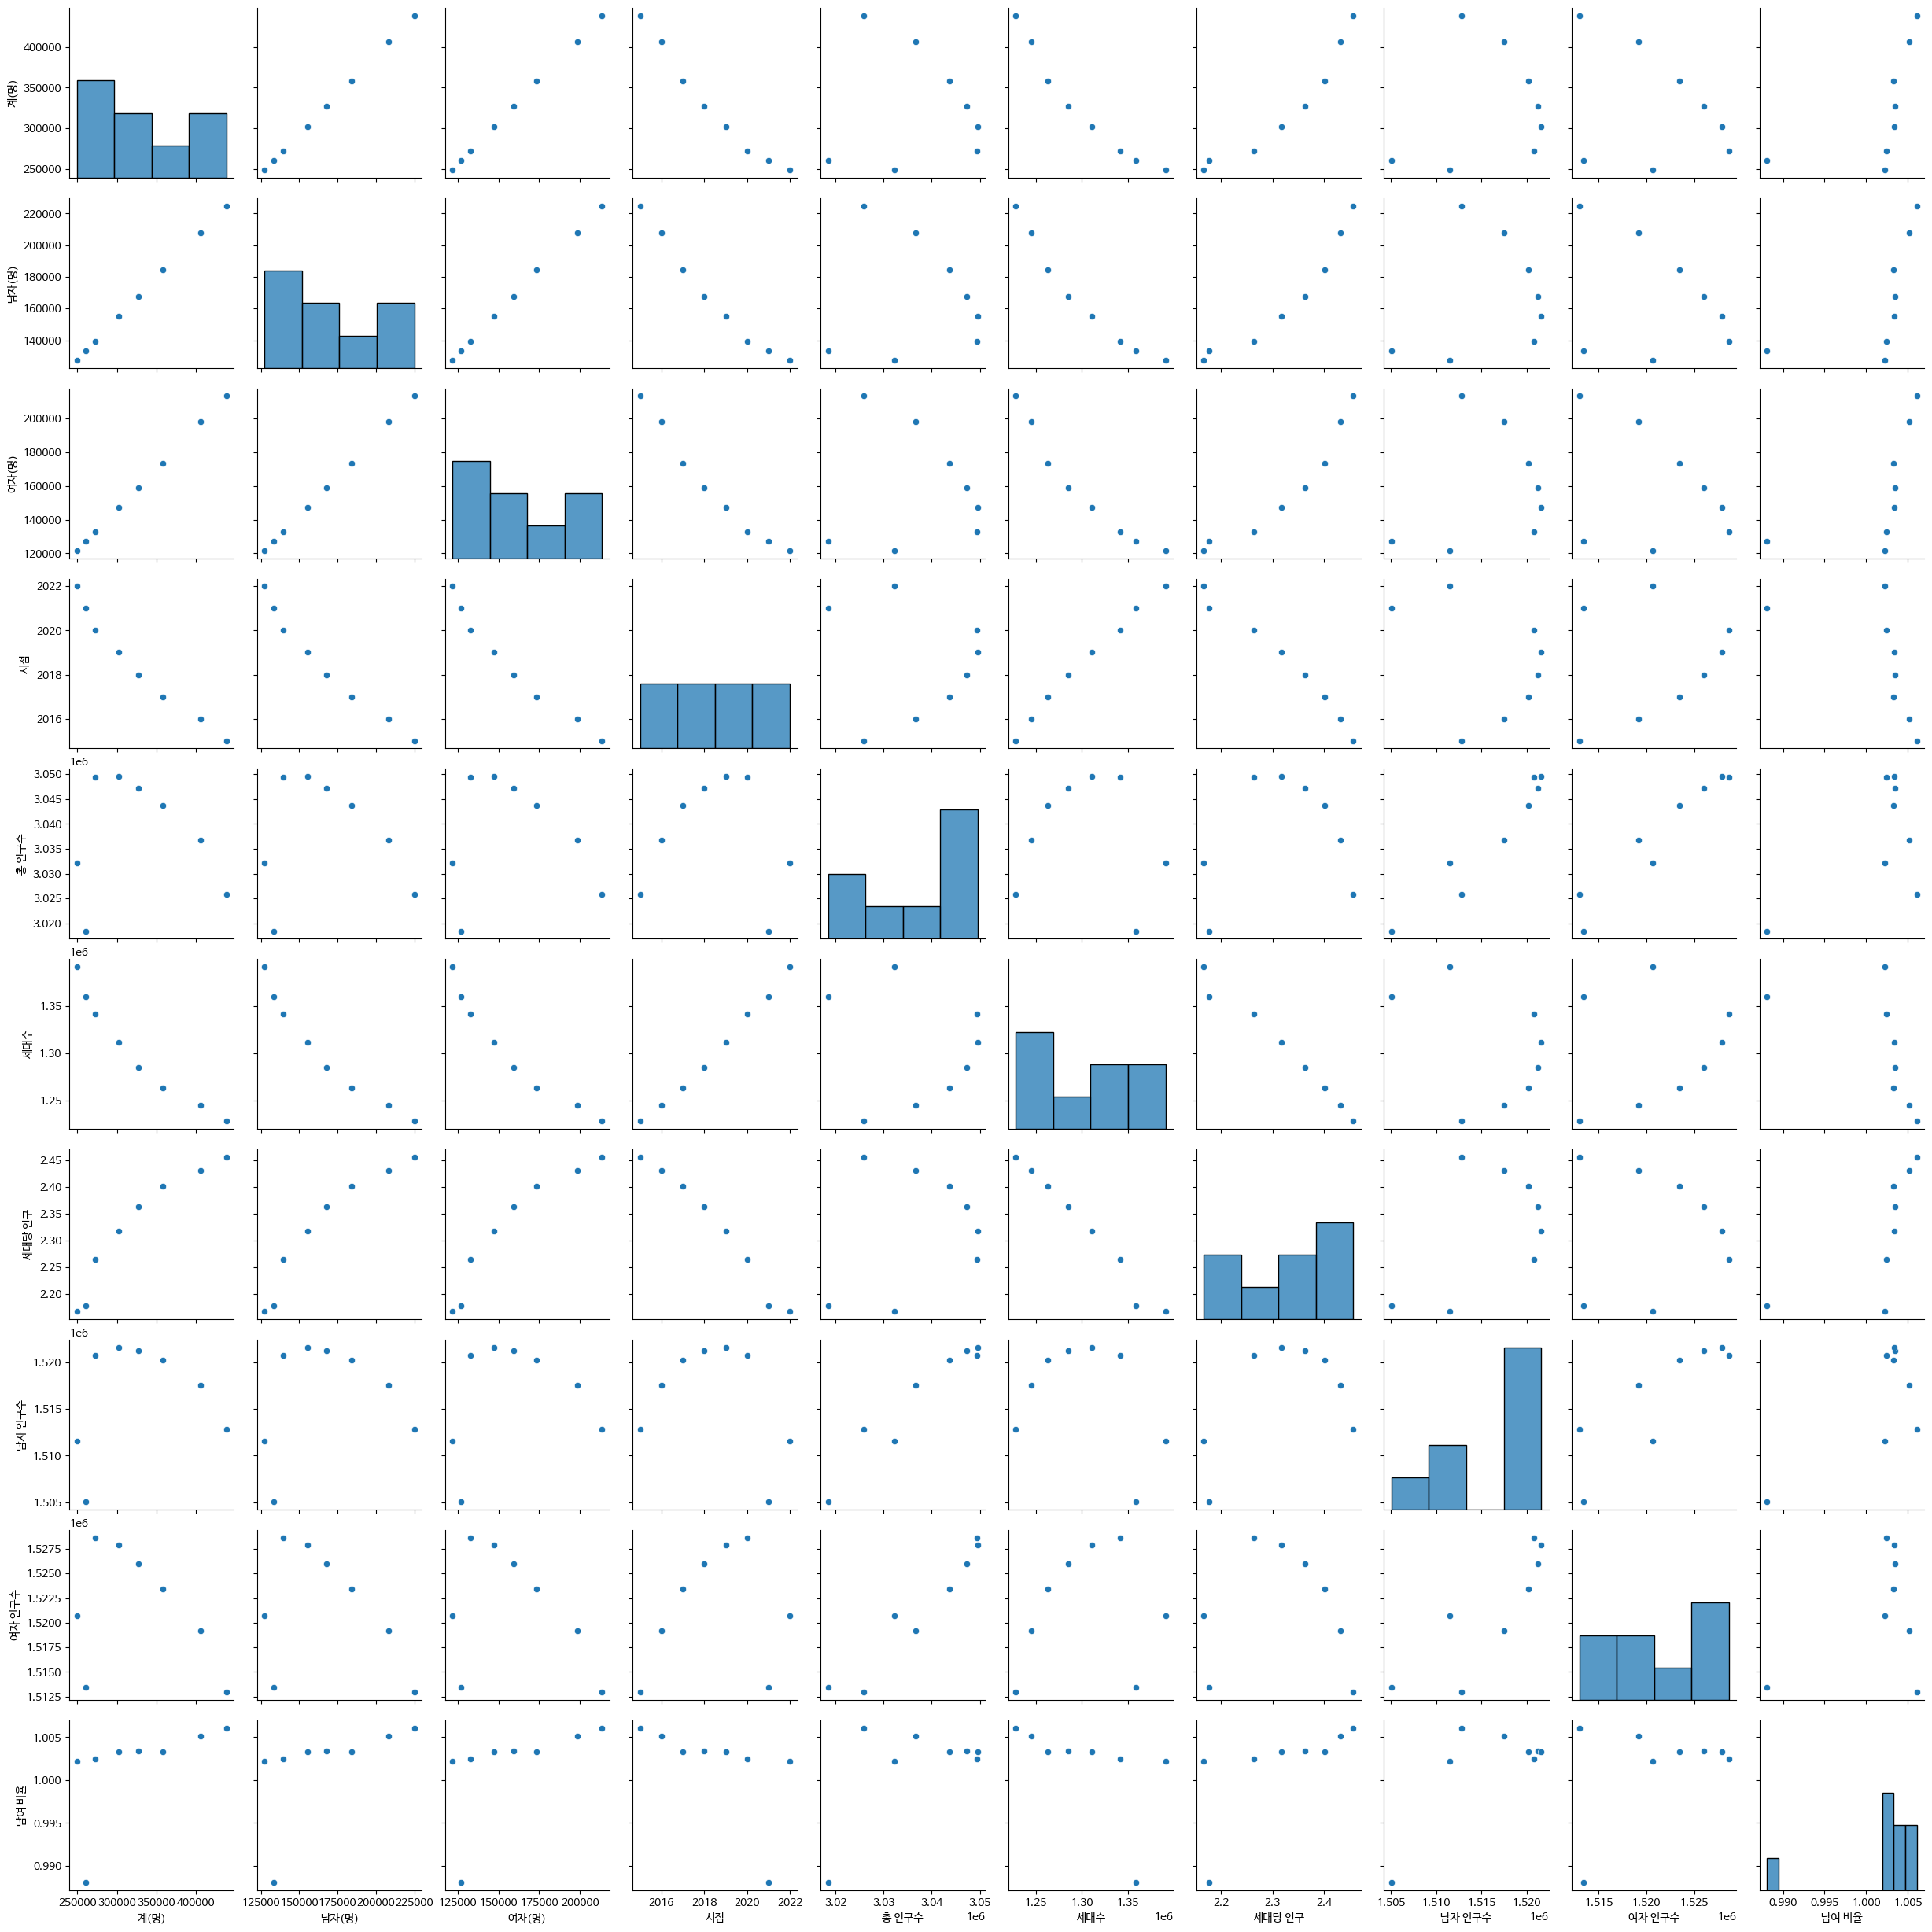

In [ ]:
# 2-3 두 데이터프레임의 산점도 행렬 그리기
combined_df = pd.concat([nationwide_baby_new.reset_index(drop=True), average_by_year_new.reset_index(drop=True)], axis=1)
combined_df = combined_df.drop('연도', axis=1)

# 산점도 행렬 그리기
sns.pairplot(combined_df)
plt.show()

In [ ]:
combined_df

,계(명),남자(명),여자(명),시점,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,438420.0,224906.0,213514.0,2015,3.025803e+06,1.228268e+06,2.456471,1.512851e+06,1.512952e+06,1.006078
1,406243.0,208064.0,198179.0,2016,3.036671e+06,1.244810e+06,2.431765,1.517519e+06,1.519152e+06,1.005147
2,357771.0,184308.0,173463.0,2017,3.043661e+06,1.263133e+06,2.401324,1.520205e+06,1.523456e+06,1.003284
3,326822.0,167686.0,159136.0,2018,3.047259e+06,1.285398e+06,2.362696,1.521257e+06,1.526002e+06,1.003431
4,302676.0,155416.0,147260.0,2019,3.049525e+06,1.311360e+06,2.317598,1.521602e+06,1.527923e+06,1.003333
5,272337.0,139362.0,132975.0,2020,3.049419e+06,1.341617e+06,2.263873,1.520775e+06,1.528644e+06,1.002451
6,260562.0,133516.0,127046.0,2021,3.018450e+06,1.359306e+06,2.176985,1.505054e+06,1.513396e+06,0.988088
7,249186.0,127454.0,121732.0,2022,3.032217e+06,1.391110e+06,2.166422,1.511531e+06,1.520686e+06,1.002206


In [ ]:
# combined_df데이터 결측값 확인
combined_df.isnull().sum()

계(명)      0
남자(명)     0
여자(명)     0
시점        0
총 인구수     0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64

In [ ]:
#3. 다중 회귀분석
X = combined_df[['총 인구수', '세대수', '세대당 인구']]  # 독립 변수
Y = combined_df['계(명)']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 다중회귀 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   계(명)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     323.4
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.16e-05
Time:                        14:54:52   Log-Likelihood:                -78.014
No. Observations:                   8   AIC:                             164.0
Df Residuals:                       4   BIC:                             164.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.747e+06   6.36e+05      5.893      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# 독립 변수들의 다중공선성 확인
vif_data = pd.DataFrame()
vif_data["Feature"] = ['총 인구수', '세대수', '세대당 인구']  # 독립 변수들
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data["Feature"]))]

# 다중공선성(VIF) 출력
vif_data

,Feature,VIF
0,총 인구수,93529.657611
1,세대수,3.295241
2,세대당 인구,130.784046


In [ ]:
#4. 다중상관분석

# 다중상관분석 수행
U, s, Vt = svd(np.dot(X.T, X))  # X를 사용

# 다중상관계수 계산
canonical_correlations = np.sqrt(s)

# 결과 출력
print("다중상관계수:", canonical_correlations)
print("U 행렬:", U)
print("Vt 행렬:", Vt)

다중상관계수: [9.34979563e+06 1.42206733e+05 2.74120843e-02 9.15391095e-03]
U 행렬: [[-3.02505110e-07 -1.16647335e-07  1.51606197e-01 -9.88440975e-01]
 [-9.18980726e-01 -3.94302454e-01 -1.59588319e-06  8.30043644e-08]
 [-3.94302454e-01  9.18980726e-01  1.84264936e-06  2.94847062e-07]
 [-7.02280757e-07 -2.33188982e-06  9.88440975e-01  1.51606197e-01]]
Vt 행렬: [[-3.02505110e-07 -9.18980726e-01 -3.94302454e-01 -7.02280757e-07]
 [-1.16647633e-07 -3.94302454e-01  9.18980726e-01 -2.33188982e-06]
 [ 1.51571186e-01 -1.59588027e-06  1.84265984e-06  9.88446344e-01]
 [-9.88446344e-01  8.30610075e-08  2.94781523e-07  1.51571186e-01]]


## 2) 신혼부부

### 데이터 전처리

##### 데이터 불러오기

In [ ]:
alowbirthrate = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/신혼부부통계 데이터/시도별_신혼부부_총괄_20240110204133.csv', encoding='cp949')
alowbirthrate.head(3)

,행정구역별,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2016,...,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,신혼부부 수 (A),...,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,1436948,...,1.3,0.80,1032253,555743,53.8,437452,42.4,547929,1.3,0.79
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,278294,...,1.3,0.62,184084,112303,61.0,66419,36.1,85839,1.3,0.62


##### 열이름 변경 및 특정 데이터 추출(통합)

In [ ]:
# 열 이름 변경
alowbirthrate.columns = ['행정구역별', '신혼부부수_2015', '맞벌이부부수_2015', '맞벌이비율_2015', '주택소유신혼부부수_2015', '주택소유율_2015', '총소유주택수_2015', '주택소유부부평균소유주택_2015', '평균출생아수_2015',
                                       '신혼부부수_2016', '맞벌이부부수_2016', '맞벌이비율_2016', '주택소유신혼부부수_2016', '주택소유율_2016', '총소유주택수_2016', '주택소유부부평균소유주택_2016', '평균출생아수_2016',
                                       '신혼부부수_2017', '맞벌이부부수_2017', '맞벌이비율_2017', '주택소유신혼부부수_2017', '주택소유율_2017', '총소유주택수_2017', '주택소유부부평균소유주택_2017', '평균출생아수_2017',
                                       '신혼부부수_2018', '맞벌이부부수_2018', '맞벌이비율_2018', '주택소유신혼부부수_2018', '주택소유율_2018', '총소유주택수_2018', '주택소유부부평균소유주택_2018', '평균출생아수_2018',
                                       '신혼부부수_2019', '맞벌이부부수_2019', '맞벌이비율_2019', '주택소유신혼부부수_2019', '주택소유율_2019', '총소유주택수_2019', '주택소유부부평균소유주택_2019', '평균출생아수_2019',
                                       '신혼부부수_2020', '맞벌이부부수_2020', '맞벌이비율_2020', '주택소유신혼부부수_2020', '주택소유율_2020', '총소유주택수_2020', '주택소유부부평균소유주택_2020', '평균출생아수_2020',
                                       '신혼부부수_2021', '맞벌이부부수_2021', '맞벌이비율_2021', '주택소유신혼부부수_2021', '주택소유율_2021', '총소유주택수_2021', '주택소유부부평균소유주택_2021', '평균출생아수_2021',
                                       '신혼부부수_2022', '맞벌이부부수_2022', '맞벌이비율_2022', '주택소유신혼부부수_2022', '주택소유율_2022', '총소유주택수_2022', '주택소유부부평균소유주택_2022', '평균출생아수_2022']

re_alowbirthrate = alowbirthrate.drop([0], axis = 0)
re_alowbirthrate.head(3)

,행정구역별,신혼부부수_2015,맞벌이부부수_2015,맞벌이비율_2015,주택소유신혼부부수_2015,주택소유율_2015,총소유주택수_2015,주택소유부부평균소유주택_2015,평균출생아수_2015,신혼부부수_2016,...,주택소유부부평균소유주택_2021,평균출생아수_2021,신혼부부수_2022,맞벌이부부수_2022,맞벌이비율_2022,주택소유신혼부부수_2022,주택소유율_2022,총소유주택수_2022,주택소유부부평균소유주택_2022,평균출생아수_2022
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,1436948,...,1.3,0.80,1032253,555743,53.8,437452,42.4,547929,1.3,0.79
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,278294,...,1.3,0.62,184084,112303,61.0,66419,36.1,85839,1.3,0.62
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,88339,...,1.3,0.79,58215,30855,53.0,24147,41.5,31330,1.3,0.78


In [ ]:
# 2015년 데이터만 추출
alowbirthrate_15 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2015' in col]]
alowbirthrate_15['시점'] = '2015'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2015': '신혼부부수', '맞벌이부부수_2015': '맞벌이부부수', '맞벌이비율_2015': '맞벌이비율', '주택소유신혼부부수_2015':'주택소유신혼부부', '주택소유율_2015':'주택소유율', '총소유주택수_2015':'총소유주택수', '주택소유부부평균소유주택_2015':'주택소유부부평균소유주택수',  '평균출생아수_2015':'평균출생아수'}

alowbirthrate_15 = alowbirthrate_15.rename(columns=new_columns)
alowbirthrate_15_drop = alowbirthrate_15.dropna(axis=0)
alowbirthrate_15_drop.head(3)

<ipython-input-180-65ec12ac905b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_15['시점'] = '2015'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015


In [ ]:
# 2016년 데이터만 추출
alowbirthrate_16 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2016' in col]]
alowbirthrate_16['시점'] = '2016'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2016': '신혼부부수', '맞벌이부부수_2016': '맞벌이부부수', '맞벌이비율_2016': '맞벌이비율', '주택소유신혼부부수_2016':'주택소유신혼부부', '주택소유율_2016':'주택소유율', '총소유주택수_2016':'총소유주택수', '주택소유부부평균소유주택_2016':'주택소유부부평균소유주택수', '평균출생아수_2016':'평균출생아수'}

alowbirthrate_16 = alowbirthrate_16.rename(columns=new_columns)
alowbirthrate_16_drop = alowbirthrate_16.dropna(axis=0)
alowbirthrate_16_drop.head(3)

<ipython-input-181-bf52cdd1e9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_16['시점'] = '2016'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,2016
2,서울특별시,278294,137150,49.3,106549,38.3,149295,1.4,0.76,2016
3,부산광역시,88339,35769,40.5,43465,49.2,57266,1.3,0.92,2016


In [ ]:
# 2017년 데이터만 추출
alowbirthrate_17 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2017' in col]]
alowbirthrate_17['시점'] = '2017'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2017': '신혼부부수', '맞벌이부부수_2017': '맞벌이부부수', '맞벌이비율_2017': '맞벌이비율', '주택소유신혼부부수_2017':'주택소유신혼부부', '주택소유율_2017':'주택소유율', '총소유주택수_2017':'총소유주택수', '주택소유부부평균소유주택_2017':'주택소유부부평균소유주택수', '평균출생아수_2017':'평균출생아수'}

alowbirthrate_17 = alowbirthrate_17.rename(columns=new_columns)
alowbirthrate_17_drop = alowbirthrate_17.dropna(axis=0)
alowbirthrate_17_drop.head(3)

<ipython-input-182-55b0cd9e96ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_17['시점'] = '2017'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,2017
2,서울특별시,263148,131338,49.9,103090,39.2,140223,1.4,0.74,2017
3,부산광역시,83545,33953,40.6,41235,49.4,55268,1.3,0.91,2017


In [ ]:
# 2018년 데이터만 추출
alowbirthrate_18 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2018' in col]]
alowbirthrate_18['시점'] = '2018'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2018': '신혼부부수', '맞벌이부부수_2018': '맞벌이부부수', '맞벌이비율_2018': '맞벌이비율', '주택소유신혼부부수_2018':'주택소유신혼부부', '주택소유율_2018':'주택소유율', '총소유주택수_2018':'총소유주택수', '주택소유부부평균소유주택_2018':'주택소유부부평균소유주택수', '평균출생아수_2018':'평균출생아수'}

alowbirthrate_18 = alowbirthrate_18.rename(columns=new_columns)
alowbirthrate_18_drop = alowbirthrate_18.dropna(axis=0)
alowbirthrate_18_drop.head(3)

<ipython-input-183-efa3c2ff453a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_18['시점'] = '2018'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,2018
2,서울특별시,246867,129568,52.5,96928,39.3,129937,1.3,0.70,2018
3,부산광역시,77755,33632,43.3,37101,47.7,50000,1.4,0.88,2018


In [ ]:
# 2019년 데이터만 추출
alowbirthrate_19 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2019' in col]]
alowbirthrate_19['시점'] = '2019'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2019': '신혼부부수', '맞벌이부부수_2019': '맞벌이부부수', '맞벌이비율_2019': '맞벌이비율', '주택소유신혼부부수_2019':'주택소유신혼부부', '주택소유율_2019':'주택소유율', '총소유주택수_2019':'총소유주택수', '주택소유부부평균소유주택_2019':'주택소유부부평균소유주택수', '평균출생아수_2019':'평균출생아수'}

alowbirthrate_19 = alowbirthrate_19.rename(columns=new_columns)
alowbirthrate_19_drop = alowbirthrate_19.dropna(axis=0)
alowbirthrate_19_drop.head(3)

<ipython-input-184-edf8292b79bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_19['시점'] = '2019'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,2019
2,서울특별시,232454,125266,53.9,86801,37.3,117005,1.4,0.67,2019
3,부산광역시,72403,32413,44.8,32495,44.9,43629,1.3,0.84,2019


In [ ]:
# 2020년 데이터만 추출
alowbirthrate_20 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2020' in col]]
alowbirthrate_20['시점'] = '2020'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2020': '신혼부부수', '맞벌이부부수_2020': '맞벌이부부수', '맞벌이비율_2020': '맞벌이비율', '주택소유신혼부부수_2020':'주택소유신혼부부', '주택소유율_2020':'주택소유율', '총소유주택수_2020':'총소유주택수', '주택소유부부평균소유주택_2020':'주택소유부부평균소유주택수', '평균출생아수_2020':'평균출생아수'}

alowbirthrate_20 = alowbirthrate_20.rename(columns=new_columns)
alowbirthrate_20_drop = alowbirthrate_20.dropna(axis=0)
alowbirthrate_20_drop.head(3)

<ipython-input-185-88f1693983fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_20['시점'] = '2020'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,2020
2,서울특별시,219101,124450,56.8,80134,36.6,106151,1.3,0.63,2020
3,부산광역시,67632,32299,47.8,29180,43.1,39052,1.3,0.81,2020


In [ ]:
# 2021년 데이터만 추출
alowbirthrate_21 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2021' in col]]
alowbirthrate_21['시점'] = '2021'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2021': '신혼부부수', '맞벌이부부수_2021': '맞벌이부부수', '맞벌이비율_2021': '맞벌이비율', '주택소유신혼부부수_2021':'주택소유신혼부부', '주택소유율_2021':'주택소유율', '총소유주택수_2021':'총소유주택수', '주택소유부부평균소유주택_2021':'주택소유부부평균소유주택수', '평균출생아수_2021':'평균출생아수'}

alowbirthrate_21 = alowbirthrate_21.rename(columns=new_columns)
alowbirthrate_21_drop = alowbirthrate_21.dropna(axis=0)
alowbirthrate_21_drop.head(3)

<ipython-input-186-a8d64e42cad3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_21['시점'] = '2021'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,2021
2,서울특별시,200477,118770,59.2,74588,37.2,96108,1.3,0.62,2021
3,부산광역시,62431,31683,50.7,26694,42.8,35210,1.3,0.79,2021


In [ ]:
# 2022년 데이터만 추출
alowbirthrate_22 = re_alowbirthrate[['행정구역별'] + [col for col in re_alowbirthrate.columns if '2022' in col]]
alowbirthrate_22['시점'] = '2022'
new_columns = {'행정구역별': '행정구역', '신혼부부수_2022': '신혼부부수', '맞벌이부부수_2022': '맞벌이부부수', '맞벌이비율_2022': '맞벌이비율', '주택소유신혼부부수_2022':'주택소유신혼부부', '주택소유율_2022':'주택소유율', '총소유주택수_2022':'총소유주택수', '주택소유부부평균소유주택_2022':'주택소유부부평균소유주택수', '평균출생아수_2022':'평균출생아수'}

alowbirthrate_22 = alowbirthrate_22.rename(columns=new_columns)
alowbirthrate_22_drop = alowbirthrate_22.dropna(axis=0)
alowbirthrate_22_drop.head(3)

<ipython-input-187-c2cd1aabfeb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alowbirthrate_22['시점'] = '2022'


,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1032253,555743,53.8,437452,42.4,547929,1.3,0.79,2022
2,서울특별시,184084,112303,61.0,66419,36.1,85839,1.3,0.62,2022
3,부산광역시,58215,30855,53.0,24147,41.5,31330,1.3,0.78,2022


In [ ]:
# 데이터 통합
alowbirthrate_all = pd.concat([alowbirthrate_15, alowbirthrate_16, alowbirthrate_17, alowbirthrate_18, alowbirthrate_19, alowbirthrate_20, alowbirthrate_21, alowbirthrate_22])
alowbirthrate_all

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015
4,대구광역시,62811,23646,37.6,29353,46.7,35966,1.2,0.96,2015
5,인천광역시,89747,34291,38.2,40783,45.4,52464,1.3,0.95,2015
...,...,...,...,...,...,...,...,...,...,...
14,전라북도,29072,14940,51.4,13695,47.1,17491,1.3,0.95,2022
15,전라남도,31640,15334,48.5,16786,53.1,21538,1.3,1.01,2022
16,경상북도,45032,21090,46.8,22973,51.0,28762,1.3,0.90,2022
17,경상남도,59601,29293,49.1,30662,51.4,38232,1.2,0.88,2022


##### 데이터 타입 확인 및 변경

In [ ]:
alowbirthrate_all_info = alowbirthrate_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   행정구역           144 non-null    object
 1   신혼부부수          144 non-null    object
 2   맞벌이부부수         144 non-null    object
 3   맞벌이비율          144 non-null    object
 4   주택소유신혼부부       144 non-null    object
 5   주택소유율          144 non-null    object
 6   총소유주택수         144 non-null    object
 7   주택소유부부평균소유주택수  144 non-null    object
 8   평균출생아수         144 non-null    object
 9   시점             144 non-null    object
dtypes: object(10)
memory usage: 12.4+ KB


In [ ]:
# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in alowbirthrate_all.columns if col != '행정구역']

# 문자열을 숫자로 변환
alowbirthrate_all[columns_to_process] = alowbirthrate_all[columns_to_process].apply(pd.to_numeric)
alowbirthrate_all.head(3)

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015


In [ ]:
alowbirthrate_all_info = alowbirthrate_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역           144 non-null    object 
 1   신혼부부수          144 non-null    int64  
 2   맞벌이부부수         144 non-null    int64  
 3   맞벌이비율          144 non-null    float64
 4   주택소유신혼부부       144 non-null    int64  
 5   주택소유율          144 non-null    float64
 6   총소유주택수         144 non-null    int64  
 7   주택소유부부평균소유주택수  144 non-null    float64
 8   평균출생아수         144 non-null    float64
 9   시점             144 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 12.4+ KB


##### 결측값확인

In [ ]:
missing = alowbirthrate_all.isnull()
print(missing.any().any())

False


-> 데이터 내에 None값이 없음을 확인했음

##### 테이터 전국별 행정구역별 나누기

In [ ]:
nationwide_marriage = alowbirthrate_all[alowbirthrate_all['행정구역'] == '전국']
nationwide_marriage

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
1,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,2016
1,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,2017
1,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,2018
1,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,2019
1,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,2020
1,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,2021
1,전국,1032253,555743,53.8,437452,42.4,547929,1.3,0.79,2022


In [ ]:
area_marriage = alowbirthrate_all[alowbirthrate_all.행정구역 != '전국']
area_marriage

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
2,서울특별시,291341,137986,47.4,106804,36.7,148026,1.4,0.77,2015
3,부산광역시,90578,35759,39.5,43966,48.5,58227,1.3,0.93,2015
4,대구광역시,62811,23646,37.6,29353,46.7,35966,1.2,0.96,2015
5,인천광역시,89747,34291,38.2,40783,45.4,52464,1.3,0.95,2015
6,광주광역시,40707,17000,41.8,21081,51.8,25836,1.2,1.03,2015
...,...,...,...,...,...,...,...,...,...,...
14,전라북도,29072,14940,51.4,13695,47.1,17491,1.3,0.95,2022
15,전라남도,31640,15334,48.5,16786,53.1,21538,1.3,1.01,2022
16,경상북도,45032,21090,46.8,22973,51.0,28762,1.3,0.90,2022
17,경상남도,59601,29293,49.1,30662,51.4,38232,1.2,0.88,2022


#### 0) 데이터 전처리 및 추가 데이터

###### 1. 파일 통합(2015-2023)

In [ ]:
# 2015-2023년도 파일 통합
population1501_1712 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/201501_201712_주민등록인구및세대현황_월간.csv', encoding='cp949')
population1801_2012 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/201801_202012_주민등록인구및세대현황_월간.csv', encoding='cp949')
population2101_2311 = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/주민등록 인구 및 세대 현황 데이터/202101_202311_주민등록인구및세대현황_월간.csv', encoding='cp949')
population = pd.concat([population1501_1712, population1801_2012, population2101_2311])
population.head(3)

,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국 (1000000000),"51,342,881","20,740,958",2.48,"25,675,816","25,667,065",1.00,"51,360,454","20,772,167",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 (1100000000),"10,104,515","4,196,435",2.41,"4,979,523","5,124,992",0.97,"10,105,206","4,201,451",2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시 (2600000000),"3,517,898","1,422,500",2.47,"1,739,447","1,778,451",0.98,"3,517,939","1,424,605",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### * 데이터 타입 변경

In [ ]:
# 행정구역 열에서 숫자와 괄호 제거하여 문자데이터만 남기기
population['행정구역'] = population['행정구역'].str.replace(r'[\d\(\)]', '')

# 결과 확인
population.head(3)

<ipython-input-196-314e7ae6d8d4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  population['행정구역'] = population['행정구역'].str.replace(r'[\d\(\)]', '')


,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국,"51,342,881","20,740,958",2.48,"25,675,816","25,667,065",1.00,"51,360,454","20,772,167",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,"10,104,515","4,196,435",2.41,"4,979,523","5,124,992",0.97,"10,105,206","4,201,451",2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시,"3,517,898","1,422,500",2.47,"1,739,447","1,778,451",0.98,"3,517,939","1,424,605",2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# "," 데이터 존재
# 이는 object로 인식, 이를 숫자형 데이터로 변경

# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in population.columns if col != '행정구역']

# 쉼표 제거
population[columns_to_process] = population[columns_to_process].replace({',': ''}, regex=True)

# 문자열을 숫자로 변환
population[columns_to_process] = population[columns_to_process].apply(pd.to_numeric)
population.head(3)

,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2023년10월_세대당 인구,2023년10월_남자 인구수,2023년10월_여자 인구수,2023년10월_남여 비율,2023년11월_총인구수,2023년11월_세대수,2023년11월_세대당 인구,2023년11월_남자 인구수,2023년11월_여자 인구수,2023년11월_남여 비율
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,51360454.0,20772167.0,2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,10105206.0,4201451.0,2.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,3517939.0,1424605.0,2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. 년/월 데이터 생성 및 열 이름 재설정

###### 1) 2015년

In [ ]:
# 2015년 01월 데이터만 추출(201501-122311 동일 처리)
data_1501 = population[['행정구역'] + [col for col in population.columns if '2015년01월' in col]]
data_1501['시점'] = '2015년 01월'
new_columns = {'행정구역': '행정구역', '2015년01월_총인구수': '총 인구수', '2015년01월_세대수': '세대수', '2015년01월_세대당 인구': '세대당 인구', '2015년01월_남자 인구수': '남자 인구수', '2015년01월_여자 인구수': '여자 인구수', '2015년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1501 = data_1501.rename(columns=new_columns)
data_1501_drop = data_1501.dropna(axis=0)
data_1501_drop.head(3)

<ipython-input-198-f0b25cf97e0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1501['시점'] = '2015년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,2015년 01월
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,2015년 01월
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,2015년 01월


In [ ]:
# 2015년 02월 데이터만 추출
data_1502 = population[['행정구역'] + [col for col in population.columns if '2015년02월' in col]]
data_1502['시점'] = '2015년 02월'
new_columns = {'행정구역': '행정구역', '2015년02월_총인구수': '총 인구수', '2015년02월_세대수': '세대수', '2015년02월_세대당 인구': '세대당 인구', '2015년02월_남자 인구수': '남자 인구수', '2015년02월_여자 인구수': '여자 인구수', '2015년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1502 = data_1502.rename(columns=new_columns)
data_1502_drop = data_1502.dropna(axis=0)
data_1502_drop.head(3)

<ipython-input-199-93f9b3f83db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1502['시점'] = '2015년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51360454.0,20772167.0,2.47,25683724.0,25676730.0,1.00,2015년 02월
1,서울특별시,10105206.0,4201451.0,2.41,4979040.0,5126166.0,0.97,2015년 02월
2,부산광역시,3517939.0,1424605.0,2.47,1739181.0,1778758.0,0.98,2015년 02월


In [ ]:
# 2015년 03월 데이터만 추출
data_1503 = population[['행정구역'] + [col for col in population.columns if '2015년03월' in col]]
data_1503['시점'] = '2015년 03월'
new_columns = {'행정구역': '행정구역', '2015년03월_총인구수': '총 인구수', '2015년03월_세대수': '세대수', '2015년03월_세대당 인구': '세대당 인구', '2015년03월_남자 인구수': '남자 인구수', '2015년03월_여자 인구수': '여자 인구수', '2015년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1503 = data_1503.rename(columns=new_columns)
data_1503_drop = data_1503.dropna(axis=0)
data_1503_drop.head(3)

<ipython-input-200-d32290bfdbd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1503['시점'] = '2015년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51378174.0,20801104.0,2.47,25691721.0,25686453.0,1.00,2015년 03월
1,서울특별시,10100987.0,4202812.0,2.40,4976047.0,5124940.0,0.97,2015년 03월
2,부산광역시,3515839.0,1425630.0,2.47,1737884.0,1777955.0,0.98,2015년 03월


In [ ]:
# 2015년 04월 데이터만 추출
data_1504 = population[['행정구역'] + [col for col in population.columns if '2015년04월' in col]]
data_1504['시점'] = '2015년 04월'
new_columns = {'행정구역': '행정구역', '2015년04월_총인구수': '총 인구수', '2015년04월_세대수': '세대수', '2015년04월_세대당 인구': '세대당 인구', '2015년04월_남자 인구수': '남자 인구수', '2015년04월_여자 인구수': '여자 인구수', '2015년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1504 = data_1504.rename(columns=new_columns)
data_1504_drop = data_1504.dropna(axis=0)
data_1504_drop.head(3)

<ipython-input-201-26983decf1a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1504['시점'] = '2015년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51395238.0,20821017.0,2.47,25699428.0,25695810.0,1.00,2015년 04월
1,서울특별시,10094889.0,4200803.0,2.40,4972616.0,5122273.0,0.97,2015년 04월
2,부산광역시,3515439.0,1426601.0,2.46,1737312.0,1778127.0,0.98,2015년 04월


In [ ]:
# 2015년 05월 데이터만 추출
data_1505 = population[['행정구역'] + [col for col in population.columns if '2015년05월' in col]]
data_1505['시점'] = '2015년 05월'
new_columns = {'행정구역': '행정구역', '2015년05월_총인구수': '총 인구수', '2015년05월_세대수': '세대수', '2015년05월_세대당 인구': '세대당 인구', '2015년05월_남자 인구수': '남자 인구수', '2015년05월_여자 인구수': '여자 인구수', '2015년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1505 = data_1505.rename(columns=new_columns)
data_1505_drop = data_1505.dropna(axis=0)
data_1505_drop.head(3)

<ipython-input-202-c39a5f6a350f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1505['시점'] = '2015년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51413925.0,20844274.0,2.47,25707941.0,25705984.0,1.00,2015년 05월
1,서울특별시,10088393.0,4199356.0,2.40,4968609.0,5119784.0,0.97,2015년 05월
2,부산광역시,3515806.0,1428115.0,2.46,1737367.0,1778439.0,0.98,2015년 05월


In [ ]:
# 2015년 06월 데이터만 추출
data_1506 = population[['행정구역'] + [col for col in population.columns if '2015년06월' in col]]
data_1506['시점'] = '2015년 06월'
new_columns = {'행정구역': '행정구역', '2015년06월_총인구수': '총 인구수', '2015년06월_세대수': '세대수', '2015년06월_세대당 인구': '세대당 인구', '2015년06월_남자 인구수': '남자 인구수', '2015년06월_여자 인구수': '여자 인구수', '2015년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1506 = data_1506.rename(columns=new_columns)
data_1506_drop = data_1506.dropna(axis=0)
data_1506_drop.head(3)

<ipython-input-203-bec2d8d72bd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1506['시점'] = '2015년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51431100.0,20870280.0,2.46,25715304.0,25715796.0,1.00,2015년 06월
1,서울특별시,10078850.0,4197478.0,2.40,4962774.0,5116076.0,0.97,2015년 06월
2,부산광역시,3517491.0,1430441.0,2.46,1737975.0,1779516.0,0.98,2015년 06월


In [ ]:
# 2015년 07월 데이터만 추출
data_1507 = population[['행정구역'] + [col for col in population.columns if '2015년07월' in col]]
data_1507['시점'] = '2015년 07월'
new_columns = {'행정구역': '행정구역', '2015년07월_총인구수': '총 인구수', '2015년07월_세대수': '세대수', '2015년07월_세대당 인구': '세대당 인구', '2015년07월_남자 인구수': '남자 인구수', '2015년07월_여자 인구수': '여자 인구수', '2015년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1507 = data_1507.rename(columns=new_columns)
data_1507_drop = data_1507.dropna(axis=0)
data_1507_drop.head(3)

<ipython-input-204-f759d6c48ce8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1507['시점'] = '2015년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51448183.0,20892349.0,2.46,25722769.0,25725414.0,1.00,2015년 07월
1,서울특별시,10071654.0,4196515.0,2.40,4958550.0,5113104.0,0.97,2015년 07월
2,부산광역시,3518955.0,1432723.0,2.46,1738689.0,1780266.0,0.98,2015년 07월


In [ ]:
# 2015년 08월 데이터만 추출
data_1508 = population[['행정구역'] + [col for col in population.columns if '2015년08월' in col]]
data_1508['시점'] = '2015년 08월'
new_columns = {'행정구역': '행정구역', '2015년08월_총인구수': '총 인구수', '2015년08월_세대수': '세대수', '2015년08월_세대당 인구': '세대당 인구', '2015년08월_남자 인구수': '남자 인구수', '2015년08월_여자 인구수': '여자 인구수', '2015년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1508 = data_1508.rename(columns=new_columns)
data_1508_drop = data_1508.dropna(axis=0)
data_1508_drop.head(3)

<ipython-input-205-a65f7938dd11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1508['시점'] = '2015년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51465228.0,20916461.0,2.46,25730212.0,25735016.0,1.00,2015년 08월
1,서울특별시,10063197.0,4196071.0,2.40,4953797.0,5109400.0,0.97,2015년 08월
2,부산광역시,3517907.0,1434025.0,2.45,1738010.0,1779897.0,0.98,2015년 08월


In [ ]:
# 2015년 09월 데이터만 추출
data_1509 = population[['행정구역'] + [col for col in population.columns if '2015년09월' in col]]
data_1509['시점'] = '2015년 09월'
new_columns = {'행정구역': '행정구역', '2015년09월_총인구수': '총 인구수', '2015년09월_세대수': '세대수', '2015년09월_세대당 인구': '세대당 인구', '2015년09월_남자 인구수': '남자 인구수', '2015년09월_여자 인구수': '여자 인구수', '2015년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1509 = data_1509.rename(columns=new_columns)
data_1509_drop = data_1509.dropna(axis=0)
data_1509_drop.head(3)

<ipython-input-206-056ddf7cbe72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1509['시점'] = '2015년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51482816.0,20940559.0,2.46,25738014.0,25744802.0,1.00,2015년 09월
1,서울특별시,10055027.0,4195438.0,2.40,4949180.0,5105847.0,0.97,2015년 09월
2,부산광역시,3516704.0,1434668.0,2.45,1737350.0,1779354.0,0.98,2015년 09월


In [ ]:
# 2015년 10월 데이터만 추출
data_1510 = population[['행정구역'] + [col for col in population.columns if '2015년10월' in col]]
data_1510['시점'] = '2015년 10월'
new_columns = {'행정구역': '행정구역', '2015년10월_총인구수': '총 인구수', '2015년10월_세대수': '세대수', '2015년10월_세대당 인구': '세대당 인구', '2015년10월_남자 인구수': '남자 인구수', '2015년10월_여자 인구수': '여자 인구수', '2015년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1510 = data_1510.rename(columns=new_columns)
data_1510_drop = data_1510.dropna(axis=0)
data_1510_drop.head(3)

<ipython-input-207-dbd53bc7944d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1510['시점'] = '2015년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51500986.0,20967469.0,2.46,25746132.0,25754854.0,1.00,2015년 10월
1,서울특별시,10045027.0,4194103.0,2.40,4943565.0,5101462.0,0.97,2015년 10월
2,부산광역시,3515689.0,1435812.0,2.45,1736778.0,1778911.0,0.98,2015년 10월


In [ ]:
# 2015년 11월 데이터만 추출
data_1511 = population[['행정구역'] + [col for col in population.columns if '2015년11월' in col]]
data_1511['시점'] = '2015년 11월'
new_columns = {'행정구역': '행정구역', '2015년11월_총인구수': '총 인구수', '2015년11월_세대수': '세대수', '2015년11월_세대당 인구': '세대당 인구', '2015년11월_남자 인구수': '남자 인구수', '2015년11월_여자 인구수': '여자 인구수', '2015년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1511 = data_1511.rename(columns=new_columns)
data_1511_drop = data_1511.dropna(axis=0)
data_1511_drop.head(3)

<ipython-input-208-e7c5c7693382>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1511['시점'] = '2015년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51515399.0,20988782.0,2.45,25752345.0,25763054.0,1.00,2015년 11월
1,서울특별시,10035597.0,4192412.0,2.39,4938482.0,5097115.0,0.97,2015년 11월
2,부산광역시,3514842.0,1436851.0,2.45,1736279.0,1778563.0,0.98,2015년 11월


In [ ]:
# 2015년 12월 데이터만 추출
data_1512 = population[['행정구역'] + [col for col in population.columns if '2015년12월' in col]]
data_1512['시점'] = '2015년 12월'
new_columns = {'행정구역': '행정구역', '2015년12월_총인구수': '총 인구수', '2015년12월_세대수': '세대수', '2015년12월_세대당 인구': '세대당 인구', '2015년12월_남자 인구수': '남자 인구수', '2015년12월_여자 인구수': '여자 인구수', '2015년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1512 = data_1512.rename(columns=new_columns)
data_1512_drop = data_1512.dropna(axis=0)
data_1512_drop.head(3)

<ipython-input-209-03a84f366915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1512['시점'] = '2015년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51529338.0,21011152.0,2.45,25758186.0,25771152.0,1.00,2015년 12월
1,서울특별시,10022181.0,4189948.0,2.39,4930943.0,5091238.0,0.97,2015년 12월
2,부산광역시,3513777.0,1437818.0,2.44,1735570.0,1778207.0,0.98,2015년 12월


###### 2) 2016년

In [ ]:
# 2016년 01월 데이터만 추출
data_1601 = population[['행정구역'] + [col for col in population.columns if '2016년01월' in col]]
data_1601['시점'] = '2016년 01월'
new_columns = {'행정구역': '행정구역', '2016년01월_총인구수': '총 인구수', '2016년01월_세대수': '세대수', '2016년01월_세대당 인구': '세대당 인구', '2016년01월_남자 인구수': '남자 인구수', '2016년01월_여자 인구수': '여자 인구수', '2016년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1601 = data_1601.rename(columns=new_columns)
data_1601_drop = data_1601.dropna(axis=0)
data_1601_drop.head(3)

<ipython-input-210-d4f40ec12537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1601['시점'] = '2016년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51541582.0,21026847.0,2.45,25763237.0,25778345.0,1.00,2016년 01월
1,서울특별시,10018537.0,4190415.0,2.39,4927897.0,5090640.0,0.97,2016년 01월
2,부산광역시,3513361.0,1438704.0,2.44,1735280.0,1778081.0,0.98,2016년 01월


In [ ]:
# 2016년 02월 데이터만 추출
data_1602 = population[['행정구역'] + [col for col in population.columns if '2016년02월' in col]]
data_1602['시점'] = '2016년 02월'
new_columns = {'행정구역': '행정구역', '2016년02월_총인구수': '총 인구수', '2016년02월_세대수': '세대수', '2016년02월_세대당 인구': '세대당 인구', '2016년02월_남자 인구수': '남자 인구수', '2016년02월_여자 인구수': '여자 인구수', '2016년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1602 = data_1602.rename(columns=new_columns)
data_1602_drop = data_1602.dropna(axis=0)
data_1602_drop.head(3)

<ipython-input-211-752ce14226a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1602['시점'] = '2016년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51555409.0,21057262.0,2.45,25769138.0,25786271.0,1.00,2016년 02월
1,서울특별시,10014261.0,4193517.0,2.39,4924977.0,5089284.0,0.97,2016년 02월
2,부산광역시,3513192.0,1440354.0,2.44,1734825.0,1778367.0,0.98,2016년 02월


In [ ]:
# 2016년 03월 데이터만 추출
data_1603 = population[['행정구역'] + [col for col in population.columns if '2016년03월' in col]]
data_1603['시점'] = '2016년 03월'
new_columns = {'행정구역': '행정구역', '2016년03월_총인구수': '총 인구수', '2016년03월_세대수': '세대수', '2016년03월_세대당 인구': '세대당 인구', '2016년03월_남자 인구수': '남자 인구수', '2016년03월_여자 인구수': '여자 인구수', '2016년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1603 = data_1603.rename(columns=new_columns)
data_1603_drop = data_1603.dropna(axis=0)
data_1603_drop.head(3)

<ipython-input-212-324f93421a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1603['시점'] = '2016년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51569536.0,21084550.0,2.45,25775322.0,25794214.0,1.00,2016년 03월
1,서울특별시,10009588.0,4194485.0,2.39,4922103.0,5087485.0,0.97,2016년 03월
2,부산광역시,3512444.0,1442013.0,2.44,1734251.0,1778193.0,0.98,2016년 03월


In [ ]:
# 2016년 04월 데이터만 추출
data_1604 = population[['행정구역'] + [col for col in population.columns if '2016년04월' in col]]
data_1604['시점'] = '2016년 04월'
new_columns = {'행정구역': '행정구역', '2016년04월_총인구수': '총 인구수', '2016년04월_세대수': '세대수', '2016년04월_세대당 인구': '세대당 인구', '2016년04월_남자 인구수': '남자 인구수', '2016년04월_여자 인구수': '여자 인구수', '2016년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1604 = data_1604.rename(columns=new_columns)
data_1604_drop = data_1604.dropna(axis=0)
data_1604_drop.head(3)

<ipython-input-213-2ab5fe0fbcb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1604['시점'] = '2016년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51584349.0,21104857.0,2.44,25781628.0,25802721.0,1.00,2016년 04월
1,서울특별시,10002979.0,4193887.0,2.39,4918312.0,5084667.0,0.97,2016년 04월
2,부산광역시,3511974.0,1443215.0,2.43,1733680.0,1778294.0,0.97,2016년 04월


In [ ]:
# 2016년 05월 데이터만 추출
data_1605 = population[['행정구역'] + [col for col in population.columns if '2016년05월' in col]]
data_1605['시점'] = '2016년 05월'
new_columns = {'행정구역': '행정구역', '2016년05월_총인구수': '총 인구수', '2016년05월_세대수': '세대수', '2016년05월_세대당 인구': '세대당 인구', '2016년05월_남자 인구수': '남자 인구수', '2016년05월_여자 인구수': '여자 인구수', '2016년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1605 = data_1605.rename(columns=new_columns)
data_1605_drop = data_1605.dropna(axis=0)
data_1605_drop.head(3)

<ipython-input-214-f2975e00f97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1605['시점'] = '2016년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51601265.0,21130317.0,2.44,25788953.0,25812312.0,1.00,2016년 05월
1,서울특별시,9995784.0,4193473.0,2.38,4914078.0,5081706.0,0.97,2016년 05월
2,부산광역시,3510833.0,1444666.0,2.43,1733069.0,1777764.0,0.97,2016년 05월


In [ ]:
# 2016년 06월 데이터만 추출
data_1606 = population[['행정구역'] + [col for col in population.columns if '2016년06월' in col]]
data_1606['시점'] = '2016년 06월'
new_columns = {'행정구역': '행정구역', '2016년06월_총인구수': '총 인구수', '2016년06월_세대수': '세대수', '2016년06월_세대당 인구': '세대당 인구', '2016년06월_남자 인구수': '남자 인구수', '2016년06월_여자 인구수': '여자 인구수', '2016년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1606 = data_1606.rename(columns=new_columns)
data_1606_drop = data_1606.dropna(axis=0)
data_1606_drop.head(3)

<ipython-input-215-da8410ad7a23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1606['시점'] = '2016년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51619330.0,21153853.0,2.44,25796204.0,25823126.0,1.00,2016년 06월
1,서울특별시,9989795.0,4193712.0,2.38,4910202.0,5079593.0,0.97,2016년 06월
2,부산광역시,3509462.0,1445614.0,2.43,1732157.0,1777305.0,0.97,2016년 06월


In [ ]:
# 2016년 07월 데이터만 추출
data_1607 = population[['행정구역'] + [col for col in population.columns if '2016년07월' in col]]
data_1607['시점'] = '2016년 07월'
new_columns = {'행정구역': '행정구역', '2016년07월_총인구수': '총 인구수', '2016년07월_세대수': '세대수', '2016년07월_세대당 인구': '세대당 인구', '2016년07월_남자 인구수': '남자 인구수', '2016년07월_여자 인구수': '여자 인구수', '2016년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1607 = data_1607.rename(columns=new_columns)
data_1607_drop = data_1607.dropna(axis=0)
data_1607_drop.head(3)

<ipython-input-216-5a9ff643f38e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1607['시점'] = '2016년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51634618.0,21173397.0,2.44,25802692.0,25831926.0,1.00,2016년 07월
1,서울특별시,9981673.0,4192776.0,2.38,4905463.0,5076210.0,0.97,2016년 07월
2,부산광역시,3508095.0,1446165.0,2.43,1731316.0,1776779.0,0.97,2016년 07월


In [ ]:
# 2016년 08월 데이터만 추출
data_1608 = population[['행정구역'] + [col for col in population.columns if '2016년08월' in col]]
data_1608['시점'] = '2016년 08월'
new_columns = {'행정구역': '행정구역', '2016년08월_총인구수': '총 인구수', '2016년08월_세대수': '세대수', '2016년08월_세대당 인구': '세대당 인구', '2016년08월_남자 인구수': '남자 인구수', '2016년08월_여자 인구수': '여자 인구수', '2016년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1608 = data_1608.rename(columns=new_columns)
data_1608_drop = data_1608.dropna(axis=0)
data_1608_drop.head(3)

<ipython-input-217-56b766a1e179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1608['시점'] = '2016년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51649552.0,21192974.0,2.44,25809031.0,25840521.0,1.00,2016년 08월
1,서울특별시,9971111.0,4191784.0,2.38,4899436.0,5071675.0,0.97,2016년 08월
2,부산광역시,3507205.0,1446943.0,2.42,1730551.0,1776654.0,0.97,2016년 08월


In [ ]:
# 2016년 09월 데이터만 추출
data_1609 = population[['행정구역'] + [col for col in population.columns if '2016년09월' in col]]
data_1609['시점'] = '2016년 09월'
new_columns = {'행정구역': '행정구역', '2016년09월_총인구수': '총 인구수', '2016년09월_세대수': '세대수', '2016년09월_세대당 인구': '세대당 인구', '2016년09월_남자 인구수': '남자 인구수', '2016년09월_여자 인구수': '여자 인구수', '2016년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1609 = data_1609.rename(columns=new_columns)
data_1609_drop = data_1609.dropna(axis=0)
data_1609_drop.head(3)

<ipython-input-218-66daa79e31c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1609['시점'] = '2016년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51664244.0,21214428.0,2.44,25815202.0,25849042.0,1.00,2016년 09월
1,서울특별시,9964291.0,4191411.0,2.38,4895508.0,5068783.0,0.97,2016년 09월
2,부산광역시,3505821.0,1447601.0,2.42,1729643.0,1776178.0,0.97,2016년 09월


In [ ]:
# 2016년 10월 데이터만 추출
data_1610 = population[['행정구역'] + [col for col in population.columns if '2016년10월' in col]]
data_1610['시점'] = '2016년 10월'
new_columns = {'행정구역': '행정구역', '2016년10월_총인구수': '총 인구수', '2016년10월_세대수': '세대수', '2016년10월_세대당 인구': '세대당 인구', '2016년10월_남자 인구수': '남자 인구수', '2016년10월_여자 인구수': '여자 인구수', '2016년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1610 = data_1610.rename(columns=new_columns)
data_1610_drop = data_1610.dropna(axis=0)
data_1610_drop.head(3)

<ipython-input-219-519dd7d65505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1610['시점'] = '2016년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51677054.0,21241538.0,2.43,25820488.0,25856566.0,1.00,2016년 10월
1,서울특별시,9954791.0,4191313.0,2.38,4890007.0,5064784.0,0.97,2016년 10월
2,부산광역시,3503789.0,1448657.0,2.42,1728422.0,1775367.0,0.97,2016년 10월


In [ ]:
# 2016년 11월 데이터만 추출
data_1611 = population[['행정구역'] + [col for col in population.columns if '2016년11월' in col]]
data_1611['시점'] = '2016년 11월'
new_columns = {'행정구역': '행정구역', '2016년11월_총인구수': '총 인구수', '2016년11월_세대수': '세대수', '2016년11월_세대당 인구': '세대당 인구', '2016년11월_남자 인구수': '남자 인구수', '2016년11월_여자 인구수': '여자 인구수', '2016년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1611 = data_1611.rename(columns=new_columns)
data_1611_drop = data_1611.dropna(axis=0)
data_1611_drop.head(3)

<ipython-input-220-75d4c149750f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1611['시점'] = '2016년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51687682.0,21267187.0,2.43,25824429.0,25863253.0,1.00,2016년 11월
1,서울특별시,9943333.0,4190260.0,2.37,4883805.0,5059528.0,0.97,2016년 11월
2,부산광역시,3501671.0,1449892.0,2.42,1727358.0,1774313.0,0.97,2016년 11월


In [ ]:
# 2016년 12월 데이터만 추출
data_1612 = population[['행정구역'] + [col for col in population.columns if '2016년12월' in col]]
data_1612['시점'] = '2016년 12월'
new_columns = {'행정구역': '행정구역', '2016년12월_총인구수': '총 인구수', '2016년12월_세대수': '세대수', '2016년12월_세대당 인구': '세대당 인구', '2016년12월_남자 인구수': '남자 인구수', '2016년12월_여자 인구수': '여자 인구수', '2016년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1612 = data_1612.rename(columns=new_columns)
data_1612_drop = data_1612.dropna(axis=0)
data_1612_drop.head(3)

<ipython-input-221-d7aff4d3c12e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1612['시점'] = '2016년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51696216.0,21294009.0,2.43,25827594.0,25868622.0,1.00,2016년 12월
1,서울특별시,9930616.0,4189839.0,2.37,4876789.0,5053827.0,0.96,2016년 12월
2,부산광역시,3498529.0,1451270.0,2.41,1725607.0,1772922.0,0.97,2016년 12월


###### 3) 2017년

In [ ]:
# 2017년 01월 데이터만 추출
data_1701 = population[['행정구역'] + [col for col in population.columns if '2017년01월' in col]]
data_1701['시점'] = '2017년 01월'
new_columns = {'행정구역': '행정구역', '2017년01월_총인구수': '총 인구수', '2017년01월_세대수': '세대수', '2017년01월_세대당 인구': '세대당 인구', '2017년01월_남자 인구수': '남자 인구수', '2017년01월_여자 인구수': '여자 인구수', '2017년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1701 = data_1701.rename(columns=new_columns)
data_1701_drop = data_1701.dropna(axis=0)
data_1701_drop.head(3)

<ipython-input-222-ac6bfc0c6a24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1701['시점'] = '2017년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51704332.0,21312864.0,2.43,25830890.0,25873442.0,1.00,2017년 01월
1,서울특별시,9930478.0,4192985.0,2.37,4875745.0,5054733.0,0.96,2017년 01월
2,부산광역시,3496779.0,1452162.0,2.41,1724481.0,1772298.0,0.97,2017년 01월


In [ ]:
# 2017년 02월 데이터만 추출
data_1702 = population[['행정구역'] + [col for col in population.columns if '2017년02월' in col]]
data_1702['시점'] = '2017년 02월'
new_columns = {'행정구역': '행정구역', '2017년02월_총인구수': '총 인구수', '2017년02월_세대수': '세대수', '2017년02월_세대당 인구': '세대당 인구', '2017년02월_남자 인구수': '남자 인구수', '2017년02월_여자 인구수': '여자 인구수', '2017년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1702 = data_1702.rename(columns=new_columns)
data_1702_drop = data_1702.dropna(axis=0)
data_1702_drop.head(3)

<ipython-input-223-0429e57915ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1702['시점'] = '2017년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51712221.0,21352287.0,2.42,25833963.0,25878258.0,1.00,2017년 02월
1,서울특별시,9931412.0,4200761.0,2.36,4874839.0,5056573.0,0.96,2017년 02월
2,부산광역시,3495478.0,1454891.0,2.40,1723568.0,1771910.0,0.97,2017년 02월


In [ ]:
# 2017년 03월 데이터만 추출
data_1703 = population[['행정구역'] + [col for col in population.columns if '2017년03월' in col]]
data_1703['시점'] = '2017년 03월'
new_columns = {'행정구역': '행정구역', '2017년03월_총인구수': '총 인구수', '2017년03월_세대수': '세대수', '2017년03월_세대당 인구': '세대당 인구', '2017년03월_남자 인구수': '남자 인구수', '2017년03월_여자 인구수': '여자 인구수', '2017년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1703 = data_1703.rename(columns=new_columns)
data_1703_drop = data_1703.dropna(axis=0)
data_1703_drop.head(3)

<ipython-input-224-2028081d7078>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1703['시점'] = '2017년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51714935.0,21381346.0,2.42,25833566.0,25881369.0,1.00,2017년 03월
1,서울특별시,9926968.0,4202888.0,2.36,4871560.0,5055408.0,0.96,2017년 03월
2,부산광역시,3493041.0,1456356.0,2.40,1721829.0,1771212.0,0.97,2017년 03월


In [ ]:
# 2017년 04월 데이터만 추출
data_1704 = population[['행정구역'] + [col for col in population.columns if '2017년04월' in col]]
data_1704['시점'] = '2017년 04월'
new_columns = {'행정구역': '행정구역', '2017년04월_총인구수': '총 인구수', '2017년04월_세대수': '세대수', '2017년04월_세대당 인구': '세대당 인구', '2017년04월_남자 인구수': '남자 인구수', '2017년04월_여자 인구수': '여자 인구수', '2017년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1704 = data_1704.rename(columns=new_columns)
data_1704_drop = data_1704.dropna(axis=0)
data_1704_drop.head(3)

<ipython-input-225-1321c7dc8571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1704['시점'] = '2017년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51722903.0,21402062.0,2.42,25836516.0,25886387.0,1.00,2017년 04월
1,서울특별시,9922745.0,4203957.0,2.36,4868367.0,5054378.0,0.96,2017년 04월
2,부산광역시,3491282.0,1457360.0,2.40,1720874.0,1770408.0,0.97,2017년 04월


In [ ]:
# 2017년 05월 데이터만 추출
data_1705 = population[['행정구역'] + [col for col in population.columns if '2017년05월' in col]]
data_1705['시점'] = '2017년 05월'
new_columns = {'행정구역': '행정구역', '2017년05월_총인구수': '총 인구수', '2017년05월_세대수': '세대수', '2017년05월_세대당 인구': '세대당 인구', '2017년05월_남자 인구수': '남자 인구수', '2017년05월_여자 인구수': '여자 인구수', '2017년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1705 = data_1705.rename(columns=new_columns)
data_1705_drop = data_1705.dropna(axis=0)
data_1705_drop.head(3)

<ipython-input-226-35fb96719641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1705['시점'] = '2017년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51732586.0,21429935.0,2.41,25840361.0,25892225.0,1.00,2017년 05월
1,서울특별시,9919016.0,4207393.0,2.36,4865778.0,5053238.0,0.96,2017년 05월
2,부산광역시,3489212.0,1459062.0,2.39,1719792.0,1769420.0,0.97,2017년 05월


In [ ]:
# 2017년 06월 데이터만 추출
data_1706 = population[['행정구역'] + [col for col in population.columns if '2017년06월' in col]]
data_1706['시점'] = '2017년 06월'
new_columns = {'행정구역': '행정구역', '2017년06월_총인구수': '총 인구수', '2017년06월_세대수': '세대수', '2017년06월_세대당 인구': '세대당 인구', '2017년06월_남자 인구수': '남자 인구수', '2017년06월_여자 인구수': '여자 인구수', '2017년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1706 = data_1706.rename(columns=new_columns)
data_1706_drop = data_1706.dropna(axis=0)
data_1706_drop.head(3)

<ipython-input-227-0b2d6fe02f26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1706['시점'] = '2017년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51736224.0,21455795.0,2.41,25840911.0,25895313.0,1.00,2017년 06월
1,서울특별시,9914381.0,4210933.0,2.35,4862573.0,5051808.0,0.96,2017년 06월
2,부산광역시,3486570.0,1460244.0,2.39,1718263.0,1768307.0,0.97,2017년 06월


In [ ]:
# 2017년 07월 데이터만 추출
data_1707 = population[['행정구역'] + [col for col in population.columns if '2017년07월' in col]]
data_1707['시점'] = '2017년 07월'
new_columns = {'행정구역': '행정구역', '2017년07월_총인구수': '총 인구수', '2017년07월_세대수': '세대수', '2017년07월_세대당 인구': '세대당 인구', '2017년07월_남자 인구수': '남자 인구수', '2017년07월_여자 인구수': '여자 인구수', '2017년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1707 = data_1707.rename(columns=new_columns)
data_1707_drop = data_1707.dropna(axis=0)
data_1707_drop.head(3)

<ipython-input-228-870baf4654d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1707['시점'] = '2017년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51744948.0,21482219.0,2.41,25844117.0,25900831.0,1.00,2017년 07월
1,서울특별시,9908612.0,4213667.0,2.35,4859039.0,5049573.0,0.96,2017년 07월
2,부산광역시,3484836.0,1462269.0,2.38,1717283.0,1767553.0,0.97,2017년 07월


In [ ]:
# 2017년 08월 데이터만 추출
data_1708 = population[['행정구역'] + [col for col in population.columns if '2017년08월' in col]]
data_1708['시점'] = '2017년 08월'
new_columns = {'행정구역': '행정구역', '2017년08월_총인구수': '총 인구수', '2017년08월_세대수': '세대수', '2017년08월_세대당 인구': '세대당 인구', '2017년08월_남자 인구수': '남자 인구수', '2017년08월_여자 인구수': '여자 인구수', '2017년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1708 = data_1708.rename(columns=new_columns)
data_1708_drop = data_1708.dropna(axis=0)
data_1708_drop.head(3)

<ipython-input-229-2cdc5e18fa4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1708['시점'] = '2017년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51753820.0,21514559.0,2.41,25847379.0,25906441.0,1.00,2017년 08월
1,서울특별시,9902072.0,4217954.0,2.35,4855013.0,5047059.0,0.96,2017년 08월
2,부산광역시,3484183.0,1464626.0,2.38,1716630.0,1767553.0,0.97,2017년 08월


In [ ]:
# 2017년 09월 데이터만 추출
data_1709 = population[['행정구역'] + [col for col in population.columns if '2017년09월' in col]]
data_1709['시점'] = '2017년 09월'
new_columns = {'행정구역': '행정구역', '2017년09월_총인구수': '총 인구수', '2017년09월_세대수': '세대수', '2017년09월_세대당 인구': '세대당 인구', '2017년09월_남자 인구수': '남자 인구수', '2017년09월_여자 인구수': '여자 인구수', '2017년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1709 = data_1709.rename(columns=new_columns)
data_1709_drop = data_1709.dropna(axis=0)
data_1709_drop.head(3)

<ipython-input-230-cf6fea67a8a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1709['시점'] = '2017년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51762492.0,21544772.0,2.40,25850675.0,25911817.0,1.00,2017년 09월
1,서울특별시,9891448.0,4219001.0,2.34,4849195.0,5042253.0,0.96,2017년 09월
2,부산광역시,3482804.0,1466181.0,2.38,1715622.0,1767182.0,0.97,2017년 09월


In [ ]:
# 2017년 10월 데이터만 추출
data_1710 = population[['행정구역'] + [col for col in population.columns if '2017년10월' in col]]
data_1710['시점'] = '2017년 10월'
new_columns = {'행정구역': '행정구역', '2017년10월_총인구수': '총 인구수', '2017년10월_세대수': '세대수', '2017년10월_세대당 인구': '세대당 인구', '2017년10월_남자 인구수': '남자 인구수', '2017년10월_여자 인구수': '여자 인구수', '2017년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1710 = data_1710.rename(columns=new_columns)
data_1710_drop = data_1710.dropna(axis=0)
data_1710_drop.head(3)

<ipython-input-231-03a0c8c95f1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1710['시점'] = '2017년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51769092.0,21570895.0,2.40,25852884.0,25916208.0,1.00,2017년 10월
1,서울특별시,9882810.0,4219562.0,2.34,4844555.0,5038255.0,0.96,2017년 10월
2,부산광역시,3478109.0,1466384.0,2.37,1713314.0,1764795.0,0.97,2017년 10월


In [ ]:
# 2017년 11월 데이터만 추출
data_1711 = population[['행정구역'] + [col for col in population.columns if '2017년11월' in col]]
data_1711['시점'] = '2017년 11월'
new_columns = {'행정구역': '행정구역', '2017년11월_총인구수': '총 인구수', '2017년11월_세대수': '세대수', '2017년11월_세대당 인구': '세대당 인구', '2017년11월_남자 인구수': '남자 인구수', '2017년11월_여자 인구수': '여자 인구수', '2017년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1711 = data_1711.rename(columns=new_columns)
data_1711_drop = data_1711.dropna(axis=0)
data_1711_drop.head(3)

<ipython-input-232-ffe6294e595f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1711['시점'] = '2017년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51774649.0,21599577.0,2.40,25854608.0,25920041.0,1.00,2017년 11월
1,서울특별시,9870167.0,4219280.0,2.34,4837345.0,5032822.0,0.96,2017년 11월
2,부산광역시,3474534.0,1466889.0,2.37,1711398.0,1763136.0,0.97,2017년 11월


In [ ]:
# 2017년 12월 데이터만 추출
data_1712 = population[['행정구역'] + [col for col in population.columns if '2017년12월' in col]]
data_1712['시점'] = '2017년 12월'
new_columns = {'행정구역': '행정구역', '2017년12월_총인구수': '총 인구수', '2017년12월_세대수': '세대수', '2017년12월_세대당 인구': '세대당 인구', '2017년12월_남자 인구수': '남자 인구수', '2017년12월_여자 인구수': '여자 인구수', '2017년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1712 = data_1712.rename(columns=new_columns)
data_1712_drop = data_1712.dropna(axis=0)
data_1712_drop.head(3)

<ipython-input-233-2707e8b45308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1712['시점'] = '2017년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51778544.0,21632851.0,2.39,25855919.0,25922625.0,1.00,2017년 12월
1,서울특별시,9857426.0,4220082.0,2.34,4830206.0,5027220.0,0.96,2017년 12월
2,부산광역시,3470653.0,1467555.0,2.36,1709508.0,1761145.0,0.97,2017년 12월


###### 4) 2018년

In [ ]:
# 2018년 01월 데이터만 추출
data_1801 = population[['행정구역'] + [col for col in population.columns if '2018년01월' in col]]
data_1801['시점'] = '2018년 01월'
new_columns = {'행정구역': '행정구역', '2018년01월_총인구수': '총 인구수', '2018년01월_세대수': '세대수', '2018년01월_세대당 인구': '세대당 인구', '2018년01월_남자 인구수': '남자 인구수', '2018년01월_여자 인구수': '여자 인구수', '2018년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1801 = data_1801.rename(columns=new_columns)
data_1801_drop = data_1801.dropna(axis=0)
data_1801_drop.head(3)

<ipython-input-234-f6567a22861c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1801['시점'] = '2018년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51779148.0,21662900.0,2.39,25855611.0,25923537.0,1.00,2018년 01월
1,서울특별시,9851767.0,4224387.0,2.33,4826345.0,5025422.0,0.96,2018년 01월
2,부산광역시,3467055.0,1468069.0,2.36,1707568.0,1759487.0,0.97,2018년 01월


In [ ]:
# 2018년 02월 데이터만 추출
data_1802 = population[['행정구역'] + [col for col in population.columns if '2018년02월' in col]]
data_1802['시점'] = '2018년 02월'
new_columns = {'행정구역': '행정구역', '2018년02월_총인구수': '총 인구수', '2018년02월_세대수': '세대수', '2018년02월_세대당 인구': '세대당 인구', '2018년02월_남자 인구수': '남자 인구수', '2018년02월_여자 인구수': '여자 인구수', '2018년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1802 = data_1802.rename(columns=new_columns)
data_1802_drop = data_1802.dropna(axis=0)
data_1802_drop.head(3)

<ipython-input-235-0414b4cf8a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1802['시점'] = '2018년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51779892.0,21703524.0,2.39,25855513.0,25924379.0,1.00,2018년 02월
1,서울특별시,9845336.0,4231130.0,2.33,4822071.0,5023265.0,0.96,2018년 02월
2,부산광역시,3465407.0,1470058.0,2.36,1706589.0,1758818.0,0.97,2018년 02월


In [ ]:
# 2018년 03월 데이터만 추출
data_1803 = population[['행정구역'] + [col for col in population.columns if '2018년03월' in col]]
data_1803['시점'] = '2018년 03월'
new_columns = {'행정구역': '행정구역', '2018년03월_총인구수': '총 인구수', '2018년03월_세대수': '세대수', '2018년03월_세대당 인구': '세대당 인구', '2018년03월_남자 인구수': '남자 인구수', '2018년03월_여자 인구수': '여자 인구수', '2018년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1803 = data_1803.rename(columns=new_columns)
data_1803_drop = data_1803.dropna(axis=0)
data_1803_drop.head(3)

<ipython-input-236-e6d262436df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1803['시점'] = '2018년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51784669.0,21745437.0,2.38,25856654.0,25928015.0,1.00,2018년 03월
1,서울특별시,9838892.0,4237610.0,2.32,4817507.0,5021385.0,0.96,2018년 03월
2,부산광역시,3463103.0,1471933.0,2.35,1705182.0,1757921.0,0.97,2018년 03월


In [ ]:
# 2018년 04월 데이터만 추출
data_1804 = population[['행정구역'] + [col for col in population.columns if '2018년04월' in col]]
data_1804['시점'] = '2018년 04월'
new_columns = {'행정구역': '행정구역', '2018년04월_총인구수': '총 인구수', '2018년04월_세대수': '세대수', '2018년04월_세대당 인구': '세대당 인구', '2018년04월_남자 인구수': '남자 인구수', '2018년04월_여자 인구수': '여자 인구수', '2018년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1804 = data_1804.rename(columns=new_columns)
data_1804_drop = data_1804.dropna(axis=0)
data_1804_drop.head(3)

<ipython-input-237-dac42413eca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1804['시점'] = '2018년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51790131.0,21777777.0,2.38,25857963.0,25932168.0,1.00,2018년 04월
1,서울특별시,9830452.0,4239848.0,2.32,4812514.0,5017938.0,0.96,2018년 04월
2,부산광역시,3460707.0,1472729.0,2.35,1703724.0,1756983.0,0.97,2018년 04월


In [ ]:
# 2018년 05월 데이터만 추출
data_1805 = population[['행정구역'] + [col for col in population.columns if '2018년05월' in col]]
data_1805['시점'] = '2018년 05월'
new_columns = {'행정구역': '행정구역', '2018년05월_총인구수': '총 인구수', '2018년05월_세대수': '세대수', '2018년05월_세대당 인구': '세대당 인구', '2018년05월_남자 인구수': '남자 인구수', '2018년05월_여자 인구수': '여자 인구수', '2018년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1805 = data_1805.rename(columns=new_columns)
data_1805_drop = data_1805.dropna(axis=0)
data_1805_drop.head(3)

<ipython-input-238-ed1c20aab4ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1805['시점'] = '2018년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51796179.0,21804246.0,2.38,25859449.0,25936730.0,1.00,2018년 05월
1,서울특별시,9820971.0,4240628.0,2.32,4806841.0,5014130.0,0.96,2018년 05월
2,부산광역시,3458134.0,1473233.0,2.35,1702278.0,1755856.0,0.97,2018년 05월


In [ ]:
# 2018년 06월 데이터만 추출
data_1806 = population[['행정구역'] + [col for col in population.columns if '2018년06월' in col]]
data_1806['시점'] = '2018년 06월'
new_columns = {'행정구역': '행정구역', '2018년06월_총인구수': '총 인구수', '2018년06월_세대수': '세대수', '2018년06월_세대당 인구': '세대당 인구', '2018년06월_남자 인구수': '남자 인구수', '2018년06월_여자 인구수': '여자 인구수', '2018년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1806 = data_1806.rename(columns=new_columns)
data_1806_drop = data_1806.dropna(axis=0)
data_1806_drop.head(3)

<ipython-input-239-e609d9688fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1806['시점'] = '2018년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51801449.0,21825601.0,2.37,25861116.0,25940333.0,1.00,2018년 06월
1,서울특별시,9814049.0,4241547.0,2.31,4802769.0,5011280.0,0.96,2018년 06월
2,부산광역시,3455611.0,1473448.0,2.35,1700822.0,1754789.0,0.97,2018년 06월


In [ ]:
# 2018년 07월 데이터만 추출
data_1807 = population[['행정구역'] + [col for col in population.columns if '2018년07월' in col]]
data_1807['시점'] = '2018년 07월'
new_columns = {'행정구역': '행정구역', '2018년07월_총인구수': '총 인구수', '2018년07월_세대수': '세대수', '2018년07월_세대당 인구': '세대당 인구', '2018년07월_남자 인구수': '남자 인구수', '2018년07월_여자 인구수': '여자 인구수', '2018년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1807 = data_1807.rename(columns=new_columns)
data_1807_drop = data_1807.dropna(axis=0)
data_1807_drop.head(3)

<ipython-input-240-fa0deb0b9839>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1807['시점'] = '2018년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51806977.0,21853371.0,2.37,25862378.0,25944599.0,1.00,2018년 07월
1,서울특별시,9806538.0,4243687.0,2.31,4798255.0,5008283.0,0.96,2018년 07월
2,부산광역시,3453198.0,1474088.0,2.34,1699375.0,1753823.0,0.97,2018년 07월


In [ ]:
# 2018년 08월 데이터만 추출
data_1808 = population[['행정구역'] + [col for col in population.columns if '2018년08월' in col]]
data_1808['시점'] = '2018년 08월'
new_columns = {'행정구역': '행정구역', '2018년08월_총인구수': '총 인구수', '2018년08월_세대수': '세대수', '2018년08월_세대당 인구': '세대당 인구', '2018년08월_남자 인구수': '남자 인구수', '2018년08월_여자 인구수': '여자 인구수', '2018년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1808 = data_1808.rename(columns=new_columns)
data_1808_drop = data_1808.dropna(axis=0)
data_1808_drop.head(3)

<ipython-input-241-b9e8a5fe42e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1808['시점'] = '2018년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51812153.0,21895153.0,2.37,25863568.0,25948585.0,1.00,2018년 08월
1,서울특별시,9799075.0,4249335.0,2.31,4793529.0,5005546.0,0.96,2018년 08월
2,부산광역시,3451049.0,1475668.0,2.34,1698145.0,1752904.0,0.97,2018년 08월


In [ ]:
# 2018년 09월 데이터만 추출
data_1809 = population[['행정구역'] + [col for col in population.columns if '2018년09월' in col]]
data_1809['시점'] = '2018년 09월'
new_columns = {'행정구역': '행정구역', '2018년09월_총인구수': '총 인구수', '2018년09월_세대수': '세대수', '2018년09월_세대당 인구': '세대당 인구', '2018년09월_남자 인구수': '남자 인구수', '2018년09월_여자 인구수': '여자 인구수', '2018년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1809 = data_1809.rename(columns=new_columns)
data_1809_drop = data_1809.dropna(axis=0)
data_1809_drop.head(3)

<ipython-input-242-7283b516738d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1809['시점'] = '2018년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51817851.0,21930578.0,2.36,25865557.0,25952294.0,1.00,2018년 09월
1,서울특별시,9793003.0,4254018.0,2.30,4789821.0,5003182.0,0.96,2018년 09월
2,부산광역시,3449593.0,1477190.0,2.34,1697295.0,1752298.0,0.97,2018년 09월


In [ ]:
# 2018년 10월 데이터만 추출
data_1810 = population[['행정구역'] + [col for col in population.columns if '2018년10월' in col]]
data_1810['시점'] = '2018년 10월'
new_columns = {'행정구역': '행정구역', '2018년10월_총인구수': '총 인구수', '2018년10월_세대수': '세대수', '2018년10월_세대당 인구': '세대당 인구', '2018년10월_남자 인구수': '남자 인구수', '2018년10월_여자 인구수': '여자 인구수', '2018년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1810 = data_1810.rename(columns=new_columns)
data_1810_drop = data_1810.dropna(axis=0)
data_1810_drop.head(3)

<ipython-input-243-8e93840fff01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1810['시점'] = '2018년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51821881.0,21972704.0,2.36,25866067.0,25955814.0,1.00,2018년 10월
1,서울특별시,9784112.0,4258518.0,2.30,4784674.0,4999438.0,0.96,2018년 10월
2,부산광역시,3446856.0,1478697.0,2.33,1695639.0,1751217.0,0.97,2018년 10월


In [ ]:
# 2018년 11월 데이터만 추출
data_1811 = population[['행정구역'] + [col for col in population.columns if '2018년11월' in col]]
data_1811['시점'] = '2018년 11월'
new_columns = {'행정구역': '행정구역', '2018년11월_총인구수': '총 인구수', '2018년11월_세대수': '세대수', '2018년11월_세대당 인구': '세대당 인구', '2018년11월_남자 인구수': '남자 인구수', '2018년11월_여자 인구수': '여자 인구수', '2018년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1811 = data_1811.rename(columns=new_columns)
data_1811_drop = data_1811.dropna(axis=0)
data_1811_drop.head(3)

<ipython-input-244-f5e004d9a4a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1811['시점'] = '2018년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51824477.0,22006919.0,2.35,25866371.0,25958106.0,1.00,2018년 11월
1,서울특별시,9774088.0,4260463.0,2.29,4778917.0,4995171.0,0.96,2018년 11월
2,부산광역시,3444540.0,1479534.0,2.33,1694363.0,1750177.0,0.97,2018년 11월


In [ ]:
# 2018년 12월 데이터만 추출
data_1812 = population[['행정구역'] + [col for col in population.columns if '2018년12월' in col]]
data_1812['시점'] = '2018년 12월'
new_columns = {'행정구역': '행정구역', '2018년12월_총인구수': '총 인구수', '2018년12월_세대수': '세대수', '2018년12월_세대당 인구': '세대당 인구', '2018년12월_남자 인구수': '남자 인구수', '2018년12월_여자 인구수': '여자 인구수', '2018년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1812 = data_1812.rename(columns=new_columns)
data_1812_drop = data_1812.dropna(axis=0)
data_1812_drop.head(3)

<ipython-input-245-f3d1dea5aa0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1812['시점'] = '2018년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51826059.0,22042947.0,2.35,25866129.0,25959930.0,1.00,2018년 12월
1,서울특별시,9765623.0,4263868.0,2.29,4773899.0,4991724.0,0.96,2018년 12월
2,부산광역시,3441453.0,1480468.0,2.32,1692421.0,1749032.0,0.97,2018년 12월


###### 5) 2019년

In [ ]:
# 2019년 01월 데이터만 추출
data_1901 = population[['행정구역'] + [col for col in population.columns if '2019년01월' in col]]
data_1901['시점'] = '2019년 01월'
new_columns = {'행정구역': '행정구역', '2019년01월_총인구수': '총 인구수', '2019년01월_세대수': '세대수', '2019년01월_세대당 인구': '세대당 인구', '2019년01월_남자 인구수': '남자 인구수', '2019년01월_여자 인구수': '여자 인구수', '2019년01월_남여 비율': '남여 비율', '시점': '시점'}

data_1901 = data_1901.rename(columns=new_columns)
data_1901_drop = data_1901.dropna(axis=0)
data_1901_drop.head(3)

<ipython-input-246-ce15bced4f6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1901['시점'] = '2019년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51826287.0,22081397.0,2.35,25865518.0,25960769.0,1.00,2019년 01월
1,서울특별시,9766288.0,4271551.0,2.29,4772822.0,4993466.0,0.96,2019년 01월
2,부산광역시,3438259.0,1481315.0,2.32,1690527.0,1747732.0,0.97,2019년 01월


In [ ]:
# 2019년 02월 데이터만 추출
data_1902 = population[['행정구역'] + [col for col in population.columns if '2019년02월' in col]]
data_1902['시점'] = '2019년 02월'
new_columns = {'행정구역': '행정구역', '2019년02월_총인구수': '총 인구수', '2019년02월_세대수': '세대수', '2019년02월_세대당 인구': '세대당 인구', '2019년02월_남자 인구수': '남자 인구수', '2019년02월_여자 인구수': '여자 인구수', '2019년02월_남여 비율': '남여 비율', '시점': '시점'}

data_1902 = data_1902.rename(columns=new_columns)
data_1902_drop = data_1902.dropna(axis=0)
data_1902_drop.head(3)

<ipython-input-247-18ebffd3eae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1902['시점'] = '2019년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51829538.0,22131431.0,2.34,25866255.0,25963283.0,1.00,2019년 02월
1,서울특별시,9770638.0,4283150.0,2.28,4773605.0,4997033.0,0.96,2019년 02월
2,부산광역시,3436230.0,1483699.0,2.32,1689253.0,1746977.0,0.97,2019년 02월


In [ ]:
# 2019년 03월 데이터만 추출
data_1903 = population[['행정구역'] + [col for col in population.columns if '2019년03월' in col]]
data_1903['시점'] = '2019년 03월'
new_columns = {'행정구역': '행정구역', '2019년03월_총인구수': '총 인구수', '2019년03월_세대수': '세대수', '2019년03월_세대당 인구': '세대당 인구', '2019년03월_남자 인구수': '남자 인구수', '2019년03월_여자 인구수': '여자 인구수', '2019년03월_남여 비율': '남여 비율', '시점': '시점'}

data_1903 = data_1903.rename(columns=new_columns)
data_1903_drop = data_1903.dropna(axis=0)
data_1903_drop.head(3)

<ipython-input-248-47c6f5280d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1903['시점'] = '2019년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51833175.0,22175371.0,2.34,25866984.0,25966191.0,1.00,2019년 03월
1,서울특별시,9770216.0,4290922.0,2.28,4772134.0,4998082.0,0.95,2019년 03월
2,부산광역시,3434091.0,1485852.0,2.31,1687792.0,1746299.0,0.97,2019년 03월


In [ ]:
# 2019년 04월 데이터만 추출
data_1904 = population[['행정구역'] + [col for col in population.columns if '2019년04월' in col]]
data_1904['시점'] = '2019년 04월'
new_columns = {'행정구역': '행정구역', '2019년04월_총인구수': '총 인구수', '2019년04월_세대수': '세대수', '2019년04월_세대당 인구': '세대당 인구', '2019년04월_남자 인구수': '남자 인구수', '2019년04월_여자 인구수': '여자 인구수', '2019년04월_남여 비율': '남여 비율', '시점': '시점'}

data_1904 = data_1904.rename(columns=new_columns)
data_1904_drop = data_1904.dropna(axis=0)
data_1904_drop.head(3)

<ipython-input-249-9c61c44215ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1904['시점'] = '2019년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51836763.0,22212339.0,2.33,25867727.0,25969036.0,1.00,2019년 04월
1,서울특별시,9766886.0,4296066.0,2.27,4769474.0,4997412.0,0.95,2019년 04월
2,부산광역시,3431750.0,1487469.0,2.31,1686235.0,1745515.0,0.97,2019년 04월


In [ ]:
# 2019년 05월 데이터만 추출
data_1905 = population[['행정구역'] + [col for col in population.columns if '2019년05월' in col]]
data_1905['시점'] = '2019년 05월'
new_columns = {'행정구역': '행정구역', '2019년05월_총인구수': '총 인구수', '2019년05월_세대수': '세대수', '2019년05월_세대당 인구': '세대당 인구', '2019년05월_남자 인구수': '남자 인구수', '2019년05월_여자 인구수': '여자 인구수', '2019년05월_남여 비율': '남여 비율', '시점': '시점'}

data_1905 = data_1905.rename(columns=new_columns)
data_1905_drop = data_1905.dropna(axis=0)
data_1905_drop.head(3)

<ipython-input-250-bfb3ec8ad1a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1905['시점'] = '2019년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51840339.0,22253218.0,2.33,25868330.0,25972009.0,1.00,2019년 05월
1,서울특별시,9762062.0,4301522.0,2.27,4766085.0,4995977.0,0.95,2019년 05월
2,부산광역시,3429595.0,1489073.0,2.30,1684792.0,1744803.0,0.97,2019년 05월


In [ ]:
# 2019년 06월 데이터만 추출
data_1906 = population[['행정구역'] + [col for col in population.columns if '2019년06월' in col]]
data_1906['시점'] = '2019년 06월'
new_columns = {'행정구역': '행정구역', '2019년06월_총인구수': '총 인구수', '2019년06월_세대수': '세대수', '2019년06월_세대당 인구': '세대당 인구', '2019년06월_남자 인구수': '남자 인구수', '2019년06월_여자 인구수': '여자 인구수', '2019년06월_남여 비율': '남여 비율', '시점': '시점'}

data_1906 = data_1906.rename(columns=new_columns)
data_1906_drop = data_1906.dropna(axis=0)
data_1906_drop.head(3)

<ipython-input-251-319ef81c80e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1906['시점'] = '2019년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51842636.0,22281663.0,2.33,25868406.0,25974230.0,1.00,2019년 06월
1,서울특별시,9757144.0,4304243.0,2.27,4762711.0,4994433.0,0.95,2019년 06월
2,부산광역시,3427632.0,1490226.0,2.30,1683596.0,1744036.0,0.97,2019년 06월


In [ ]:
# 2019년 07월 데이터만 추출
data_1907 = population[['행정구역'] + [col for col in population.columns if '2019년07월' in col]]
data_1907['시점'] = '2019년 07월'
new_columns = {'행정구역': '행정구역', '2019년07월_총인구수': '총 인구수', '2019년07월_세대수': '세대수', '2019년07월_세대당 인구': '세대당 인구', '2019년07월_남자 인구수': '남자 인구수', '2019년07월_여자 인구수': '여자 인구수', '2019년07월_남여 비율': '남여 비율', '시점': '시점'}

data_1907 = data_1907.rename(columns=new_columns)
data_1907_drop = data_1907.dropna(axis=0)
data_1907_drop.head(3)

<ipython-input-252-fe261df4fa38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1907['시점'] = '2019년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51845612.0,22314013.0,2.32,25868638.0,25976974.0,1.00,2019년 07월
1,서울특별시,9751415.0,4308300.0,2.26,4759105.0,4992310.0,0.95,2019년 07월
2,부산광역시,3425317.0,1491205.0,2.30,1682209.0,1743108.0,0.97,2019년 07월


In [ ]:
# 2019년 08월 데이터만 추출
data_1908 = population[['행정구역'] + [col for col in population.columns if '2019년08월' in col]]
data_1908['시점'] = '2019년 08월'
new_columns = {'행정구역': '행정구역', '2019년08월_총인구수': '총 인구수', '2019년08월_세대수': '세대수', '2019년08월_세대당 인구': '세대당 인구', '2019년08월_남자 인구수': '남자 인구수', '2019년08월_여자 인구수': '여자 인구수', '2019년08월_남여 비율': '남여 비율', '시점': '시점'}

data_1908 = data_1908.rename(columns=new_columns)
data_1908_drop = data_1908.dropna(axis=0)
data_1908_drop.head(3)

<ipython-input-253-63baa89207d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1908['시점'] = '2019년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51847538.0,22347155.0,2.32,25868377.0,25979161.0,1.00,2019년 08월
1,서울특별시,9744888.0,4312172.0,2.26,4754998.0,4989890.0,0.95,2019년 08월
2,부산광역시,3423209.0,1492645.0,2.29,1681015.0,1742194.0,0.96,2019년 08월


In [ ]:
# 2019년 09월 데이터만 추출
data_1909 = population[['행정구역'] + [col for col in population.columns if '2019년09월' in col]]
data_1909['시점'] = '2019년 09월'
new_columns = {'행정구역': '행정구역', '2019년09월_총인구수': '총 인구수', '2019년09월_세대수': '세대수', '2019년09월_세대당 인구': '세대당 인구', '2019년09월_남자 인구수': '남자 인구수', '2019년09월_여자 인구수': '여자 인구수', '2019년09월_남여 비율': '남여 비율', '시점': '시점'}

data_1909 = data_1909.rename(columns=new_columns)
data_1909_drop = data_1909.dropna(axis=0)
data_1909_drop.head(3)

<ipython-input-254-d21eec79adcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1909['시점'] = '2019년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51849253.0,22380985.0,2.32,25868023.0,25981230.0,1.00,2019년 09월
1,서울특별시,9740398.0,4315921.0,2.26,4751696.0,4988702.0,0.95,2019년 09월
2,부산광역시,3421502.0,1494074.0,2.29,1679894.0,1741608.0,0.96,2019년 09월


In [ ]:
# 2019년 10월 데이터만 추출
data_1910 = population[['행정구역'] + [col for col in population.columns if '2019년10월' in col]]
data_1910['시점'] = '2019년 10월'
new_columns = {'행정구역': '행정구역', '2019년10월_총인구수': '총 인구수', '2019년10월_세대수': '세대수', '2019년10월_세대당 인구': '세대당 인구', '2019년10월_남자 인구수': '남자 인구수', '2019년10월_여자 인구수': '여자 인구수', '2019년10월_남여 비율': '남여 비율', '시점': '시점'}

data_1910 = data_1910.rename(columns=new_columns)
data_1910_drop = data_1910.dropna(axis=0)
data_1910_drop.head(3)

<ipython-input-255-1048e741340d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1910['시점'] = '2019년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51850705.0,22414439.0,2.31,25867179.0,25983526.0,1.00,2019년 10월
1,서울특별시,9736289.0,4319322.0,2.25,4749055.0,4987234.0,0.95,2019년 10월
2,부산광역시,3418871.0,1495123.0,2.29,1678363.0,1740508.0,0.96,2019년 10월


In [ ]:
# 2019년 11월 데이터만 추출
data_1911 = population[['행정구역'] + [col for col in population.columns if '2019년11월' in col]]
data_1911['시점'] = '2019년 11월'
new_columns = {'행정구역': '행정구역', '2019년11월_총인구수': '총 인구수', '2019년11월_세대수': '세대수', '2019년11월_세대당 인구': '세대당 인구', '2019년11월_남자 인구수': '남자 인구수', '2019년11월_여자 인구수': '여자 인구수', '2019년11월_남여 비율': '남여 비율', '시점': '시점'}

data_1911 = data_1911.rename(columns=new_columns)
data_1911_drop = data_1911.dropna(axis=0)
data_1911_drop.head(3)

<ipython-input-256-cc503178d516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1911['시점'] = '2019년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51851427.0,22444006.0,2.31,25866604.0,25984823.0,1.00,2019년 11월
1,서울특별시,9732577.0,4322454.0,2.25,4746636.0,4985941.0,0.95,2019년 11월
2,부산광역시,3416721.0,1496361.0,2.28,1677165.0,1739556.0,0.96,2019년 11월


In [ ]:
# 2019년 12월 데이터만 추출
data_1912 = population[['행정구역'] + [col for col in population.columns if '2019년12월' in col]]
data_1912['시점'] = '2019년 12월'
new_columns = {'행정구역': '행정구역', '2019년12월_총인구수': '총 인구수', '2019년12월_세대수': '세대수', '2019년12월_세대당 인구': '세대당 인구', '2019년12월_남자 인구수': '남자 인구수', '2019년12월_여자 인구수': '여자 인구수', '2019년12월_남여 비율': '남여 비율', '시점': '시점'}

data_1912 = data_1912.rename(columns=new_columns)
data_1912_drop = data_1912.dropna(axis=0)
data_1912_drop.head(3)

<ipython-input-257-9b9cf0bd366f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1912['시점'] = '2019년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51849861.0,22481466.0,2.31,25864816.0,25985045.0,1.00,2019년 12월
1,서울특별시,9729107.0,4327605.0,2.25,4744059.0,4985048.0,0.95,2019년 12월
2,부산광역시,3413841.0,1497908.0,2.28,1675417.0,1738424.0,0.96,2019년 12월


###### 6) 2020년

In [ ]:
# 2020년 01월 데이터만 추출
data_2001 = population[['행정구역'] + [col for col in population.columns if '2020년01월' in col]]
data_2001['시점'] = '2020년 01월'
new_columns = {'행정구역': '행정구역', '2020년01월_총인구수': '총 인구수', '2020년01월_세대수': '세대수', '2020년01월_세대당 인구': '세대당 인구', '2020년01월_남자 인구수': '남자 인구수', '2020년01월_여자 인구수': '여자 인구수', '2020년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2001 = data_2001.rename(columns=new_columns)
data_2001_drop = data_2001.dropna(axis=0)
data_2001_drop.head(3)

<ipython-input-258-61f86714fb3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2001['시점'] = '2020년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51847509.0,22513039.0,2.30,25862863.0,25984646.0,1.00,2020년 01월
1,서울특별시,9733509.0,4334918.0,2.25,4745088.0,4988421.0,0.95,2020년 01월
2,부산광역시,3411819.0,1499152.0,2.28,1674202.0,1737617.0,0.96,2020년 01월


In [ ]:
# 2020년 02월 데이터만 추출
data_2002 = population[['행정구역'] + [col for col in population.columns if '2020년02월' in col]]
data_2002['시점'] = '2020년 02월'
new_columns = {'행정구역': '행정구역', '2020년02월_총인구수': '총 인구수', '2020년02월_세대수': '세대수', '2020년02월_세대당 인구': '세대당 인구', '2020년02월_남자 인구수': '남자 인구수', '2020년02월_여자 인구수': '여자 인구수', '2020년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2002 = data_2002.rename(columns=new_columns)
data_2002_drop = data_2002.dropna(axis=0)
data_2002_drop.head(3)

<ipython-input-259-a220f168abc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2002['시점'] = '2020년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51844627.0,22561161.0,2.30,25860491.0,25984136.0,1.00,2020년 02월
1,서울특별시,9736962.0,4345877.0,2.24,4745133.0,4991829.0,0.95,2020년 02월
2,부산광역시,3410925.0,1502333.0,2.27,1673266.0,1737659.0,0.96,2020년 02월


In [ ]:
# 2020년 03월 데이터만 추출
data_2003 = population[['행정구역'] + [col for col in population.columns if '2020년03월' in col]]
data_2003['시점'] = '2020년 03월'
new_columns = {'행정구역': '행정구역', '2020년03월_총인구수': '총 인구수', '2020년03월_세대수': '세대수', '2020년03월_세대당 인구': '세대당 인구', '2020년03월_남자 인구수': '남자 인구수', '2020년03월_여자 인구수': '여자 인구수', '2020년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2003 = data_2003.rename(columns=new_columns)
data_2003_drop = data_2003.dropna(axis=0)
data_2003_drop.head(3)

<ipython-input-260-2d8834858706>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2003['시점'] = '2020년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51843195.0,22613882.0,2.29,25858743.0,25984452.0,1.00,2020년 03월
1,서울특별시,9733655.0,4354006.0,2.24,4742217.0,4991438.0,0.95,2020년 03월
2,부산광역시,3409932.0,1505897.0,2.26,1672252.0,1737680.0,0.96,2020년 03월


In [ ]:
# 2020년 04월 데이터만 추출
data_2004 = population[['행정구역'] + [col for col in population.columns if '2020년04월' in col]]
data_2004['시점'] = '2020년 04월'
new_columns = {'행정구역': '행정구역', '2020년04월_총인구수': '총 인구수', '2020년04월_세대수': '세대수', '2020년04월_세대당 인구': '세대당 인구', '2020년04월_남자 인구수': '남자 인구수', '2020년04월_여자 인구수': '여자 인구수', '2020년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2004 = data_2004.rename(columns=new_columns)
data_2004_drop = data_2004.dropna(axis=0)
data_2004_drop.head(3)

<ipython-input-261-062fd4fe4555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2004['시점'] = '2020년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51842524.0,22663240.0,2.29,25857509.0,25985015.0,1.00,2020년 04월
1,서울특별시,9726787.0,4361645.0,2.23,4737843.0,4988944.0,0.95,2020년 04월
2,부산광역시,3408347.0,1507504.0,2.26,1671199.0,1737148.0,0.96,2020년 04월


In [ ]:
# 2020년 05월 데이터만 추출
data_2005 = population[['행정구역'] + [col for col in population.columns if '2020년05월' in col]]
data_2005['시점'] = '2020년 05월'
new_columns = {'행정구역': '행정구역', '2020년05월_총인구수': '총 인구수', '2020년05월_세대수': '세대수', '2020년05월_세대당 인구': '세대당 인구', '2020년05월_남자 인구수': '남자 인구수', '2020년05월_여자 인구수': '여자 인구수', '2020년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2005 = data_2005.rename(columns=new_columns)
data_2005_drop = data_2005.dropna(axis=0)
data_2005_drop.head(3)

<ipython-input-262-0802b25cd07c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2005['시점'] = '2020년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51841371.0,22732288.0,2.28,25856030.0,25985341.0,1.00,2020년 05월
1,서울특별시,9724496.0,4373610.0,2.22,4735431.0,4989065.0,0.95,2020년 05월
2,부산광역시,3406942.0,1511199.0,2.25,1670175.0,1736767.0,0.96,2020년 05월


In [ ]:
# 2020년 06월 데이터만 추출
data_2006 = population[['행정구역'] + [col for col in population.columns if '2020년06월' in col]]
data_2006['시점'] = '2020년 06월'
new_columns = {'행정구역': '행정구역', '2020년06월_총인구수': '총 인구수', '2020년06월_세대수': '세대수', '2020년06월_세대당 인구': '세대당 인구', '2020년06월_남자 인구수': '남자 인구수', '2020년06월_여자 인구수': '여자 인구수', '2020년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2006 = data_2006.rename(columns=new_columns)
data_2006_drop = data_2006.dropna(axis=0)
data_2006_drop.head(3)

<ipython-input-263-a9980ed55594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2006['시점'] = '2020년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839408.0,22791531.0,2.27,25853937.0,25985471.0,0.99,2020년 06월
1,서울특별시,9720846.0,4384076.0,2.22,4732275.0,4988571.0,0.95,2020년 06월
2,부산광역시,3404423.0,1513956.0,2.25,1668618.0,1735805.0,0.96,2020년 06월


In [ ]:
# 2020년 07월 데이터만 추출
data_2007 = population[['행정구역'] + [col for col in population.columns if '2020년07월' in col]]
data_2007['시점'] = '2020년 07월'
new_columns = {'행정구역': '행정구역', '2020년07월_총인구수': '총 인구수', '2020년07월_세대수': '세대수', '2020년07월_세대당 인구': '세대당 인구', '2020년07월_남자 인구수': '남자 인구수', '2020년07월_여자 인구수': '여자 인구수', '2020년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2007 = data_2007.rename(columns=new_columns)
data_2007_drop = data_2007.dropna(axis=0)
data_2007_drop.head(3)

<ipython-input-264-35b7d140f0cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007['시점'] = '2020년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839852.0,22842044.0,2.27,25852796.0,25987056.0,0.99,2020년 07월
1,서울특별시,9715429.0,4391545.0,2.21,4728872.0,4986557.0,0.95,2020년 07월
2,부산광역시,3402776.0,1517200.0,2.24,1667613.0,1735163.0,0.96,2020년 07월


In [ ]:
# 2020년 08월 데이터만 추출
data_2008 = population[['행정구역'] + [col for col in population.columns if '2020년08월' in col]]
data_2008['시점'] = '2020년 08월'
new_columns = {'행정구역': '행정구역', '2020년08월_총인구수': '총 인구수', '2020년08월_세대수': '세대수', '2020년08월_세대당 인구': '세대당 인구', '2020년08월_남자 인구수': '남자 인구수', '2020년08월_여자 인구수': '여자 인구수', '2020년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2008 = data_2008.rename(columns=new_columns)
data_2008_drop = data_2008.dropna(axis=0)
data_2008_drop.head(3)

<ipython-input-265-f5de3f3b679b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2008['시점'] = '2020년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51839953.0,22898959.0,2.26,25851388.0,25988565.0,0.99,2020년 08월
1,서울특별시,9708247.0,4400154.0,2.21,4724585.0,4983662.0,0.95,2020년 08월
2,부산광역시,3401072.0,1520321.0,2.24,1666462.0,1734610.0,0.96,2020년 08월


In [ ]:
# 2020년 09월 데이터만 추출
data_2009 = population[['행정구역'] + [col for col in population.columns if '2020년09월' in col]]
data_2009['시점'] = '2020년 09월'
new_columns = {'행정구역': '행정구역', '2020년09월_총인구수': '총 인구수', '2020년09월_세대수': '세대수', '2020년09월_세대당 인구': '세대당 인구', '2020년09월_남자 인구수': '남자 인구수', '2020년09월_여자 인구수': '여자 인구수', '2020년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2009 = data_2009.rename(columns=new_columns)
data_2009_drop = data_2009.dropna(axis=0)
data_2009_drop.head(3)

<ipython-input-266-df9c5f955536>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2009['시점'] = '2020년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51841786.0,22952513.0,2.26,25851003.0,25990783.0,0.99,2020년 09월
1,서울특별시,9699232.0,4405833.0,2.20,4719170.0,4980062.0,0.95,2020년 09월
2,부산광역시,3399749.0,1523122.0,2.23,1665554.0,1734195.0,0.96,2020년 09월


In [ ]:
# 2020년 10월 데이터만 추출
data_2010 = population[['행정구역'] + [col for col in population.columns if '2020년10월' in col]]
data_2010['시점'] = '2020년 10월'
new_columns = {'행정구역': '행정구역', '2020년10월_총인구수': '총 인구수', '2020년10월_세대수': '세대수', '2020년10월_세대당 인구': '세대당 인구', '2020년10월_남자 인구수': '남자 인구수', '2020년10월_여자 인구수': '여자 인구수', '2020년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2010 = data_2010.rename(columns=new_columns)
data_2010_drop = data_2010.dropna(axis=0)
data_2010_drop.head(3)

<ipython-input-267-4ab821b91986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['시점'] = '2020년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51838016.0,22991110.0,2.25,25847719.0,25990297.0,0.99,2020년 10월
1,서울특별시,9689159.0,4408498.0,2.20,4713716.0,4975443.0,0.95,2020년 10월
2,부산광역시,3397598.0,1524888.0,2.23,1664277.0,1733321.0,0.96,2020년 10월


In [ ]:
# 2020년 11월 데이터만 추출
data_2011 = population[['행정구역'] + [col for col in population.columns if '2020년11월' in col]]
data_2011['시점'] = '2020년 11월'
new_columns = {'행정구역': '행정구역', '2020년11월_총인구수': '총 인구수', '2020년11월_세대수': '세대수', '2020년11월_세대당 인구': '세대당 인구', '2020년11월_남자 인구수': '남자 인구수', '2020년11월_여자 인구수': '여자 인구수', '2020년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2011 = data_2011.rename(columns=new_columns)
data_2011_drop = data_2011.dropna(axis=0)
data_2011_drop.head(3)

<ipython-input-268-26aa1029875f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['시점'] = '2020년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51834302.0,23037033.0,2.25,25844667.0,25989635.0,0.99,2020년 11월
1,서울특별시,9679771.0,4412343.0,2.19,4708321.0,4971450.0,0.95,2020년 11월
2,부산광역시,3395514.0,1527721.0,2.22,1663055.0,1732459.0,0.96,2020년 11월


In [ ]:
# 2020년 12월 데이터만 추출
data_2012 = population[['행정구역'] + [col for col in population.columns if '2020년12월' in col]]
data_2012['시점'] = '2020년 12월'
new_columns = {'행정구역': '행정구역', '2020년12월_총인구수': '총 인구수', '2020년12월_세대수': '세대수', '2020년12월_세대당 인구': '세대당 인구', '2020년12월_남자 인구수': '남자 인구수', '2020년12월_여자 인구수': '여자 인구수', '2020년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2012 = data_2012.rename(columns=new_columns)
data_2012_drop = data_2012.dropna(axis=0)
data_2012_drop.head(3)

<ipython-input-269-0c3c547f751a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2012['시점'] = '2020년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51829023.0,23093108.0,2.24,25841029.0,25987994.0,0.99,2020년 12월
1,서울특별시,9668465.0,4417954.0,2.19,4701723.0,4966742.0,0.95,2020년 12월
2,부산광역시,3391946.0,1530431.0,2.22,1661000.0,1730946.0,0.96,2020년 12월


###### 7) 2021년

In [ ]:
# 2021년 01월 데이터만 추출
data_2101 = population[['행정구역'] + [col for col in population.columns if '2021년01월' in col]]
data_2101['시점'] = '2021년 01월'
new_columns = {'행정구역': '행정구역', '2021년01월_총인구수': '총 인구수', '2021년01월_세대수': '세대수', '2021년01월_세대당 인구': '세대당 인구', '2021년01월_남자 인구수': '남자 인구수', '2021년01월_여자 인구수': '여자 인구수', '2021년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2101 = data_2101.rename(columns=new_columns)
data_2101_drop = data_2101.dropna(axis=0)
data_2101_drop.head(3)

<ipython-input-270-fce63cca0456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2101['시점'] = '2021년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51825932.0,23137172.0,2.24,25838512.0,25987420.0,0.99,2021년 01월
1,서울특별시,9657969.0,4421022.0,2.18,4695999.0,4961970.0,0.95,2021년 01월
2,부산광역시,3389388.0,1532700.0,2.21,1659527.0,1729861.0,0.96,2021년 01월


In [ ]:
# 2021년 02월 데이터만 추출
data_2102 = population[['행정구역'] + [col for col in population.columns if '2021년02월' in col]]
data_2102['시점'] = '2021년 02월'
new_columns = {'행정구역': '행정구역', '2021년02월_총인구수': '총 인구수', '2021년02월_세대수': '세대수', '2021년02월_세대당 인구': '세대당 인구', '2021년02월_남자 인구수': '남자 인구수', '2021년02월_여자 인구수': '여자 인구수', '2021년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2102 = data_2102.rename(columns=new_columns)
data_2102_drop = data_2102.dropna(axis=0)
data_2102_drop.head(3)

<ipython-input-271-6ffadbc8f4fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2102['시점'] = '2021년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51824142.0,23194982.0,2.23,25836561.0,25987581.0,0.99,2021년 02월
1,서울특별시,9648606.0,4427814.0,2.18,4690282.0,4958324.0,0.95,2021년 02월
2,부산광역시,3387761.0,1536242.0,2.21,1658540.0,1729221.0,0.96,2021년 02월


In [ ]:
# 2021년 03월 데이터만 추출
data_2103 = population[['행정구역'] + [col for col in population.columns if '2021년03월' in col]]
data_2103['시점'] = '2021년 03월'
new_columns = {'행정구역': '행정구역', '2021년03월_총인구수': '총 인구수', '2021년03월_세대수': '세대수', '2021년03월_세대당 인구': '세대당 인구', '2021년03월_남자 인구수': '남자 인구수', '2021년03월_여자 인구수': '여자 인구수', '2021년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2103 = data_2103.rename(columns=new_columns)
data_2103_drop = data_2103.dropna(axis=0)
data_2103_drop.head(3)

<ipython-input-272-0c2a77509cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2103['시점'] = '2021년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51705905.0,23157385.0,2.23,25787390.0,25918515.0,0.99,2021년 03월
1,서울특별시,9598484.0,4400403.0,2.18,4667524.0,4930960.0,0.95,2021년 03월
2,부산광역시,3372399.0,1527830.0,2.21,1651804.0,1720595.0,0.96,2021년 03월


In [ ]:
# 2021년 04월 데이터만 추출
data_2104 = population[['행정구역'] + [col for col in population.columns if '2021년04월' in col]]
data_2104['시점'] = '2021년 04월'
new_columns = {'행정구역': '행정구역', '2021년04월_총인구수': '총 인구수', '2021년04월_세대수': '세대수', '2021년04월_세대당 인구': '세대당 인구', '2021년04월_남자 인구수': '남자 인구수', '2021년04월_여자 인구수': '여자 인구수', '2021년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2104 = data_2104.rename(columns=new_columns)
data_2104_drop = data_2104.dropna(axis=0)
data_2104_drop.head(3)

<ipython-input-273-956e53a827f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2104['시점'] = '2021년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51702100.0,23198657.0,2.23,25784538.0,25917562.0,0.99,2021년 04월
1,서울특별시,9588711.0,4403263.0,2.18,4661711.0,4927000.0,0.95,2021년 04월
2,부산광역시,3369704.0,1529794.0,2.20,1650252.0,1719452.0,0.96,2021년 04월


In [ ]:
# 2021년 05월 데이터만 추출
data_2105 = population[['행정구역'] + [col for col in population.columns if '2021년05월' in col]]
data_2105['시점'] = '2021년 05월'
new_columns = {'행정구역': '행정구역', '2021년05월_총인구수': '총 인구수', '2021년05월_세대수': '세대수', '2021년05월_세대당 인구': '세대당 인구', '2021년05월_남자 인구수': '남자 인구수', '2021년05월_여자 인구수': '여자 인구수', '2021년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2105 = data_2105.rename(columns=new_columns)
data_2105_drop = data_2105.dropna(axis=0)
data_2105_drop.head(3)

<ipython-input-274-d540c3834890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2105['시점'] = '2021년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51683025.0,23225281.0,2.23,25775853.0,25907172.0,0.99,2021년 05월
1,서울특별시,9575355.0,4403381.0,2.17,4654720.0,4920635.0,0.95,2021년 05월
2,부산광역시,3367334.0,1532053.0,2.20,1648965.0,1718369.0,0.96,2021년 05월


In [ ]:
# 2021년 06월 데이터만 추출
data_2106 = population[['행정구역'] + [col for col in population.columns if '2021년06월' in col]]
data_2106['시점'] = '2021년 06월'
new_columns = {'행정구역': '행정구역', '2021년06월_총인구수': '총 인구수', '2021년06월_세대수': '세대수', '2021년06월_세대당 인구': '세대당 인구', '2021년06월_남자 인구수': '남자 인구수', '2021년06월_여자 인구수': '여자 인구수', '2021년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2106 = data_2106.rename(columns=new_columns)
data_2106_drop = data_2106.dropna(axis=0)
data_2106_drop.head(3)

<ipython-input-275-4211e35efdaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2106['시점'] = '2021년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51672400.0,23256332.0,2.22,25770033.0,25902367.0,0.99,2021년 06월
1,서울특별시,9565990.0,4405638.0,2.17,4649442.0,4916548.0,0.95,2021년 06월
2,부산광역시,3364358.0,1533514.0,2.19,1647291.0,1717067.0,0.96,2021년 06월


In [ ]:
# 2021년 07월 데이터만 추출
data_2107 = population[['행정구역'] + [col for col in population.columns if '2021년07월' in col]]
data_2107['시점'] = '2021년 07월'
new_columns = {'행정구역': '행정구역', '2021년07월_총인구수': '총 인구수', '2021년07월_세대수': '세대수', '2021년07월_세대당 인구': '세대당 인구', '2021년07월_남자 인구수': '남자 인구수', '2021년07월_여자 인구수': '여자 인구수', '2021년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2107 = data_2107.rename(columns=new_columns)
data_2107_drop = data_2107.dropna(axis=0)
data_2107_drop.head(3)

<ipython-input-276-f92eb2689e24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2107['시점'] = '2021년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51671569.0,23294707.0,2.22,25768310.0,25903259.0,0.99,2021년 07월
1,서울특별시,9558153.0,4409964.0,2.17,4645177.0,4912976.0,0.95,2021년 07월
2,부산광역시,3361781.0,1535294.0,2.19,1645794.0,1715987.0,0.96,2021년 07월


In [ ]:
# 2021년 08월 데이터만 추출
data_2108 = population[['행정구역'] + [col for col in population.columns if '2021년08월' in col]]
data_2108['시점'] = '2021년 08월'
new_columns = {'행정구역': '행정구역', '2021년08월_총인구수': '총 인구수', '2021년08월_세대수': '세대수', '2021년08월_세대당 인구': '세대당 인구', '2021년08월_남자 인구수': '남자 인구수', '2021년08월_여자 인구수': '여자 인구수', '2021년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2108 = data_2108.rename(columns=new_columns)
data_2108_drop = data_2108.dropna(axis=0)
data_2108_drop.head(3)

<ipython-input-277-1450a390c3ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2108['시점'] = '2021년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51669716.0,23336989.0,2.21,25766031.0,25903685.0,0.99,2021년 08월
1,서울특별시,9550227.0,4416816.0,2.16,4640740.0,4909487.0,0.95,2021년 08월
2,부산광역시,3359527.0,1537395.0,2.19,1644378.0,1715149.0,0.96,2021년 08월


In [ ]:
# 2021년 09월 데이터만 추출
data_2109 = population[['행정구역'] + [col for col in population.columns if '2021년09월' in col]]
data_2109['시점'] = '2021년 09월'
new_columns = {'행정구역': '행정구역', '2021년09월_총인구수': '총 인구수', '2021년09월_세대수': '세대수', '2021년09월_세대당 인구': '세대당 인구', '2021년09월_남자 인구수': '남자 인구수', '2021년09월_여자 인구수': '여자 인구수', '2021년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2109 = data_2109.rename(columns=new_columns)
data_2109_drop = data_2109.dropna(axis=0)
data_2109_drop.head(3)

<ipython-input-278-842f314b49ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2109['시점'] = '2021년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51667688.0,23383689.0,2.21,25763891.0,25903797.0,0.99,2021년 09월
1,서울특별시,9542256.0,4421143.0,2.16,4636069.0,4906187.0,0.94,2021년 09월
2,부산광역시,3358763.0,1540342.0,2.18,1643690.0,1715073.0,0.96,2021년 09월


In [ ]:
# 2021년 10월 데이터만 추출
data_2110 = population[['행정구역'] + [col for col in population.columns if '2021년10월' in col]]
data_2110['시점'] = '2021년 10월'
new_columns = {'행정구역': '행정구역', '2021년10월_총인구수': '총 인구수', '2021년10월_세대수': '세대수', '2021년10월_세대당 인구': '세대당 인구', '2021년10월_남자 인구수': '남자 인구수', '2021년10월_여자 인구수': '여자 인구수', '2021년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2110 = data_2110.rename(columns=new_columns)
data_2110_drop = data_2110.dropna(axis=0)
data_2110_drop.head(3)

<ipython-input-279-1a70f168ce0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2110['시점'] = '2021년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51662290.0,23415533.0,2.21,25760238.0,25902052.0,0.99,2021년 10월
1,서울특별시,9532428.0,4422587.0,2.16,4630630.0,4901798.0,0.94,2021년 10월
2,부산광역시,3356311.0,1541975.0,2.18,1642368.0,1713943.0,0.96,2021년 10월


In [ ]:
# 2021년 11월 데이터만 추출
data_2111 = population[['행정구역'] + [col for col in population.columns if '2021년11월' in col]]
data_2111['시점'] = '2021년 11월'
new_columns = {'행정구역': '행정구역', '2021년11월_총인구수': '총 인구수', '2021년11월_세대수': '세대수', '2021년11월_세대당 인구': '세대당 인구', '2021년11월_남자 인구수': '남자 인구수', '2021년11월_여자 인구수': '여자 인구수', '2021년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2111 = data_2111.rename(columns=new_columns)
data_2111_drop = data_2111.dropna(axis=0)
data_2111_drop.head(3)

<ipython-input-280-b341d5106037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2111['시점'] = '2021년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51652704.0,23444608.0,2.20,25754446.0,25898258.0,0.99,2021년 11월
1,서울특별시,9520880.0,4424222.0,2.15,4624290.0,4896590.0,0.94,2021년 11월
2,부산광역시,3353627.0,1543438.0,2.17,1640867.0,1712760.0,0.96,2021년 11월


In [ ]:
# 2021년 12월 데이터만 추출
data_2112 = population[['행정구역'] + [col for col in population.columns if '2021년12월' in col]]
data_2112['시점'] = '2021년 12월'
new_columns = {'행정구역': '행정구역', '2021년12월_총인구수': '총 인구수', '2021년12월_세대수': '세대수', '2021년12월_세대당 인구': '세대당 인구', '2021년12월_남자 인구수': '남자 인구수', '2021년12월_여자 인구수': '여자 인구수', '2021년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2112 = data_2112.rename(columns=new_columns)
data_2112_drop = data_2112.dropna(axis=0)
data_2112_drop.head(3)

<ipython-input-281-3debe84517a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2112['시점'] = '2021년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51638809.0,23472895.0,2.20,25746684.0,25892125.0,0.99,2021년 12월
1,서울특별시,9509458.0,4426007.0,2.15,4618040.0,4891418.0,0.94,2021년 12월
2,부산광역시,3350380.0,1544663.0,2.17,1639044.0,1711336.0,0.96,2021년 12월


###### 8) 2022년

In [ ]:
# 2022년 01월 데이터만 추출
data_2201 = population[['행정구역'] + [col for col in population.columns if '2022년01월' in col]]
data_2201['시점'] = '2022년 01월'
new_columns = {'행정구역': '행정구역', '2022년01월_총인구수': '총 인구수', '2022년01월_세대수': '세대수', '2022년01월_세대당 인구': '세대당 인구', '2022년01월_남자 인구수': '남자 인구수', '2022년01월_여자 인구수': '여자 인구수', '2022년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2201 = data_2201.rename(columns=new_columns)
data_2201_drop = data_2201.dropna(axis=0)
data_2201_drop.head(3)

<ipython-input-282-537ce4738003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2201['시점'] = '2022년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51632473.0,23498025.0,2.20,25742528.0,25889945.0,0.99,2022년 01월
1,서울특별시,9505926.0,4430541.0,2.15,4615631.0,4890295.0,0.94,2022년 01월
2,부산광역시,3348874.0,1546414.0,2.17,1638207.0,1710667.0,0.96,2022년 01월


In [ ]:
# 2022년 02월 데이터만 추출
data_2202 = population[['행정구역'] + [col for col in population.columns if '2022년02월' in col]]
data_2202['시점'] = '2022년 02월'
new_columns = {'행정구역': '행정구역', '2022년02월_총인구수': '총 인구수', '2022년02월_세대수': '세대수', '2022년02월_세대당 인구': '세대당 인구', '2022년02월_남자 인구수': '남자 인구수', '2022년02월_여자 인구수': '여자 인구수', '2022년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2202 = data_2202.rename(columns=new_columns)
data_2202_drop = data_2202.dropna(axis=0)
data_2202_drop.head(3)

<ipython-input-283-4a9942f238ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2202['시점'] = '2022년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51625561.0,23546053.0,2.19,25738197.0,25887364.0,0.99,2022년 02월
1,서울특별시,9508451.0,4442586.0,2.14,4615823.0,4892628.0,0.94,2022년 02월
2,부산광역시,3347396.0,1549967.0,2.16,1637111.0,1710285.0,0.96,2022년 02월


In [ ]:
# 2022년 03월 데이터만 추출
data_2203 = population[['행정구역'] + [col for col in population.columns if '2022년03월' in col]]
data_2203['시점'] = '2022년 03월'
new_columns = {'행정구역': '행정구역', '2022년03월_총인구수': '총 인구수', '2022년03월_세대수': '세대수', '2022년03월_세대당 인구': '세대당 인구', '2022년03월_남자 인구수': '남자 인구수', '2022년03월_여자 인구수': '여자 인구수', '2022년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2203 = data_2203.rename(columns=new_columns)
data_2203_drop = data_2203.dropna(axis=0)
data_2203_drop.head(3)

<ipython-input-284-0036a594d1cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2203['시점'] = '2022년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51610695.0,23590069.0,2.19,25730584.0,25880111.0,0.99,2022년 03월
1,서울특별시,9506778.0,4451444.0,2.14,4613910.0,4892868.0,0.94,2022년 03월
2,부산광역시,3343504.0,1551767.0,2.15,1634958.0,1708546.0,0.96,2022년 03월


In [ ]:
# 2022년 04월 데이터만 추출
data_2204 = population[['행정구역'] + [col for col in population.columns if '2022년04월' in col]]
data_2204['시점'] = '2022년 04월'
new_columns = {'행정구역': '행정구역', '2022년04월_총인구수': '총 인구수', '2022년04월_세대수': '세대수', '2022년04월_세대당 인구': '세대당 인구', '2022년04월_남자 인구수': '남자 인구수', '2022년04월_여자 인구수': '여자 인구수', '2022년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2204 = data_2204.rename(columns=new_columns)
data_2204_drop = data_2204.dropna(axis=0)
data_2204_drop.head(3)

<ipython-input-285-239669f389ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2204['시점'] = '2022년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51592660.0,23617091.0,2.18,25721053.0,25871607.0,0.99,2022년 04월
1,서울특별시,9500480.0,4455106.0,2.13,4610082.0,4890398.0,0.94,2022년 04월
2,부산광역시,3340214.0,1553032.0,2.15,1633170.0,1707044.0,0.96,2022년 04월


In [ ]:
# 2022년 05월 데이터만 추출
data_2205 = population[['행정구역'] + [col for col in population.columns if '2022년05월' in col]]
data_2205['시점'] = '2022년 05월'
new_columns = {'행정구역': '행정구역', '2022년05월_총인구수': '총 인구수', '2022년05월_세대수': '세대수', '2022년05월_세대당 인구': '세대당 인구', '2022년05월_남자 인구수': '남자 인구수', '2022년05월_여자 인구수': '여자 인구수', '2022년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2205 = data_2205.rename(columns=new_columns)
data_2205_drop = data_2205.dropna(axis=0)
data_2205_drop.head(3)

<ipython-input-286-d28915688642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2205['시점'] = '2022년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51583722.0,23650555.0,2.18,25715591.0,25868131.0,0.99,2022년 05월
1,서울특별시,9496887.0,4460604.0,2.13,4607440.0,4889447.0,0.94,2022년 05월
2,부산광역시,3338167.0,1555326.0,2.15,1631825.0,1706342.0,0.96,2022년 05월


In [ ]:
# 2022년 06월 데이터만 추출
data_2206 = population[['행정구역'] + [col for col in population.columns if '2022년06월' in col]]
data_2206['시점'] = '2022년 06월'
new_columns = {'행정구역': '행정구역', '2022년06월_총인구수': '총 인구수', '2022년06월_세대수': '세대수', '2022년06월_세대당 인구': '세대당 인구', '2022년06월_남자 인구수': '남자 인구수', '2022년06월_여자 인구수': '여자 인구수', '2022년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2206 = data_2206.rename(columns=new_columns)
data_2206_drop = data_2206.dropna(axis=0)
data_2206_drop.head(3)

<ipython-input-287-d50b519a123d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2206['시점'] = '2022년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51578178.0,23675578.0,2.18,25711784.0,25866394.0,0.99,2022년 06월
1,서울특별시,9494807.0,4464840.0,2.13,4605655.0,4889152.0,0.94,2022년 06월
2,부산광역시,3336737.0,1556938.0,2.14,1630944.0,1705793.0,0.96,2022년 06월


In [ ]:
# 2022년 07월 데이터만 추출
data_2207 = population[['행정구역'] + [col for col in population.columns if '2022년07월' in col]]
data_2207['시점'] = '2022년 07월'
new_columns = {'행정구역': '행정구역', '2022년07월_총인구수': '총 인구수', '2022년07월_세대수': '세대수', '2022년07월_세대당 인구': '세대당 인구', '2022년07월_남자 인구수': '남자 인구수', '2022년07월_여자 인구수': '여자 인구수', '2022년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2207 = data_2207.rename(columns=new_columns)
data_2207_drop = data_2207.dropna(axis=0)
data_2207_drop.head(3)

<ipython-input-288-2b9cd8cc64fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2207['시점'] = '2022년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51574446.0,23699750.0,2.18,25708650.0,25865796.0,0.99,2022년 07월
1,서울특별시,9493211.0,4469392.0,2.12,4604405.0,4888806.0,0.94,2022년 07월
2,부산광역시,3334595.0,1558052.0,2.14,1629643.0,1704952.0,0.96,2022년 07월


In [ ]:
# 2022년 08월 데이터만 추출
data_2208 = population[['행정구역'] + [col for col in population.columns if '2022년08월' in col]]
data_2208['시점'] = '2022년 08월'
new_columns = {'행정구역': '행정구역', '2022년08월_총인구수': '총 인구수', '2022년08월_세대수': '세대수', '2022년08월_세대당 인구': '세대당 인구', '2022년08월_남자 인구수': '남자 인구수', '2022년08월_여자 인구수': '여자 인구수', '2022년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2208 = data_2208.rename(columns=new_columns)
data_2208_drop = data_2208.dropna(axis=0)
data_2208_drop.head(3)

<ipython-input-289-5861d3de6982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2208['시점'] = '2022년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51558441.0,23724829.0,2.17,25699579.0,25858862.0,0.99,2022년 08월
1,서울특별시,9488454.0,4472975.0,2.12,4601295.0,4887159.0,0.94,2022년 08월
2,부산광역시,3331444.0,1559462.0,2.14,1627821.0,1703623.0,0.96,2022년 08월


In [ ]:
# 2022년 09월 데이터만 추출
data_2209 = population[['행정구역'] + [col for col in population.columns if '2022년09월' in col]]
data_2209['시점'] = '2022년 09월'
new_columns = {'행정구역': '행정구역', '2022년09월_총인구수': '총 인구수', '2022년09월_세대수': '세대수', '2022년09월_세대당 인구': '세대당 인구', '2022년09월_남자 인구수': '남자 인구수', '2022년09월_여자 인구수': '여자 인구수', '2022년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2209 = data_2209.rename(columns=new_columns)
data_2209_drop = data_2209.dropna(axis=0)
data_2209_drop.head(3)

<ipython-input-290-d2f3e03b88d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2209['시점'] = '2022년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51466658.0,23682288.0,2.17,25653998.0,25812660.0,0.99,2022년 09월
1,서울특별시,9450768.0,4450525.0,2.12,4582361.0,4868407.0,0.94,2022년 09월
2,부산광역시,3323826.0,1555449.0,2.14,1623784.0,1700042.0,0.96,2022년 09월


In [ ]:
# 2022년 10월 데이터만 추출
data_2210 = population[['행정구역'] + [col for col in population.columns if '2022년10월' in col]]
data_2210['시점'] = '2022년 10월'
new_columns = {'행정구역': '행정구역', '2022년10월_총인구수': '총 인구수', '2022년10월_세대수': '세대수', '2022년10월_세대당 인구': '세대당 인구', '2022년10월_남자 인구수': '남자 인구수', '2022년10월_여자 인구수': '여자 인구수', '2022년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2210 = data_2210.rename(columns=new_columns)
data_2210_drop = data_2210.dropna(axis=0)
data_2210_drop.head(3)

<ipython-input-291-e13f575a9f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2210['시점'] = '2022년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51459626.0,23697051.0,2.17,25649509.0,25810117.0,0.99,2022년 10월
1,서울특별시,9443722.0,4450389.0,2.12,4578459.0,4865263.0,0.94,2022년 10월
2,부산광역시,3322286.0,1556293.0,2.13,1622749.0,1699537.0,0.95,2022년 10월


In [ ]:
# 2022년 11월 데이터만 추출
data_2211 = population[['행정구역'] + [col for col in population.columns if '2022년11월' in col]]
data_2211['시점'] = '2022년 11월'
new_columns = {'행정구역': '행정구역', '2022년11월_총인구수': '총 인구수', '2022년11월_세대수': '세대수', '2022년11월_세대당 인구': '세대당 인구', '2022년11월_남자 인구수': '남자 인구수', '2022년11월_여자 인구수': '여자 인구수', '2022년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2211 = data_2211.rename(columns=new_columns)
data_2211_drop = data_2211.dropna(axis=0)
data_2211_drop.head(3)

<ipython-input-292-f4108983c1f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2211['시점'] = '2022년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51450829.0,23699243.0,2.17,25643889.0,25806940.0,0.99,2022년 11월
1,서울특별시,9436836.0,4448660.0,2.12,4574781.0,4862055.0,0.94,2022년 11월
2,부산광역시,3320276.0,1555836.0,2.13,1621486.0,1698790.0,0.95,2022년 11월


In [ ]:
# 2022년 12월 데이터만 추출
data_2212 = population[['행정구역'] + [col for col in population.columns if '2022년12월' in col]]
data_2212['시점'] = '2022년 12월'
new_columns = {'행정구역': '행정구역', '2022년12월_총인구수': '총 인구수', '2022년12월_세대수': '세대수', '2022년12월_세대당 인구': '세대당 인구', '2022년12월_남자 인구수': '남자 인구수', '2022년12월_여자 인구수': '여자 인구수', '2022년12월_남여 비율': '남여 비율', '시점': '시점'}

data_2212 = data_2212.rename(columns=new_columns)
data_2212_drop = data_2212.dropna(axis=0)
data_2212_drop.head(3)

<ipython-input-293-dc9803e11ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2212['시점'] = '2022년 12월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51439038.0,23705814.0,2.17,25636951.0,25802087.0,0.99,2022년 12월
1,서울특별시,9428372.0,4446296.0,2.12,4570048.0,4858324.0,0.94,2022년 12월
2,부산광역시,3317812.0,1555867.0,2.13,1619915.0,1697897.0,0.95,2022년 12월


###### 9) 2023년

In [ ]:
# 2023년 01월 데이터만 추출
data_2301 = population[['행정구역'] + [col for col in population.columns if '2023년01월' in col]]
data_2301['시점'] = '2023년 01월'
new_columns = {'행정구역': '행정구역', '2023년01월_총인구수': '총 인구수', '2023년01월_세대수': '세대수', '2023년01월_세대당 인구': '세대당 인구', '2023년01월_남자 인구수': '남자 인구수', '2023년01월_여자 인구수': '여자 인구수', '2023년01월_남여 비율': '남여 비율', '시점': '시점'}

data_2301 = data_2301.rename(columns=new_columns)
data_2301_drop = data_2301.dropna(axis=0)
data_2301_drop.head(3)

<ipython-input-294-c93ccf44b9a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2301['시점'] = '2023년 01월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51430018.0,23716980.0,2.17,25631538.0,25798480.0,0.99,2023년 01월
1,서울특별시,9424873.0,4447861.0,2.12,4567739.0,4857134.0,0.94,2023년 01월
2,부산광역시,3316107.0,1556086.0,2.13,1618749.0,1697358.0,0.95,2023년 01월


In [ ]:
# 2023년 02월 데이터만 추출
data_2302 = population[['행정구역'] + [col for col in population.columns if '2023년02월' in col]]
data_2302['시점'] = '2023년 02월'
new_columns = {'행정구역': '행정구역', '2023년02월_총인구수': '총 인구수', '2023년02월_세대수': '세대수', '2023년02월_세대당 인구': '세대당 인구', '2023년02월_남자 인구수': '남자 인구수', '2023년02월_여자 인구수': '여자 인구수', '2023년02월_남여 비율': '남여 비율', '시점': '시점'}

data_2302 = data_2302.rename(columns=new_columns)
data_2302_drop = data_2302.dropna(axis=0)
data_2302_drop.head(3)

<ipython-input-295-953d7516b5aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2302['시점'] = '2023년 02월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51421479.0,23757654.0,2.16,25626211.0,25795268.0,0.99,2023년 02월
1,서울특별시,9427583.0,4457982.0,2.11,4567957.0,4859626.0,0.94,2023년 02월
2,부산광역시,3315516.0,1559593.0,2.13,1618202.0,1697314.0,0.95,2023년 02월


In [ ]:
# 2023년 03월 데이터만 추출
data_2303 = population[['행정구역'] + [col for col in population.columns if '2023년03월' in col]]
data_2303['시점'] = '2023년 03월'
new_columns = {'행정구역': '행정구역', '2023년03월_총인구수': '총 인구수', '2023년03월_세대수': '세대수', '2023년03월_세대당 인구': '세대당 인구', '2023년03월_남자 인구수': '남자 인구수', '2023년03월_여자 인구수': '여자 인구수', '2023년03월_남여 비율': '남여 비율', '시점': '시점'}

data_2303 = data_2303.rename(columns=new_columns)
data_2303_drop = data_2303.dropna(axis=0)
data_2303_drop.head(3)

<ipython-input-296-de4f6798ade3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2303['시점'] = '2023년 03월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51414281.0,23795469.0,2.16,25621573.0,25792708.0,0.99,2023년 03월
1,서울특별시,9426404.0,4463385.0,2.11,4566299.0,4860105.0,0.94,2023년 03월
2,부산광역시,3313539.0,1561008.0,2.12,1616930.0,1696609.0,0.95,2023년 03월


In [ ]:
# 2023년 04월 데이터만 추출
data_2304 = population[['행정구역'] + [col for col in population.columns if '2023년04월' in col]]
data_2304['시점'] = '2023년 04월'
new_columns = {'행정구역': '행정구역', '2023년04월_총인구수': '총 인구수', '2023년04월_세대수': '세대수', '2023년04월_세대당 인구': '세대당 인구', '2023년04월_남자 인구수': '남자 인구수', '2023년04월_여자 인구수': '여자 인구수', '2023년04월_남여 비율': '남여 비율', '시점': '시점'}

data_2304 = data_2304.rename(columns=new_columns)
data_2304_drop = data_2304.dropna(axis=0)
data_2304_drop.head(3)

<ipython-input-297-735a2585b9c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2304['시점'] = '2023년 04월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51408155.0,23814826.0,2.16,25617485.0,25790670.0,0.99,2023년 04월
1,서울특별시,9422710.0,4465391.0,2.11,4563512.0,4859198.0,0.94,2023년 04월
2,부산광역시,3311402.0,1561666.0,2.12,1615593.0,1695809.0,0.95,2023년 04월


In [ ]:
# 2023년 05월 데이터만 추출
data_2305 = population[['행정구역'] + [col for col in population.columns if '2023년05월' in col]]
data_2305['시점'] = '2023년 05월'
new_columns = {'행정구역': '행정구역', '2023년05월_총인구수': '총 인구수', '2023년05월_세대수': '세대수', '2023년05월_세대당 인구': '세대당 인구', '2023년05월_남자 인구수': '남자 인구수', '2023년05월_여자 인구수': '여자 인구수', '2023년05월_남여 비율': '남여 비율', '시점': '시점'}

data_2305 = data_2305.rename(columns=new_columns)
data_2305_drop = data_2305.dropna(axis=0)
data_2305_drop.head(3)

<ipython-input-298-540a20a77e18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2305['시점'] = '2023년 05월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51400521.0,23838308.0,2.16,25612361.0,25788160.0,0.99,2023년 05월
1,서울특별시,9418885.0,4467999.0,2.11,4560702.0,4858183.0,0.94,2023년 05월
2,부산광역시,3309261.0,1562595.0,2.12,1614226.0,1695035.0,0.95,2023년 05월


In [ ]:
# 2023년 06월 데이터만 추출
data_2306 = population[['행정구역'] + [col for col in population.columns if '2023년06월' in col]]
data_2306['시점'] = '2023년 06월'
new_columns = {'행정구역': '행정구역', '2023년06월_총인구수': '총 인구수', '2023년06월_세대수': '세대수', '2023년06월_세대당 인구': '세대당 인구', '2023년06월_남자 인구수': '남자 인구수', '2023년06월_여자 인구수': '여자 인구수', '2023년06월_남여 비율': '남여 비율', '시점': '시점'}

data_2306 = data_2306.rename(columns=new_columns)
data_2306_drop = data_2306.dropna(axis=0)
data_2306_drop.head(3)

<ipython-input-299-910508a96df5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2306['시점'] = '2023년 06월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51392745.0,23856142.0,2.15,25607244.0,25785501.0,0.99,2023년 06월
1,서울특별시,9414093.0,4469158.0,2.11,4557609.0,4856484.0,0.94,2023년 06월
2,부산광역시,3306993.0,1563362.0,2.12,1613071.0,1693922.0,0.95,2023년 06월


In [ ]:
# 2023년 07월 데이터만 추출
data_2307 = population[['행정구역'] + [col for col in population.columns if '2023년07월' in col]]
data_2307['시점'] = '2023년 07월'
new_columns = {'행정구역': '행정구역', '2023년07월_총인구수': '총 인구수', '2023년07월_세대수': '세대수', '2023년07월_세대당 인구': '세대당 인구', '2023년07월_남자 인구수': '남자 인구수', '2023년07월_여자 인구수': '여자 인구수', '2023년07월_남여 비율': '남여 비율', '시점': '시점'}

data_2307 = data_2307.rename(columns=new_columns)
data_2307_drop = data_2307.dropna(axis=0)
data_2307_drop.head(3)

<ipython-input-300-fc1e95363e23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2307['시점'] = '2023년 07월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51387133.0,23873825.0,2.15,25603147.0,25783986.0,0.99,2023년 07월
1,서울특별시,9411260.0,4471174.0,2.10,4555784.0,4855476.0,0.94,2023년 07월
2,부산광역시,3305052.0,1564252.0,2.11,1611959.0,1693093.0,0.95,2023년 07월


In [ ]:
# 2023년 08월 데이터만 추출
data_2308 = population[['행정구역'] + [col for col in population.columns if '2023년08월' in col]]
data_2308['시점'] = '2023년 08월'
new_columns = {'행정구역': '행정구역', '2023년08월_총인구수': '총 인구수', '2023년08월_세대수': '세대수', '2023년08월_세대당 인구': '세대당 인구', '2023년08월_남자 인구수': '남자 인구수', '2023년08월_여자 인구수': '여자 인구수', '2023년08월_남여 비율': '남여 비율', '시점': '시점'}

data_2308 = data_2308.rename(columns=new_columns)
data_2308_drop = data_2308.dropna(axis=0)
data_2308_drop.head(3)

<ipython-input-301-c7f8bd206a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2308['시점'] = '2023년 08월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51377213.0,23888954.0,2.15,25596921.0,25780292.0,0.99,2023년 08월
1,서울특별시,9409466.0,4473734.0,2.10,4554020.0,4855446.0,0.94,2023년 08월
2,부산광역시,3302740.0,1564900.0,2.11,1610738.0,1692002.0,0.95,2023년 08월


In [ ]:
# 2023년 09월 데이터만 추출
data_2309 = population[['행정구역'] + [col for col in population.columns if '2023년09월' in col]]
data_2309['시점'] = '2023년 09월'
new_columns = {'행정구역': '행정구역', '2023년09월_총인구수': '총 인구수', '2023년09월_세대수': '세대수', '2023년09월_세대당 인구': '세대당 인구', '2023년09월_남자 인구수': '남자 인구수', '2023년09월_여자 인구수': '여자 인구수', '2023년09월_남여 비율': '남여 비율', '시점': '시점'}

data_2309 = data_2309.rename(columns=new_columns)
data_2309_drop = data_2309.dropna(axis=0)
data_2309_drop.head(3)

<ipython-input-302-5303b8103458>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2309['시점'] = '2023년 09월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51370001.0,23900917.0,2.15,25592335.0,25777666.0,0.99,2023년 09월
1,서울특별시,9407540.0,4475726.0,2.10,4552501.0,4855039.0,0.94,2023년 09월
2,부산광역시,3300836.0,1565115.0,2.11,1609650.0,1691186.0,0.95,2023년 09월


In [ ]:
# 2023년 10월 데이터만 추출
data_2310 = population[['행정구역'] + [col for col in population.columns if '2023년10월' in col]]
data_2310['시점'] = '2023년 10월'
new_columns = {'행정구역': '행정구역', '2023년10월_총인구수': '총 인구수', '2023년10월_세대수': '세대수', '2023년10월_세대당 인구': '세대당 인구', '2023년10월_남자 인구수': '남자 인구수', '2023년10월_여자 인구수': '여자 인구수', '2023년10월_남여 비율': '남여 비율', '시점': '시점'}

data_2310 = data_2310.rename(columns=new_columns)
data_2310_drop = data_2310.dropna(axis=0)
data_2310_drop.head(3)

<ipython-input-303-1cc27733d3bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2310['시점'] = '2023년 10월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51354226.0,23901564.0,2.15,25582773.0,25771453.0,0.99,2023년 10월
1,서울특별시,9400249.0,4472603.0,2.10,4548150.0,4852099.0,0.94,2023년 10월
2,부산광역시,3298213.0,1564546.0,2.11,1608156.0,1690057.0,0.95,2023년 10월


In [ ]:
# 2023년 11월 데이터만 추출
data_2311 = population[['행정구역'] + [col for col in population.columns if '2023년11월' in col]]
data_2311['시점'] = '2023년 11월'
new_columns = {'행정구역': '행정구역', '2023년11월_총인구수': '총 인구수', '2023년11월_세대수': '세대수', '2023년11월_세대당 인구': '세대당 인구', '2023년11월_남자 인구수': '남자 인구수', '2023년11월_여자 인구수': '여자 인구수', '2023년11월_남여 비율': '남여 비율', '시점': '시점'}

data_2311 = data_2311.rename(columns=new_columns)
data_2311_drop = data_2311.dropna(axis=0)
data_2311_drop.head(3)

<ipython-input-304-4add58e8b73c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2311['시점'] = '2023년 11월'


,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51337076.0,23904793.0,2.15,25572695.0,25764381.0,0.99,2023년 11월
1,서울특별시,9390925.0,4469374.0,2.10,4543055.0,4847870.0,0.94,2023년 11월
2,부산광역시,3295496.0,1564199.0,2.11,1606680.0,1688816.0,0.95,2023년 11월


###### 3. 데이터 통합 및 결측값 확인

###### 1) 데이터 통합(전국/각 지역별)

In [ ]:
# 데이터 통합
population_final = pd.concat([data_1501_drop, data_1502_drop, data_1503_drop, data_1504_drop, data_1505_drop, data_1506_drop, data_1507_drop, data_1508_drop, data_1509_drop, data_1510_drop, data_1511_drop, data_1512_drop,
                        data_1601_drop, data_1602_drop, data_1603_drop, data_1604_drop, data_1605_drop, data_1606_drop, data_1607_drop, data_1608_drop, data_1609_drop, data_1610_drop, data_1611_drop, data_1612_drop,
                        data_1701_drop, data_1702_drop, data_1703_drop, data_1704_drop, data_1705_drop, data_1706_drop, data_1707_drop, data_1708_drop, data_1709_drop, data_1710_drop, data_1711_drop, data_1712_drop,
                        data_1801_drop, data_1802_drop, data_1803_drop, data_1804_drop, data_1805_drop, data_1806_drop, data_1807_drop, data_1808_drop, data_1809_drop, data_1810_drop, data_1811_drop, data_1812_drop,
                        data_1901_drop, data_1902_drop, data_1903_drop, data_1904_drop, data_1905_drop, data_1906_drop, data_1907_drop, data_1908_drop, data_1909_drop, data_1910_drop, data_1911_drop, data_1912_drop,
                        data_2001_drop, data_2002_drop, data_2003_drop, data_2004_drop, data_2005_drop, data_2006_drop, data_2007_drop, data_2008_drop, data_2009_drop, data_2010_drop, data_2011_drop, data_2012_drop,
                        data_2101_drop, data_2102_drop, data_2103_drop, data_2104_drop, data_2105_drop, data_2106_drop, data_2107_drop, data_2108_drop, data_2109_drop, data_2110_drop, data_2111_drop, data_2112_drop,
                        data_2201_drop, data_2202_drop, data_2203_drop, data_2204_drop, data_2205_drop, data_2206_drop, data_2207_drop, data_2208_drop, data_2209_drop, data_2210_drop, data_2211_drop, data_2212_drop,
                        data_2301_drop, data_2302_drop, data_2303_drop, data_2304_drop, data_2305_drop, data_2306_drop, data_2307_drop, data_2308_drop, data_2309_drop, data_2310_drop, data_2311_drop])

population_final.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.00,2015년 01월
1,서울특별시,10104515.0,4196435.0,2.41,4979523.0,5124992.0,0.97,2015년 01월
2,부산광역시,3517898.0,1422500.0,2.47,1739447.0,1778451.0,0.98,2015년 01월


In [ ]:
population_final['행정구역'].unique()

array(['전국  ', '서울특별시  ', '부산광역시  ', '대구광역시  ', '인천광역시  ', '광주광역시  ',
       '대전광역시  ', '울산광역시  ', '세종특별자치시  ', '경기도  ', '강원도  ', '충청북도  ',
       '충청남도  ', '전라북도  ', '전라남도  ', '경상북도  ', '경상남도  ', '제주특별자치도  ',
       '강원특별자치도  '], dtype=object)

In [ ]:
# 행 삭제(강원특별자치도)
population_final = population_final[~((population_final['행정구역'] == '강원특별자치도  ') & (population_final['시점'].isin(['2021년 01월', '2021년 02월', '2021년 03월', '2021년 04월', '2021년 05월', '2021년 6월', '2021년 7월', '2021년 8월', '2021년 9월', '2021년 10월', '2021년 11월', '2021년 12월', '2022년 01월', '2022년 02월', '2022년 03월', '2022년 04월', '2022년 05월', '2022년 06월', '2022년 07월', '2022년 08월', '2022년 09월', '2022년 10월', '2022년 11월', '2022년 12월', '2023년 01월', '2023년 02월', '2023년 03월', '2023년 04월', '2023년 05월'])) )]

# 행 삭제(강원도)
population_final = population_final[~((population_final['행정구역'] == '강원도  ') & (population_final['시점'].isin(['2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월'])) )]

# 행정구역 이름 변경
population_final.loc[population_final['행정구역'] == '강원도  ', '행정구역'] = '강원특별자치도  '

# 행정구역 가나다순 및 시점 과거순 정렬
population_final = population_final.sort_values(by=['행정구역', '시점'], ascending=[True, True])

population_final.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
10,강원특별자치도,1543640.0,673811.0,2.29,777867.0,765773.0,1.02,2015년 01월
10,강원특별자치도,1542918.0,674035.0,2.29,777518.0,765400.0,1.02,2015년 02월
10,강원특별자치도,1543187.0,675522.0,2.28,777725.0,765462.0,1.02,2015년 03월


In [ ]:
# 전국데이터만 추출
nationwide_newly = population_final[population_final['행정구역'] == '전국  ']
nationwide_newly.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
0,전국,51342881.0,20740958.0,2.48,25675816.0,25667065.0,1.0,2015년 01월
0,전국,51360454.0,20772167.0,2.47,25683724.0,25676730.0,1.0,2015년 02월
0,전국,51378174.0,20801104.0,2.47,25691721.0,25686453.0,1.0,2015년 03월


In [ ]:
# 전국데이터만 제거한 데이터
area_newly = population_final[population_final['행정구역'] != '전국  ']
area_newly.head(3)

,행정구역,총 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시점
10,강원특별자치도,1543640.0,673811.0,2.29,777867.0,765773.0,1.02,2015년 01월
10,강원특별자치도,1542918.0,674035.0,2.29,777518.0,765400.0,1.02,2015년 02월
10,강원특별자치도,1543187.0,675522.0,2.28,777725.0,765462.0,1.02,2015년 03월


###### 2) 결측값 확인

In [ ]:
missing = population_final.isnull()
print(missing.any().any())

False


###### 3) 데이터 타입 확인

In [ ]:
population_final_info = population_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 10 to 12
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1930 non-null   object 
 1   총 인구수   1930 non-null   float64
 2   세대수     1930 non-null   float64
 3   세대당 인구  1930 non-null   float64
 4   남자 인구수  1930 non-null   float64
 5   여자 인구수  1930 non-null   float64
 6   남여 비율   1930 non-null   float64
 7   시점      1930 non-null   object 
dtypes: float64(6), object(2)
memory usage: 135.7+ KB


### 정준상관분석

In [ ]:
# 출생아 데이터(전처리 후/결측값 없음 확인) - nationwide_baby.head(3)
# 신혼부부 데이터(전처리 후/결측값 없음 확인) - nationwide_marriage.head(3)

nationwide_marriage.head(3)

,행정구역,신혼부부수,맞벌이부부수,맞벌이비율,주택소유신혼부부,주택소유율,총소유주택수,주택소유부부평균소유주택수,평균출생아수,시점
1,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,2015
1,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,2016
1,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,2017


In [ ]:
# 2-1. 다중공선성확인(출생아 데이터)
# sns.pairplot(nationwide_baby[['계(명)', '남자(명)', '여자(명)', '시점']])
# plt.show()

In [ ]:
# 2-2. 다중공선성확인(주민등록 데이터)
# sns.pairplot(nationwide_marriage[['행정구역', '신혼부부 수', '맞벌이부부 수', '맞벌이 비율', '주택소유 신혼부부', '주택소유율', '총 소유 주택 수', '주택소유부부 평균 소유 주택 수', '평균 출생아 수', '시점']])
# plt.show()

In [ ]:
# 2-3 두 데이터프레임의 산점도 행렬 그리기
combined_df = pd.concat([nationwide_baby_new.reset_index(drop=True), nationwide_marriage.reset_index(drop=True)], axis=1)

# 산점도 행렬 그리기
sns.pairplot(combined_df)
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#3. 다중 회귀분석
X = combined_df[['신혼부부 수', '맞벌이 부부 수', '주택소유 신혼부부 수']]  # 독립 변수
Y = combined_df['계(명)']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 다중회귀 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

KeyError: "None of [Index(['신혼부부 수', '맞벌이 부부 수', '주택소유 신혼부부 수'], dtype='object')] are in the [columns]"

In [ ]:
# 독립 변수들의 다중공선성 확인
vif_data = pd.DataFrame()
vif_data["Feature"] = ['신혼부부 수', '맞벌이 부부 수', '주택소유 신혼부부 수']  # 독립 변수들
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data["Feature"]))]

# 다중공선성(VIF) 출력
vif_data

,Feature,VIF
0,신혼부부 수,93529.657611
1,맞벌이 부부 수,3.295241
2,주택소유 신혼부부 수,130.784046


In [ ]:
#4. 다중상관분석

# 다중상관분석 수행
U, s, Vt = svd(np.dot(X.T, X))  # X를 사용

# 다중상관계수 계산
canonical_correlations = np.sqrt(s)

# 결과 출력
print("다중상관계수:", canonical_correlations)
print("U 행렬:", U)
print("Vt 행렬:", Vt)

다중상관계수: [9.34979563e+06 1.42206733e+05 2.74120843e-02 9.15391095e-03]
U 행렬: [[-3.02505110e-07 -1.16647335e-07  1.51606197e-01 -9.88440975e-01]
 [-9.18980726e-01 -3.94302454e-01 -1.59588319e-06  8.30043644e-08]
 [-3.94302454e-01  9.18980726e-01  1.84264936e-06  2.94847062e-07]
 [-7.02280757e-07 -2.33188982e-06  9.88440975e-01  1.51606197e-01]]
Vt 행렬: [[-3.02505110e-07 -9.18980726e-01 -3.94302454e-01 -7.02280757e-07]
 [-1.16647633e-07 -3.94302454e-01  9.18980726e-01 -2.33188982e-06]
 [ 1.51571186e-01 -1.59588027e-06  1.84265984e-06  9.88446344e-01]
 [-9.88446344e-01  8.30610075e-08  2.94781523e-07  1.51571186e-01]]


## 3. 예측모델 형성